# 라이브러리

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
import matplotlib_inline.backend_inline
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,KFold,cross_val_score,GridSearchCV,learning_curve
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,auc,roc_curve,precision_recall_curve,f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import shap
import scipy.stats as stats

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
plt.rc('font',family='AppleGothic')
plt.rc('axes',unicode_minus=False)
cf.go_offline(connected=True)

# 데이터 불러오기

In [33]:
data = pd.read_csv('data/Social_Network_Ads.csv')
data

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

# EDA

### head

In [149]:
data.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

### tail

In [150]:
data.tail()

User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

In [151]:
data.shape

(400, 5)

### info

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### 결측치 확인

In [153]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### describe

In [154]:
data.describe().round()

User ID    Age  EstimatedSalary  Purchased
count       400.0  400.0            400.0      400.0
mean   15691540.0   38.0          69742.0        0.0
std       71658.0   10.0          34097.0        0.0
min    15566689.0   18.0          15000.0        0.0
25%    15626764.0   30.0          43000.0        0.0
50%    15694342.0   37.0          70000.0        0.0
75%    15750363.0   46.0          88000.0        1.0
max    15815236.0   60.0         150000.0        1.0

### corr

<Axes: >

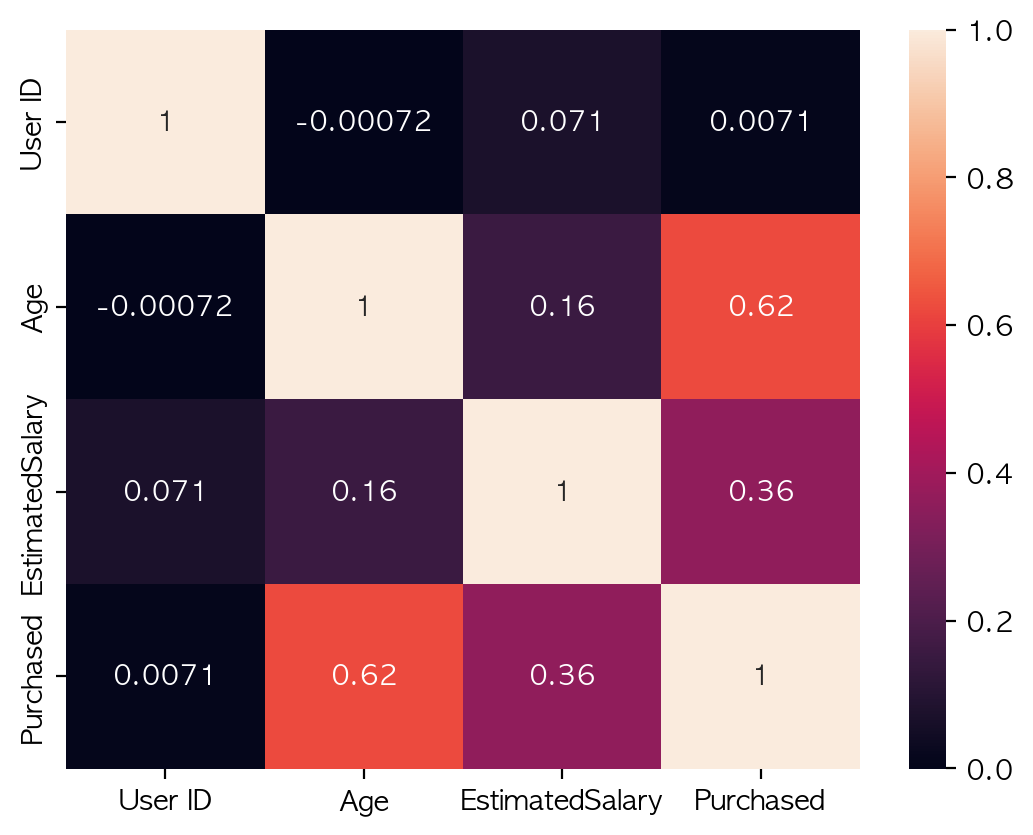

In [155]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

### 구매에 특성 파악을 위한 함수 생성

In [156]:
def create_dataframe_purchased_rate(feature):
    # Purchased 가 1인 행의 특정 특징의 값에 따른 갯수
    purchased = data[data['Purchased']==1][feature].value_counts()
    
    # Purchased 가 0인 행의 특정 특징의 값에 따른 개수
    not_purchased = data[data['Purchased']==0][feature].value_counts()
    
    df_graph = pd.DataFrame([purchased,not_purchased])
    df_graph.index = ['Purchased','Not Purchased']
    
    return df_graph

### User ID 특성
- 고유값

In [157]:
data['User ID'].value_counts()

User ID
15624510    1
15767681    1
15589449    1
15791373    1
15688172    1
           ..
15675185    1
15792102    1
15722758    1
15745232    1
15594041    1
Name: count, Length: 400, dtype: int64

In [158]:
data['User ID'].nunique()

400

### Gender 특성

- Male,Femal 로 되어있다.
- Male : 0, Female : 1 로 맵핑

In [159]:
data['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

#### gender 시각화

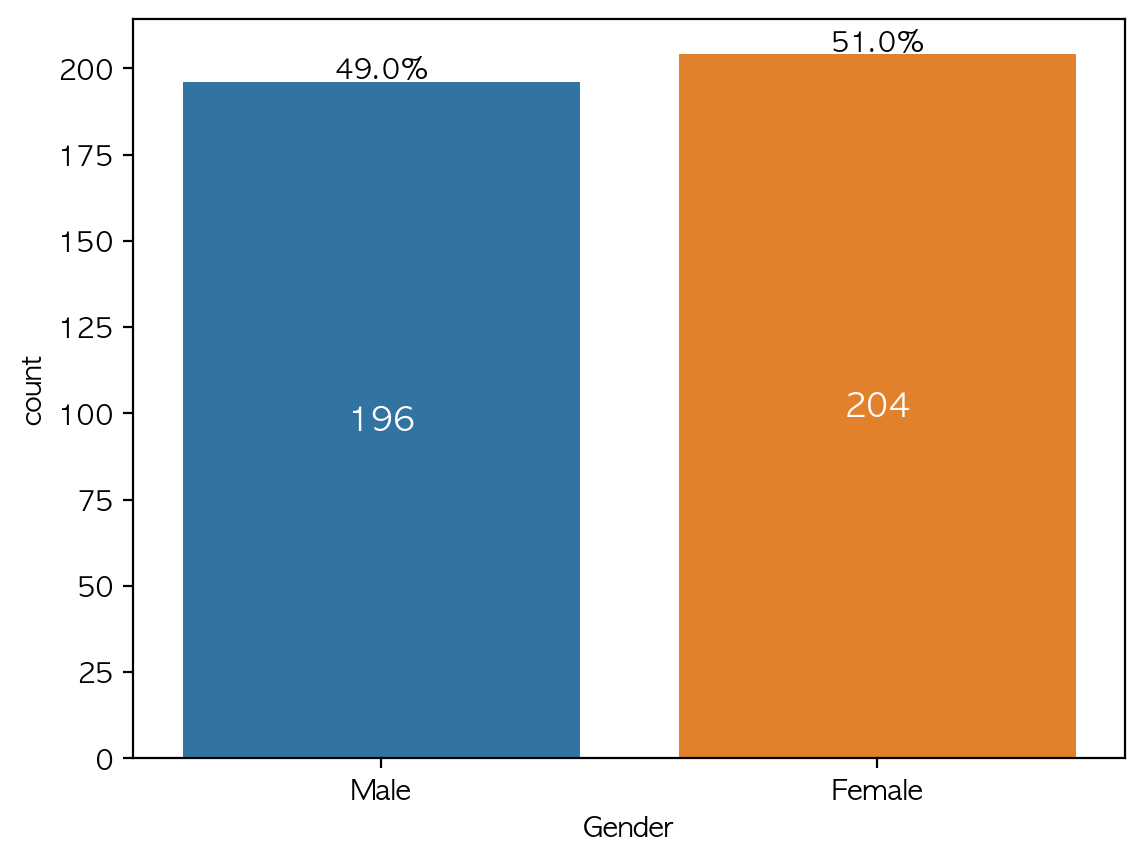

In [160]:

sns.countplot(
    data=data,
    x='Gender',
    hue='Gender'
)

total = len(data)  # 전체 데이터 개수
for p in plt.gca().patches:
    height = p.get_height()
    # 비율 계산
    percentage = f'{height/total*100:.1f}%'
    
    # 카운트를 막대의 가운데에 표시
    plt.gca().text(
        p.get_x() + p.get_width() / 2.,
        height / 2,  # 카운트가 막대의 중간에 표시되도록 위치 조정
        f'{int(height)}',  # 카운트만 표시
        ha="center", va='center', color='white', fontsize=12
    )
    
    # 비율을 막대 위에 표시
    plt.gca().text(
        p.get_x() + p.get_width() / 2.,
        height + 1,  # 텍스트가 막대 위에 표시되도록 위치 조정
        f'{percentage}',  # 비율만 표시
        ha="center", color='black', fontsize=10
    )
    
plt.show()

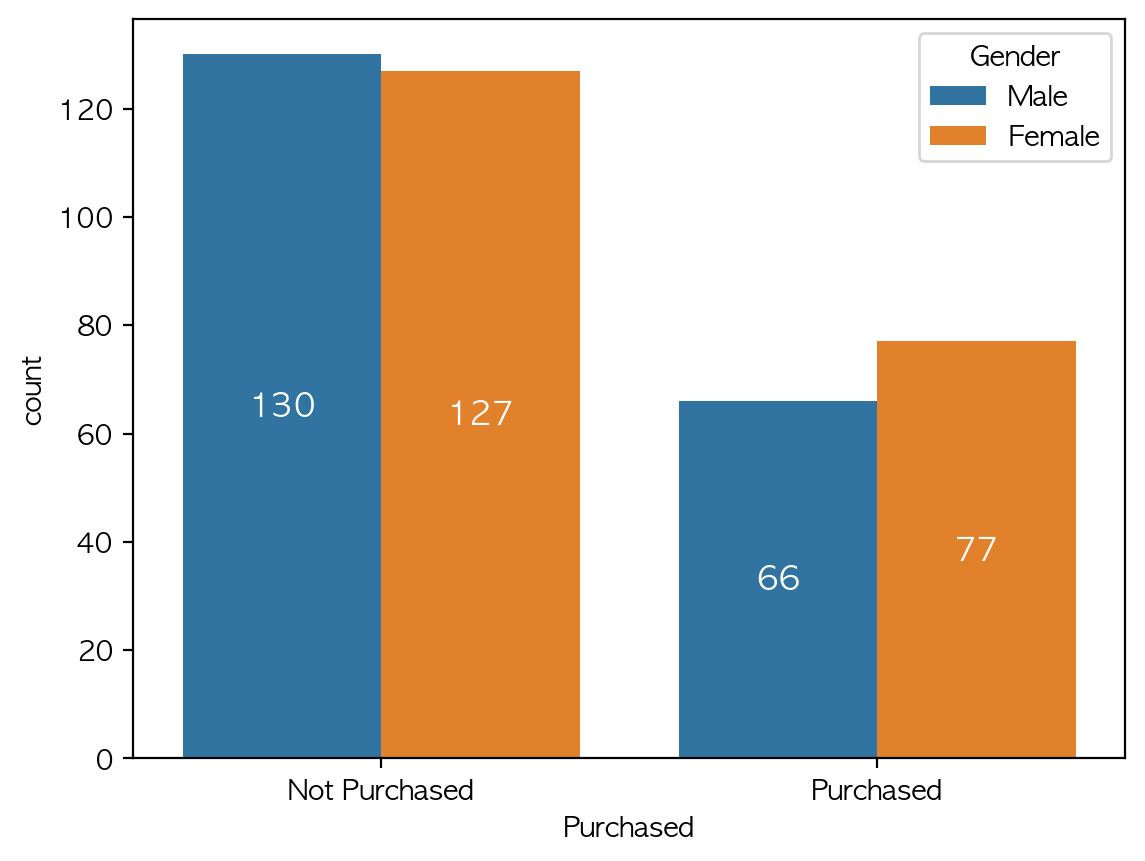

In [161]:
# countplot 생성
sns.countplot(
    data=data,
    x='Purchased',
    hue='Gender',
)

# 'Purchased' 상태별로 총 개수를 계산 (성별 구분 없이)
total_counts = data.groupby(['Purchased', 'Gender']).size().unstack()

# 전체 Purchased 상태별로 총 개수 계산 (성별 구분 없이)
total_by_purchased = data.groupby('Purchased').size()

# 비율과 카운트 표시
for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    
    if width > 0:  # width가 0이 아닌 경우에만 계산 수행
        x = p.get_x() + width / 2

        # 현재 막대가 속하는 Purchased 상태와 Gender 계산
        purchased_status = int(p.get_x() / (2 * width))  # Purchased 상태를 0, 1로 구분
        gender = int(p.get_x() / width) % 2  # 0: 첫 번째 막대 (예: Male), 1: 두 번째 막대 (예: Female)

        # 비율 계산 (해당 Purchased 상태 내에서의 성별 비율)
        total = total_by_purchased[purchased_status]  # 해당 Purchased 상태의 전체 개수
        percentage = f'{height / total * 100:.1f}%'

        # 카운트를 막대 중앙에 표시
        plt.gca().text(x, height / 2, f'{int(height)}', ha='center', va='center', color='white', fontsize=12)

        # 비율을 막대 위에 표시
        # plt.gca().text(x, height + 1, percentage, ha='center', color='black', fontsize=10)

# x축 레이블을 '0', '1'에서 'Not Purchased', 'Purchased'로 변경
plt.xticks([0, 1], ['Not Purchased', 'Purchased'])

plt.show()

/var/folders/dn/kpsvhr056zz6gvcnmgrkklzr0000gn/T/ipykernel_70951/1047498555.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.




<Axes: xlabel='Gender', ylabel='Purchased'>

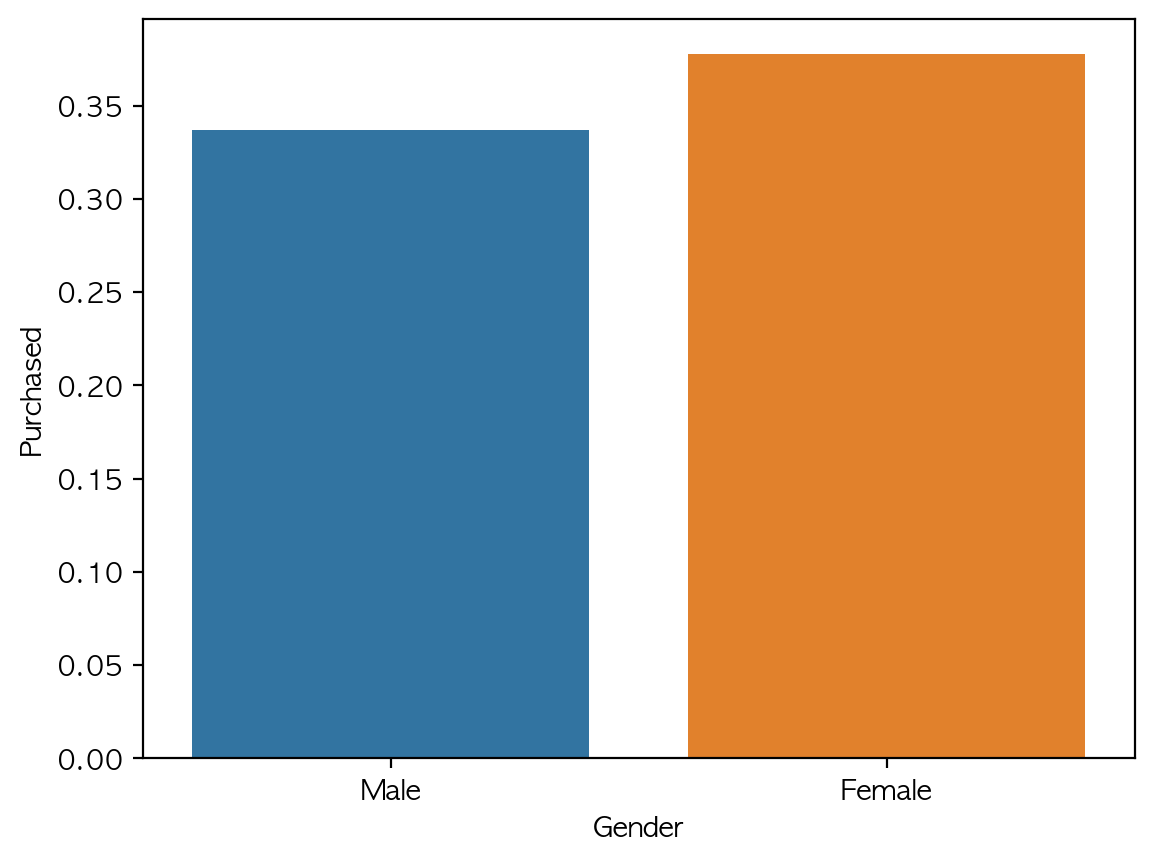

In [162]:
sns.barplot(
    data,
    x='Gender',
    y='Purchased',
    ci=False,
    hue='Gender',
)

/var/folders/dn/kpsvhr056zz6gvcnmgrkklzr0000gn/T/ipykernel_70951/2639110723.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.




<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

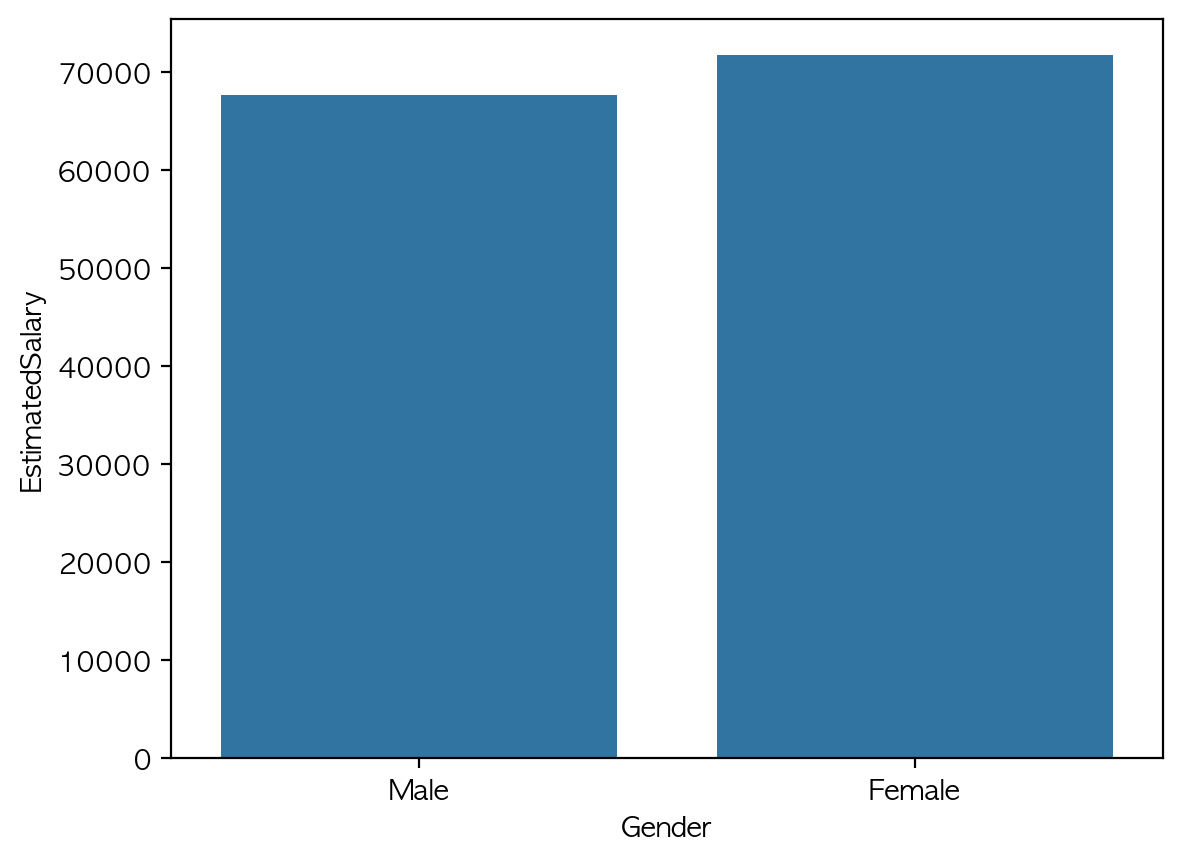

In [163]:
sns.barplot(
    data,
    x='Gender',
    y='EstimatedSalary',
    ci=False
)

### Age 특성
- min : 18
- max : 60
- mean : 37

In [164]:
print(sorted(data['Age'].unique()))
print(data['Age'].describe())


[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64


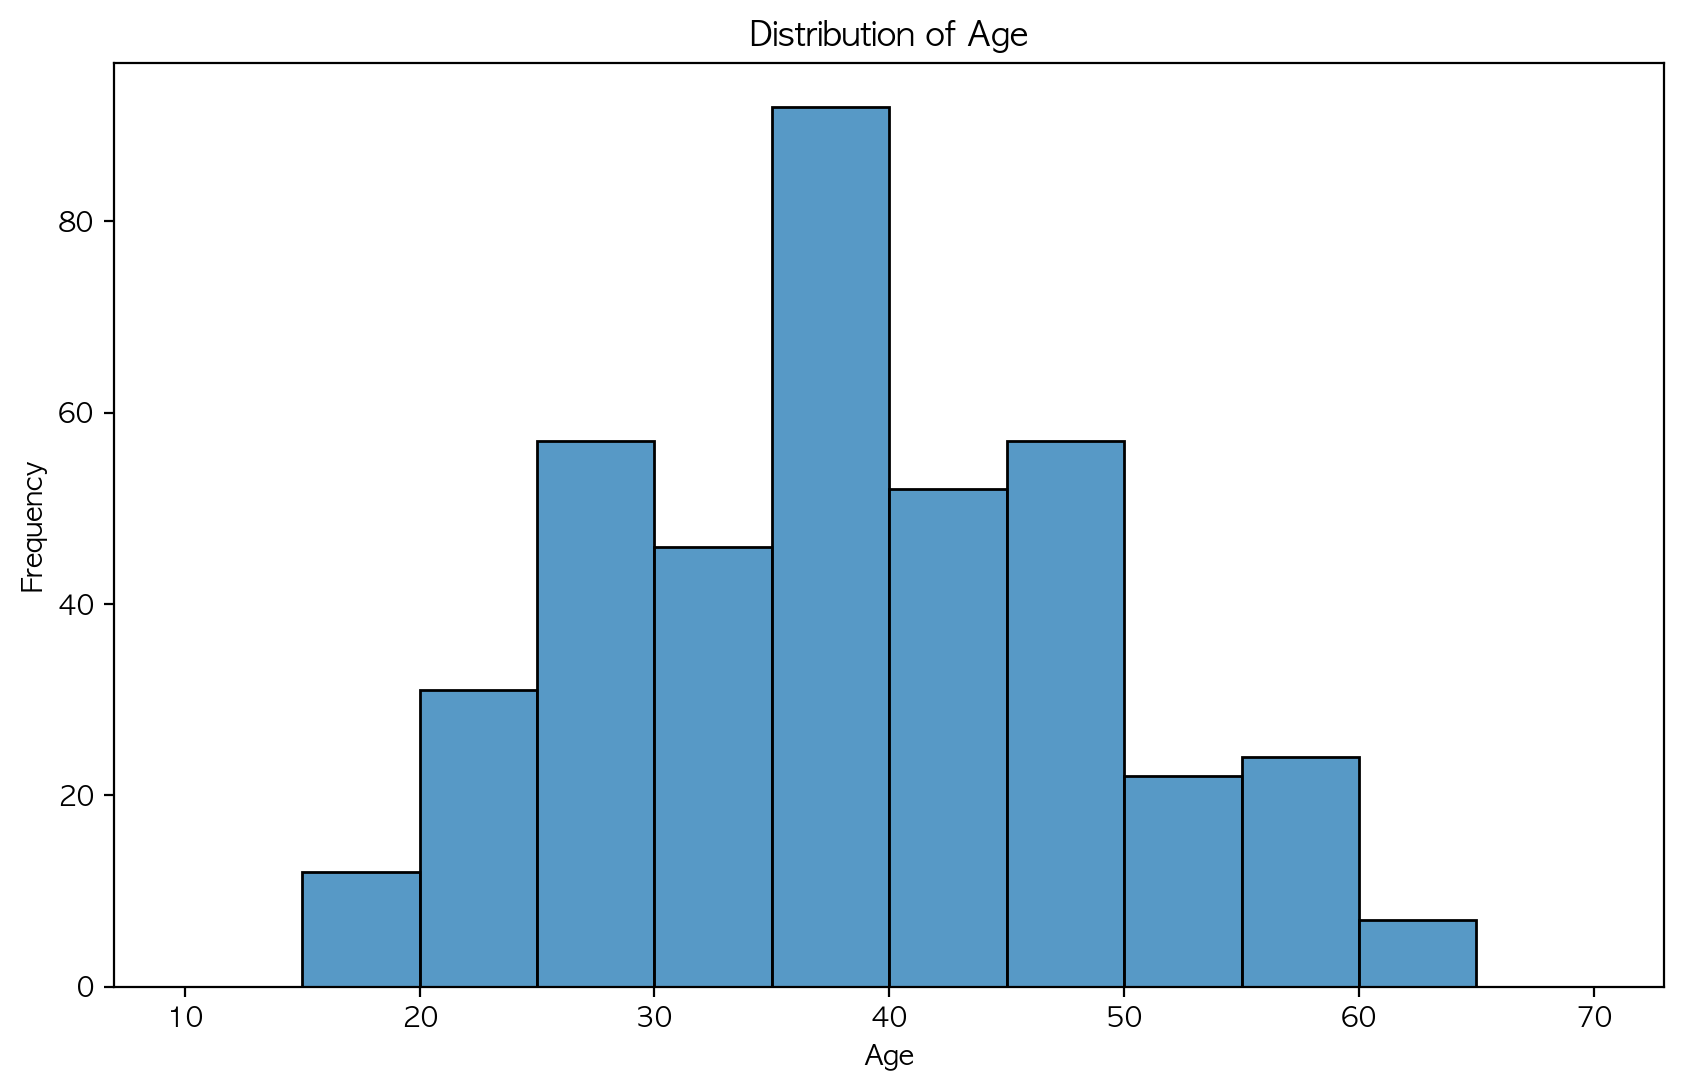

In [165]:
plt.figure(figsize=(10,6))
# 히스토그램 생성 (연령대별로 나누기 위해 수동으로 bins 설정)
# 히스토그램 생성
sns.histplot(
    data=data,
    x='Age',
    bins=np.arange(10, 75, 5),  # 5부터 75까지 10 간격으로 bins 설정
)

# x축 눈금을 10, 20, 30, 40, 50, 60, 70에 위치시키기
plt.xticks(np.arange(10, 71, 10))

# 그래프 제목 추가
plt.title("Distribution of Age")

# x축 레이블 추가
plt.xlabel("Age")

# y축 레이블 추가
plt.ylabel("Frequency")

# 그래프 표시
plt.show()

<Axes: xlabel='EstimatedSalary', ylabel='Age'>

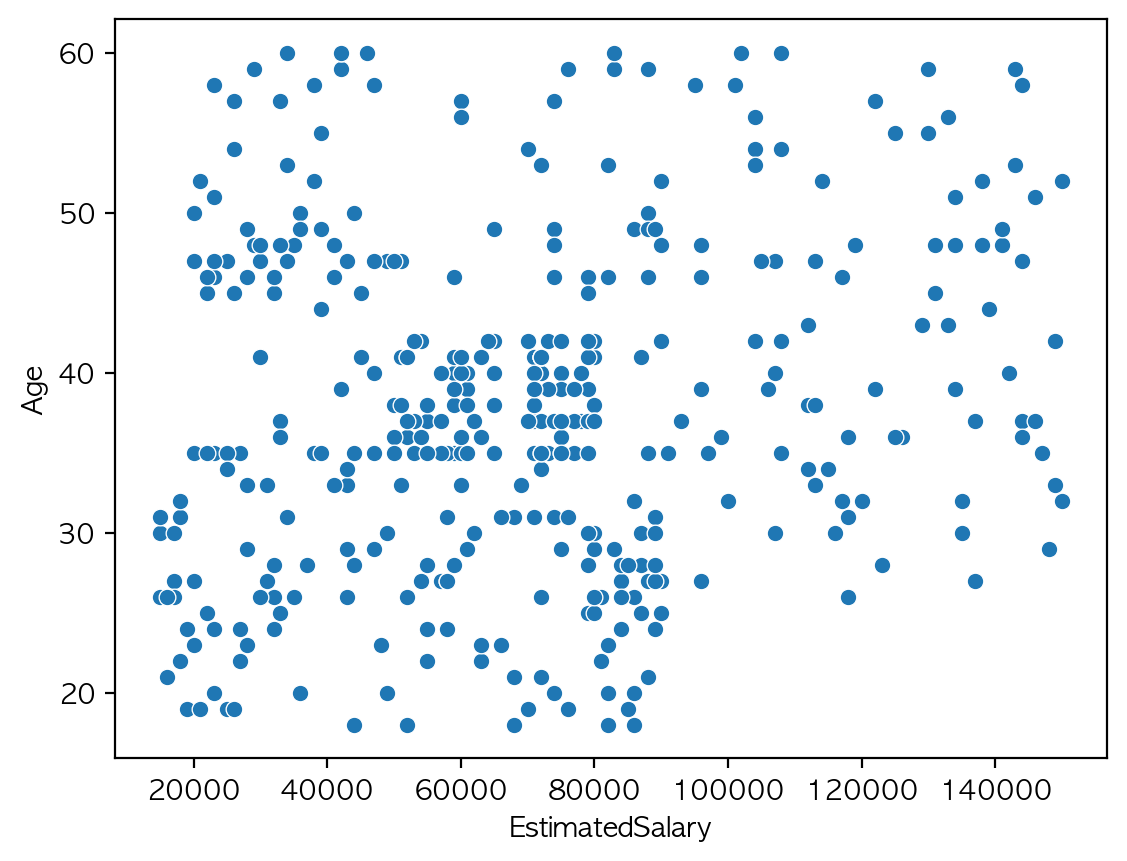

In [166]:
sns.scatterplot(
    data,
    y='Age',
    x='EstimatedSalary'
)

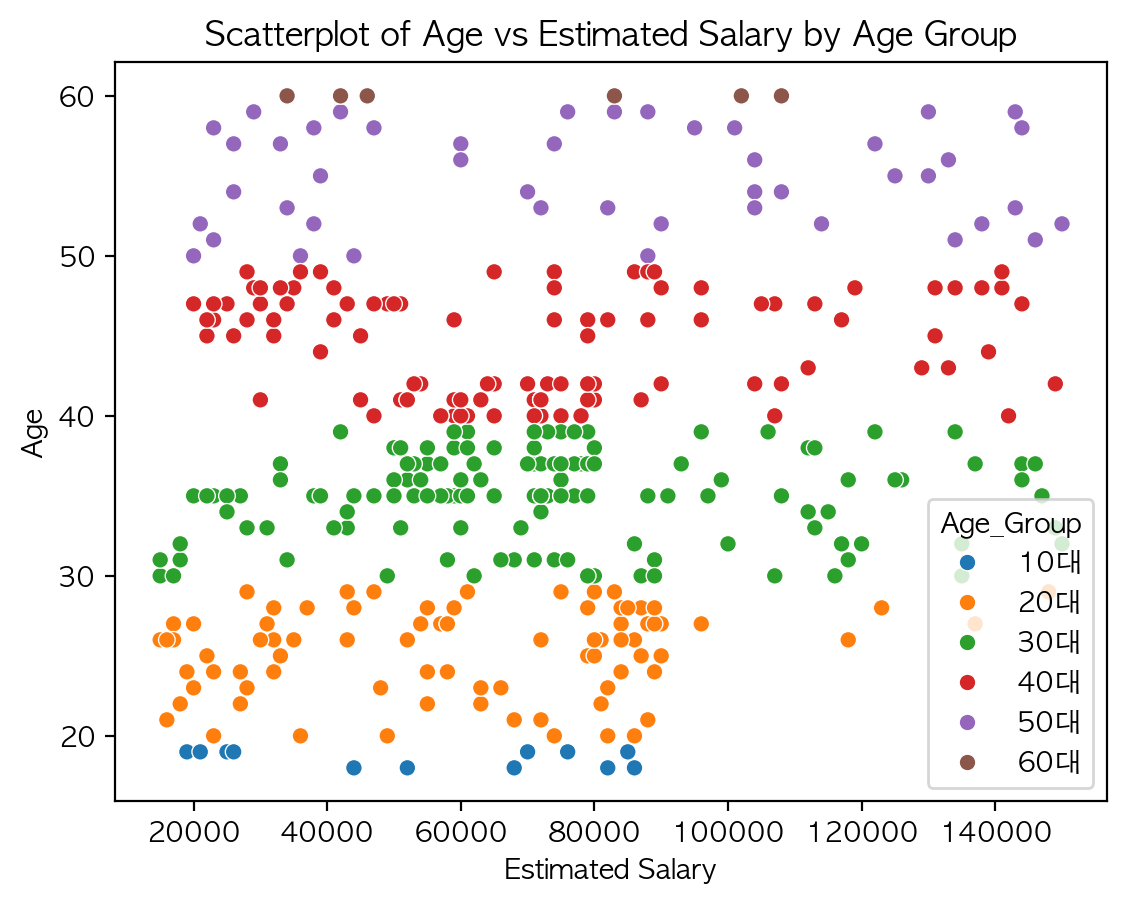

In [167]:
# 나이대 구분을 위한 범주 생성
bins = [10, 20, 30, 40, 50, 60, 70]  # 연령대 경계 값
labels = ['10대', '20대', '30대', '40대', '50대', '60대']  # 각 구간의 레이블
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# scatterplot 생성
sns.scatterplot(
    data=data,
    y='Age',
    x='EstimatedSalary',
    hue='Age_Group',
)

# 그래프 제목과 축 레이블 추가 (optional)
plt.title("Scatterplot of Age vs Estimated Salary by Age Group")
plt.xlabel("Estimated Salary")
plt.ylabel("Age")

plt.show()

/var/folders/dn/kpsvhr056zz6gvcnmgrkklzr0000gn/T/ipykernel_70951/3562866912.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



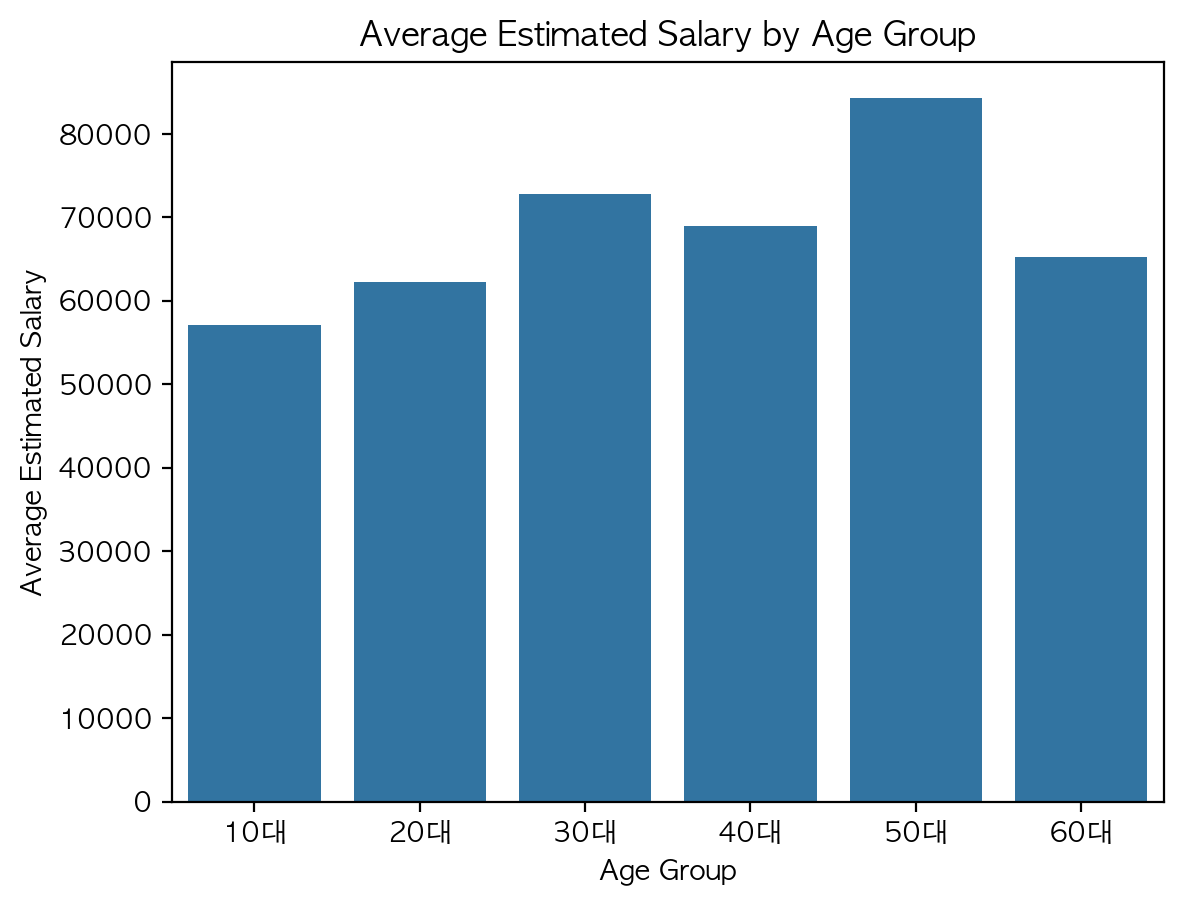

In [203]:
# 나이대를 좀 더 정확하게 설정하여 50대와 60대를 구분합니다.
data['AgeGroup'] = pd.cut(data['Age'], bins=[10, 20, 30, 40, 50, 59, 69], labels=[
    '10대', '20대', '30대', '40대', '50대', '60대'])

# 나이대별 EstimatedSalary의 평균을 계산하여 시각화합니다.
age_group_income = data.groupby('AgeGroup')['EstimatedSalary'].mean().reset_index()

# barplot 생성
sns.barplot(data=age_group_income, x='AgeGroup', y='EstimatedSalary')

# 그래프 제목과 축 레이블 추가
plt.title("Average Estimated Salary by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Estimated Salary")

# 그래프 보여주기
plt.show()

## EstimatedSalary 특성

In [169]:
data['EstimatedSalary'].value_counts()

EstimatedSalary
72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: count, Length: 117, dtype: int64

In [170]:
data['EstimatedSalary'].unique()

array([ 19000,  20000,  43000,  57000,  76000,  58000,  84000, 150000,
        33000,  65000,  80000,  52000,  86000,  18000,  82000,  25000,
        26000,  28000,  29000,  22000,  49000,  41000,  23000,  30000,
        74000, 137000,  16000,  44000,  90000,  27000,  72000,  31000,
        17000,  51000, 108000,  15000,  79000,  54000, 135000,  89000,
        32000,  83000,  55000,  48000, 117000,  87000,  66000, 120000,
        63000,  68000, 113000, 112000,  42000,  88000,  62000, 118000,
        85000,  81000,  50000, 116000, 123000,  73000,  37000,  59000,
       149000,  21000,  35000,  71000,  61000,  75000,  53000, 107000,
        96000,  45000,  47000, 100000,  38000,  69000, 148000, 115000,
        34000,  60000,  70000,  36000,  39000, 134000, 101000, 130000,
       114000, 142000,  78000, 143000,  91000, 144000, 102000, 126000,
       133000, 147000, 104000, 146000, 122000,  97000,  95000, 131000,
        77000, 125000, 106000, 141000,  93000, 138000, 119000, 105000,
      

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

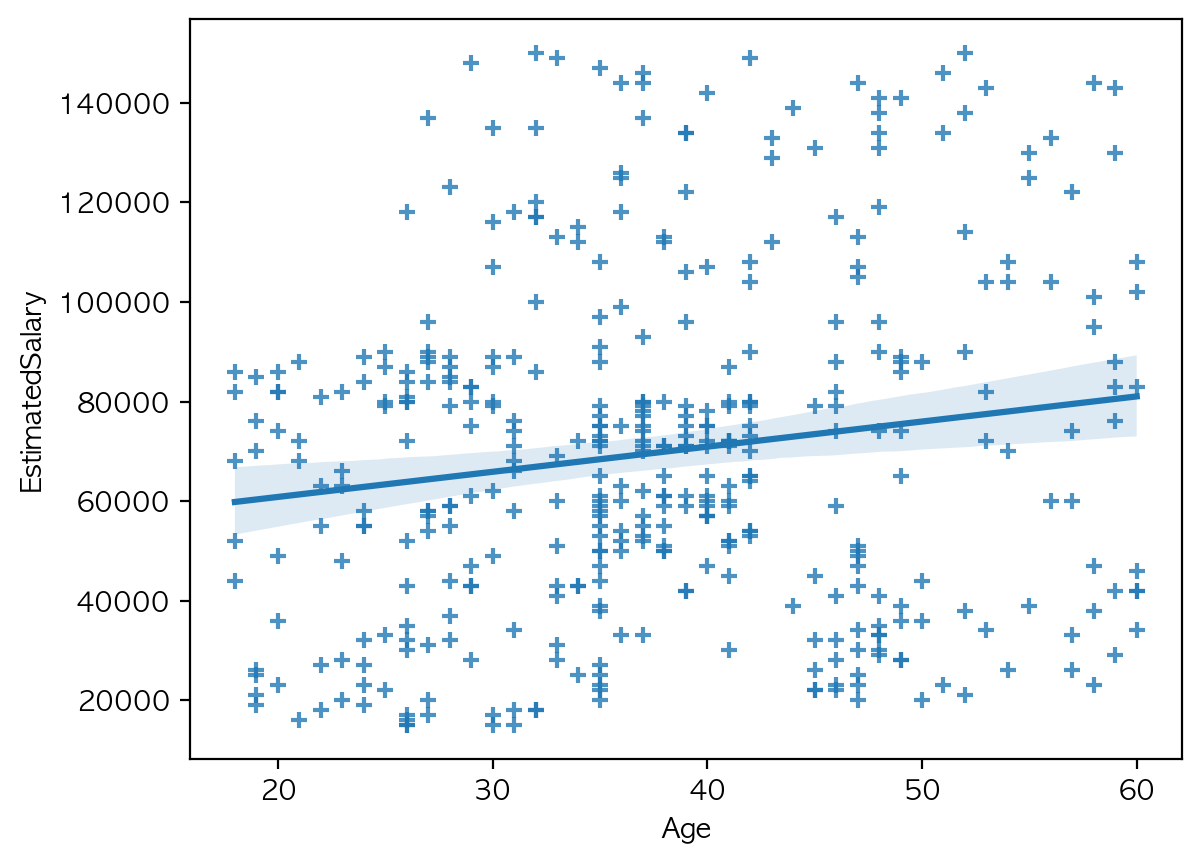

In [171]:
sns.regplot(
    data=data,
    x='Age',
    y='EstimatedSalary',
    marker='+'
)

/var/folders/dn/kpsvhr056zz6gvcnmgrkklzr0000gn/T/ipykernel_70951/1886809067.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.




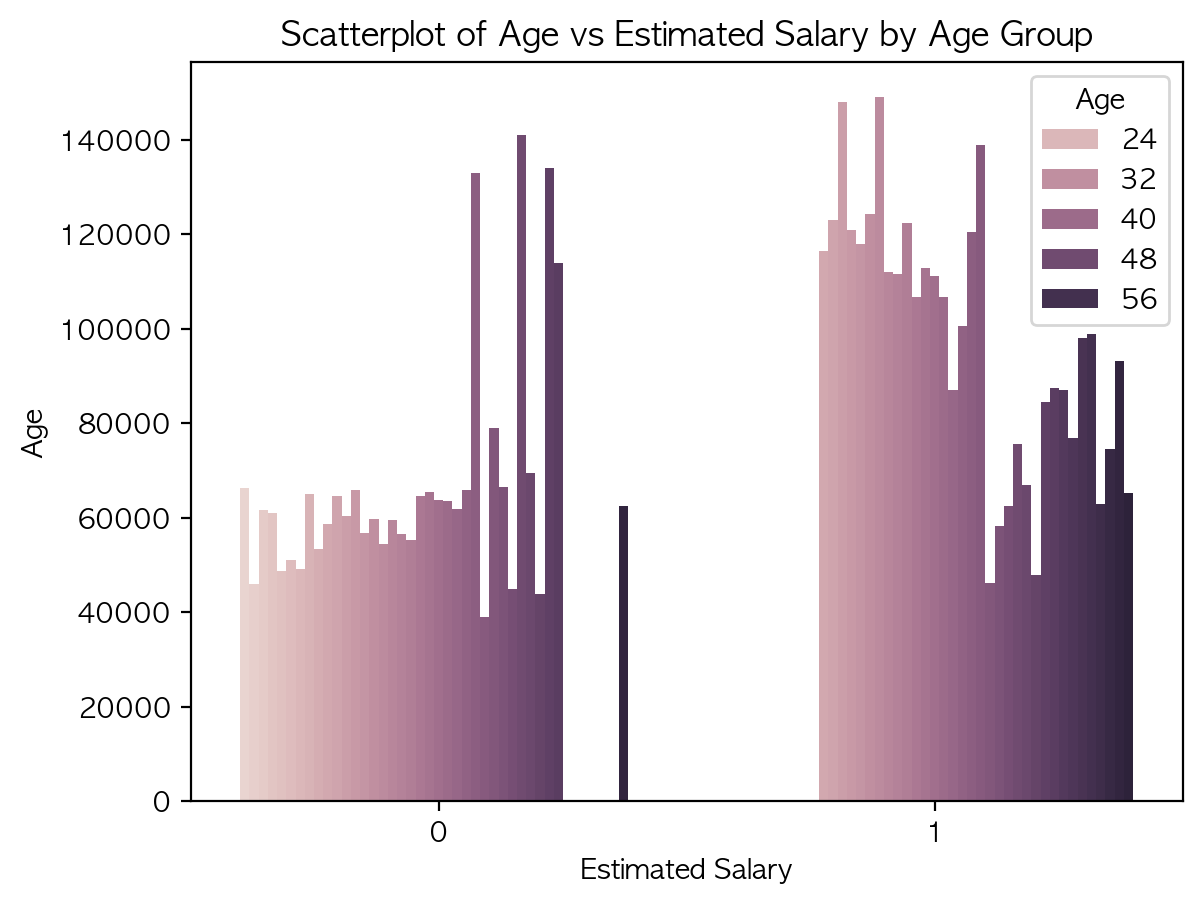

In [172]:
# 나이대 구분을 위한 범주 생성
bins = [10, 20, 30, 40, 50, 60, 70]  # 연령대 경계 값
labels = ['10대', '20대', '30대', '40대', '50대', '60대']  # 각 구간의 레이블
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# scatterplot 생성
sns.barplot(
    data=data,
    x='Purchased',
    y='EstimatedSalary',
    hue='Age',
    ci=False
)

# 그래프 제목과 축 레이블 추가 (optional)
plt.title("Scatterplot of Age vs Estimated Salary by Age Group")
plt.xlabel("Estimated Salary")
plt.ylabel("Age")

plt.show()

In [173]:
df = create_dataframe_purchased_rate('EstimatedSalary').T
df.head()

Purchased  Not Purchased
EstimatedSalary                          
144000                 4.0            NaN
88000                  4.0            3.0
104000                 4.0            NaN
23000                  4.0            3.0
33000                  3.0            3.0

In [174]:
print(df['Purchased'].value_counts())
print(df['Not Purchased'].value_counts())
print(df.value_counts())

Purchased
1.0    42
2.0    29
3.0     9
4.0     4
Name: count, dtype: int64
Not Purchased
1.0     25
3.0     17
2.0     14
4.0      8
5.0      6
8.0      4
6.0      4
7.0      2
11.0     1
10.0     1
Name: count, dtype: int64
Purchased  Not Purchased
2.0        1.0              7
1.0        1.0              6
3.0        1.0              5
1.0        3.0              4
2.0        3.0              4
1.0        5.0              3
           2.0              3
2.0        2.0              3
1.0        4.0              2
           8.0              2
2.0        5.0              2
3.0        3.0              2
4.0        3.0              2
1.0        10.0             1
           11.0             1
2.0        8.0              1
3.0        2.0              1
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Count'>

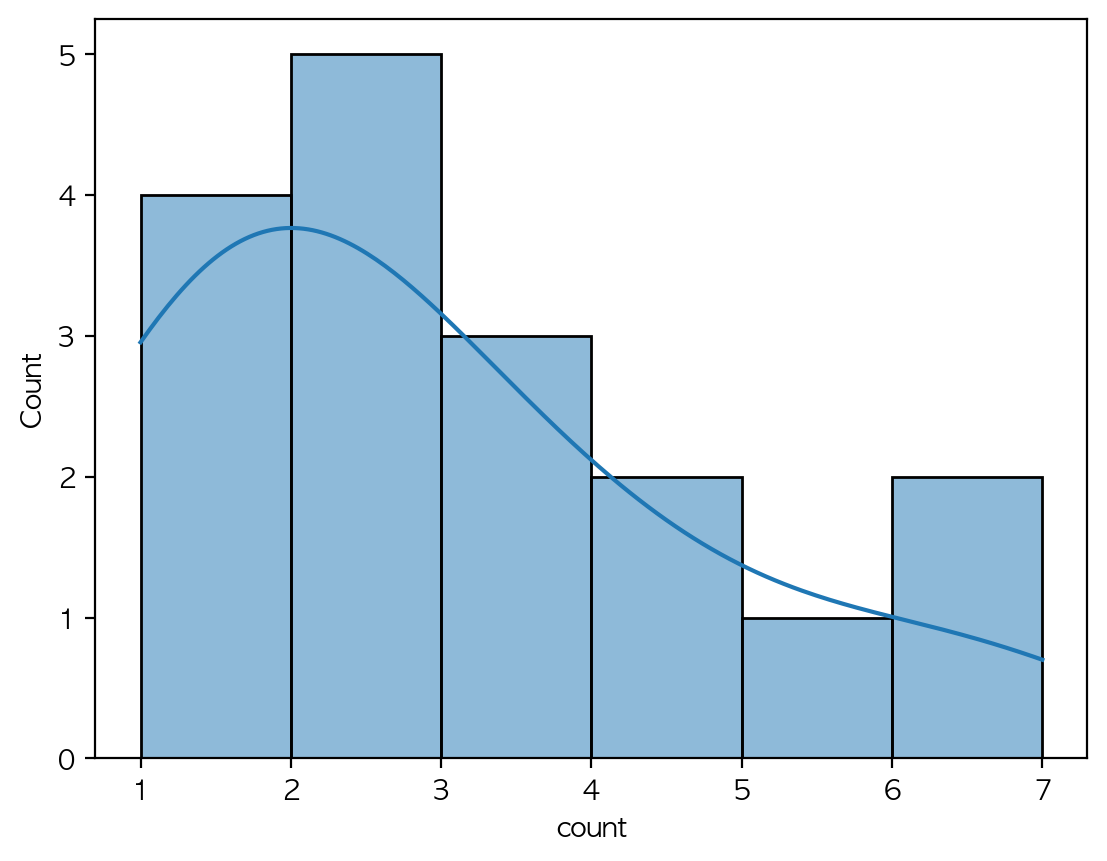

In [175]:
sns.histplot(df.value_counts(),kde=True)

# sns.barplot(df,ci=False)

## Purchased 특성
- 0 과 1로 되어있다.

In [176]:
data['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

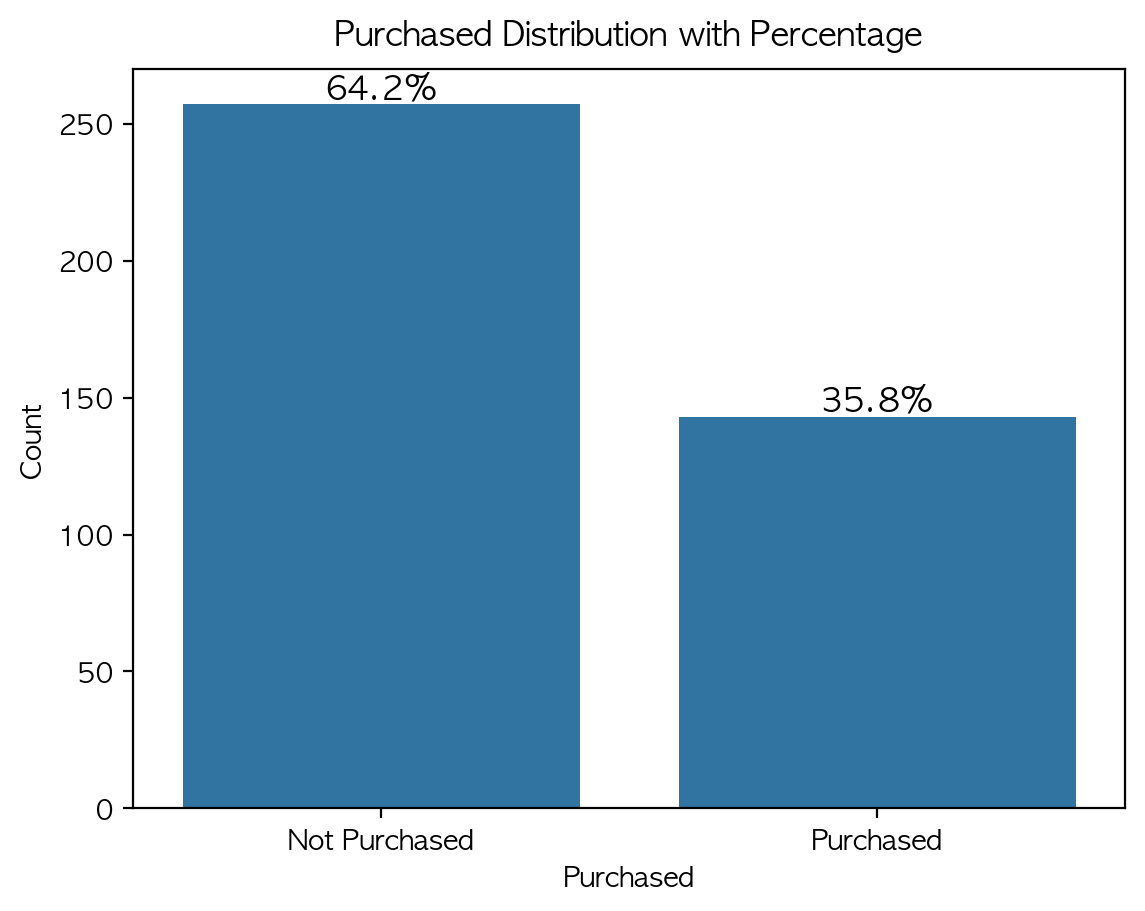

In [177]:
# countplot 생성
sns.countplot(
    data=data,
    x='Purchased',
)

# 전체 데이터에서 각 카테고리의 비율 계산 및 표시
total = len(data)  # 데이터의 총 개수
for p in plt.gca().patches:
    height = p.get_height()
    percentage = f'{height / total * 100:.1f}%'  # 비율 계산
    # 텍스트 위치를 막대 바로 위로 조정 (더 낮게)
    plt.gca().text(p.get_x() + p.get_width() / 2, height , percentage, 
                   ha='center', va='bottom', fontsize=12)

# 타이틀 위치 조정 (y=1.0으로 기본 위치로 설정)
plt.title("Purchased Distribution with Percentage", y=1.01)

# x축 레이블 추가 (선택 사항)
plt.xlabel("Purchased")

# y축 레이블 추가 (선택 사항)
plt.ylabel("Count")
plt.xticks([0,1],['Not Purchased','Purchased'])

# 그래프 표시
plt.show()

# 전처리

#### User ID 피처 제거
- 고유값으로 분석에 필요없음

In [178]:
data = data.drop(columns=['User ID'])
data

Gender  Age  EstimatedSalary  Purchased Age_Group AgeGroup
0      Male   19            19000          0       10대      10대
1      Male   35            20000          0       30대      30대
2    Female   26            43000          0       20대      20대
3    Female   27            57000          0       20대      20대
4      Male   19            76000          0       10대      10대
..      ...  ...              ...        ...       ...      ...
395  Female   46            41000          1       40대      40대
396    Male   51            23000          1       50대      50대
397  Female   50            20000          1       50대      50대
398    Male   36            33000          0       30대      30대
399  Female   49            36000          1       40대      40대

[400 rows x 6 columns]

#### Gender Mapping
- 남자 : 0
- 여자 : 1

In [179]:
mapping_gender = {'Male':0,'Female':1}
data['Gender'] = data['Gender'].map(mapping_gender)

In [180]:
data['Gender'].value_counts()

Gender
1    204
0    196
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='Purchased'>

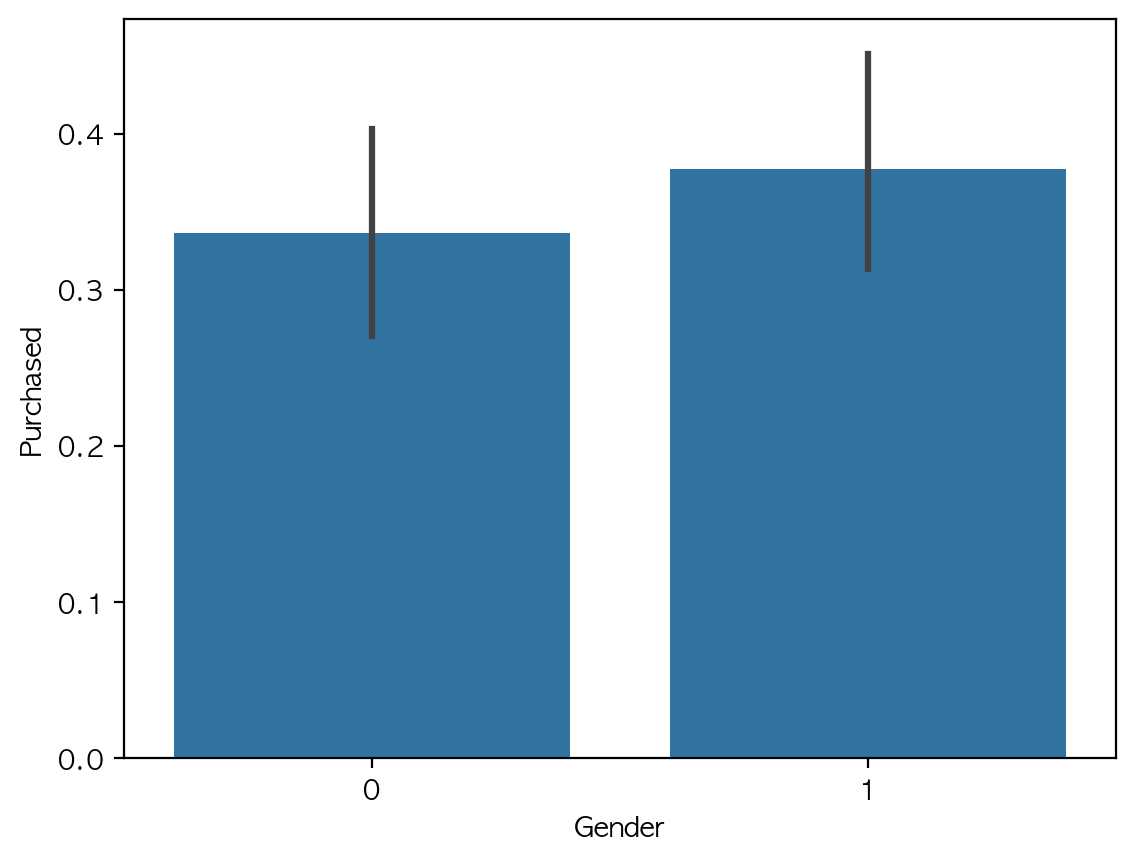

In [181]:
sns.barplot(
    data,
    x='Gender',
    y='Purchased'
)

<Axes: xlabel='Gender', ylabel='Purchased'>

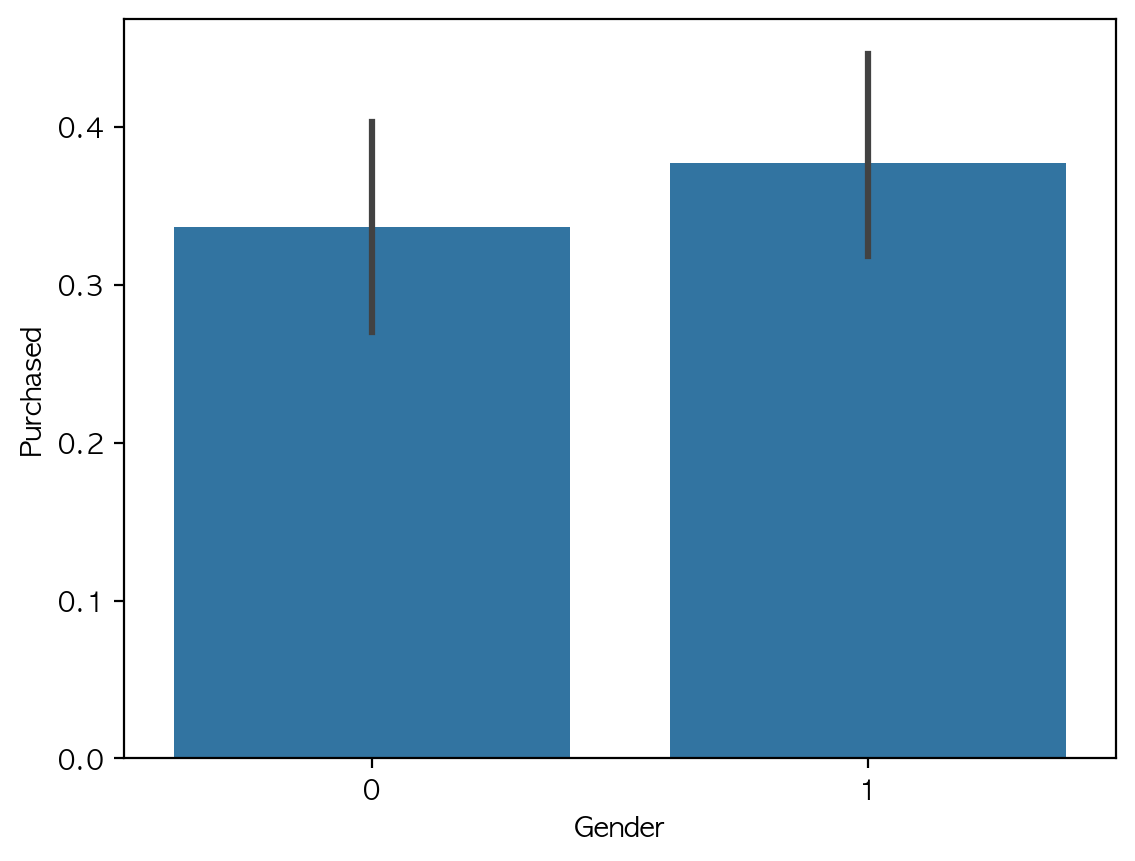

In [182]:
sns.barplot(
    data,
    x='Gender',
    y='Purchased'
)

#### Age_Group 피처 생성
- 연령대별 구별

In [183]:
data['Age_Group'] = pd.cut(data['Age'], bins=[10, 19, 29, 39, 49, 59, 69], 
                           labels=[10, 20, 30, 40, 50, 60], right=True)

#### 연령대별 인원

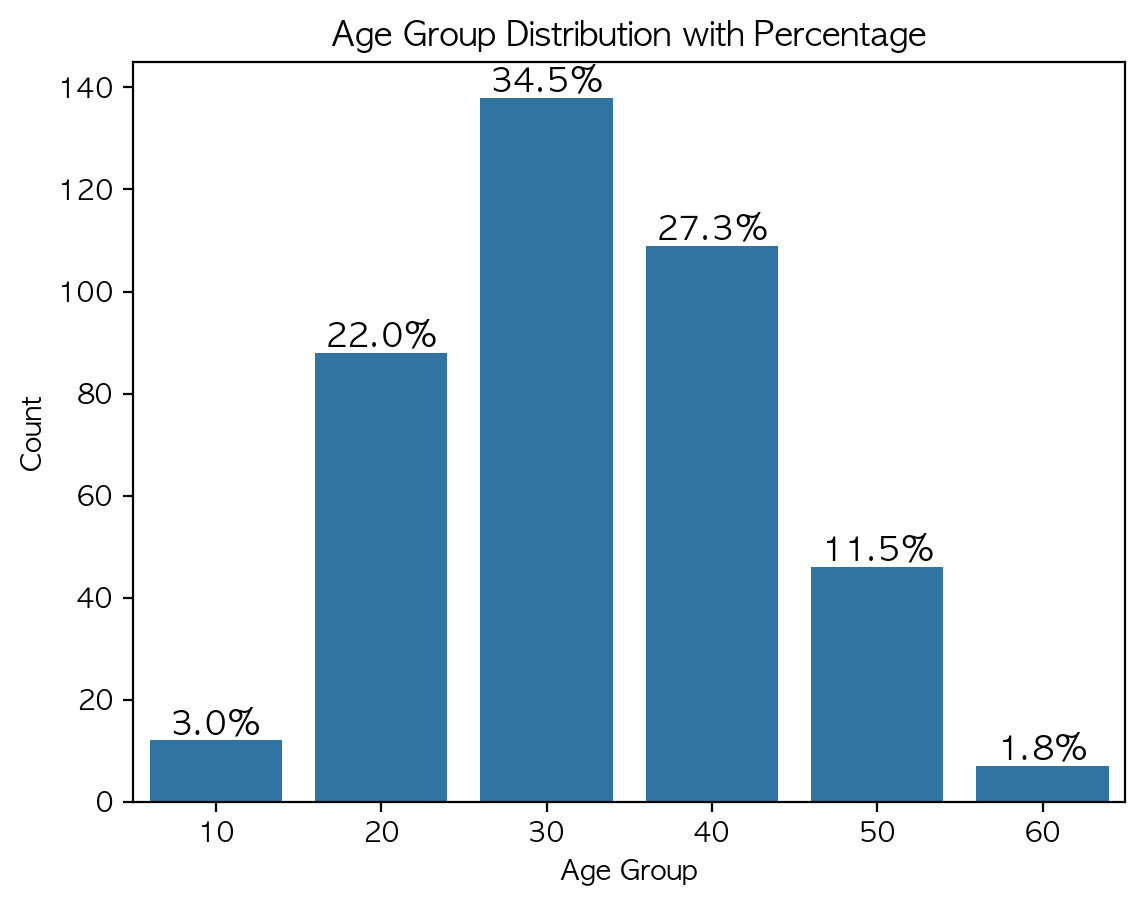

In [184]:
sns.countplot(
    x = data['Age_Group'],
)

total = len(data)  # 데이터의 총 개수
for p in plt.gca().patches:
    height = p.get_height()
    percentage = f'{height / total * 100:.1f}%'  # 비율 계산
    # 텍스트 위치를 막대 위로 조정
    plt.gca().text(p.get_x() + p.get_width() / 2, height+0.1, percentage, 
                   ha='center', va='bottom', fontsize=12)

# 그래프 제목 추가 (선택 사항)
plt.title("Age Group Distribution with Percentage")

# x축 레이블 추가 (선택 사항)
plt.xlabel("Age Group")

# y축 레이블 추가 (선택 사항)
plt.ylabel("Count")

# 그래프 표시
plt.show()

/var/folders/dn/kpsvhr056zz6gvcnmgrkklzr0000gn/T/ipykernel_70951/3697887854.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.




<Axes: xlabel='Age_Group', ylabel='EstimatedSalary'>

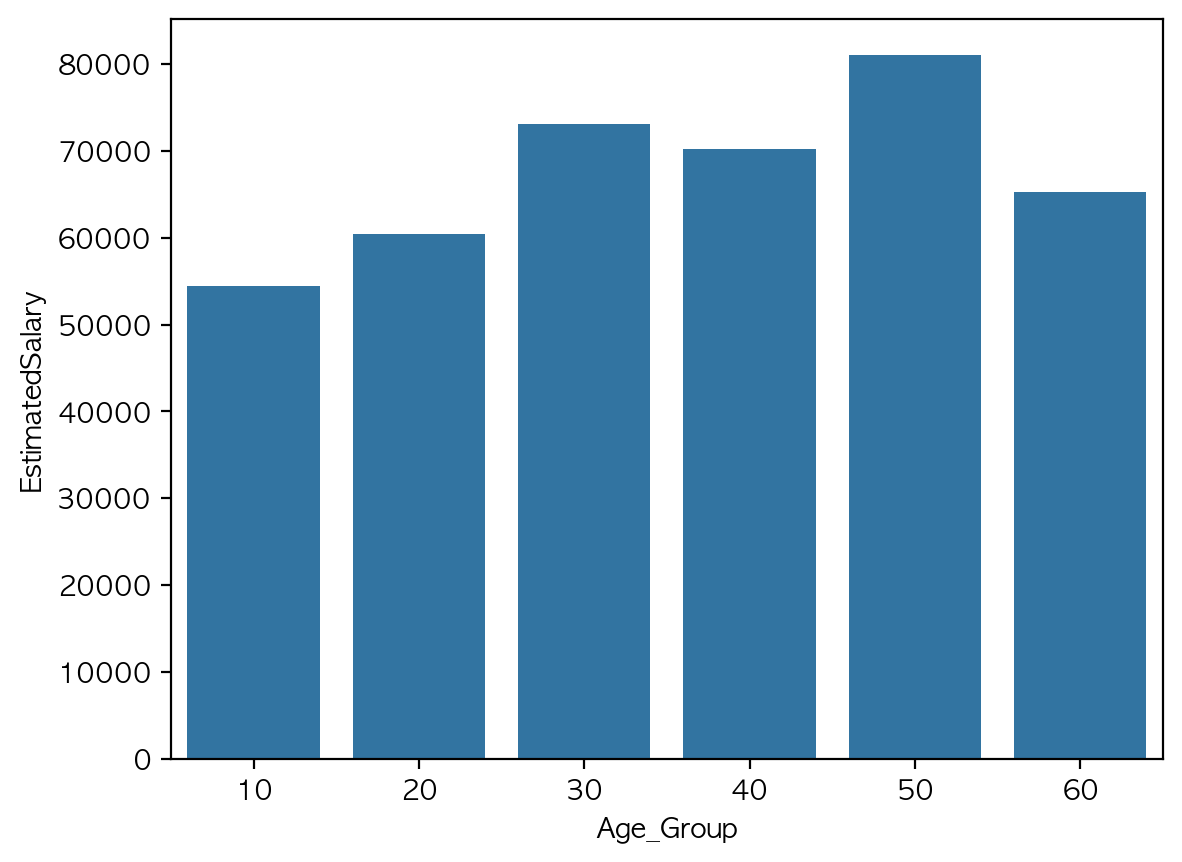

In [185]:
sns.barplot(
    data,
    x='Age_Group',
    y='EstimatedSalary',
    ci=False
)

### 연령대별 구매비율

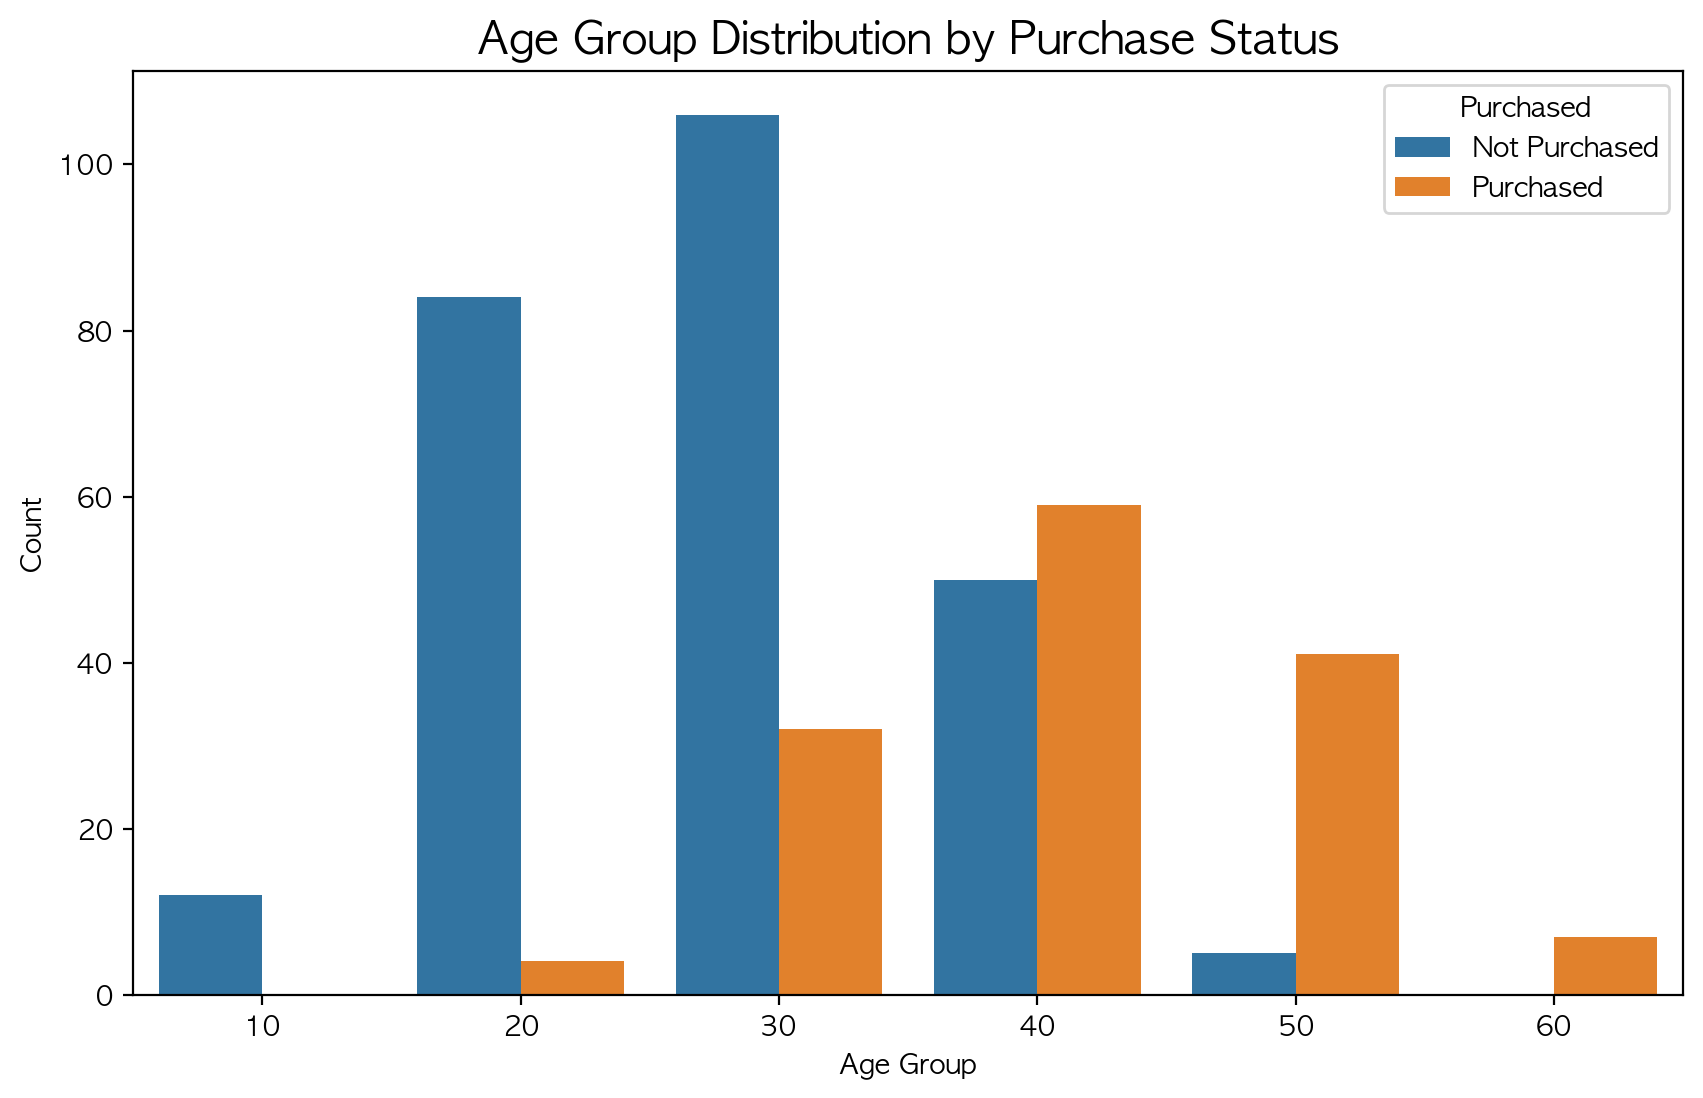

In [186]:
age_group_labels = {10: '10대', 20: '20대', 30: '30대', 40: '40대', 50: '50대', 60: '60대'}
data['Age_Group'].map(age_group_labels)
# 데이터프레임을 사용하여 'Purchased' 여부에 따라 그룹화
data_grouped = data.groupby(['Age_Group', 'Purchased'], observed=False).size().reset_index(name='Count')

# 'Purchased' 값을 범주형으로 변환
data_grouped['Purchased'] = data_grouped['Purchased'].map({1: 'Purchased', 0: 'Not Purchased'})

# 하나의 그래프로 시각화
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Age_Group', y='Count', hue='Purchased', data=data_grouped)

# 그래프 제목 및 축 레이블 설정
plt.title('Age Group Distribution by Purchase Status', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Count')

# 그래프 표시
plt.show()

/var/folders/dn/kpsvhr056zz6gvcnmgrkklzr0000gn/T/ipykernel_70951/2936626837.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



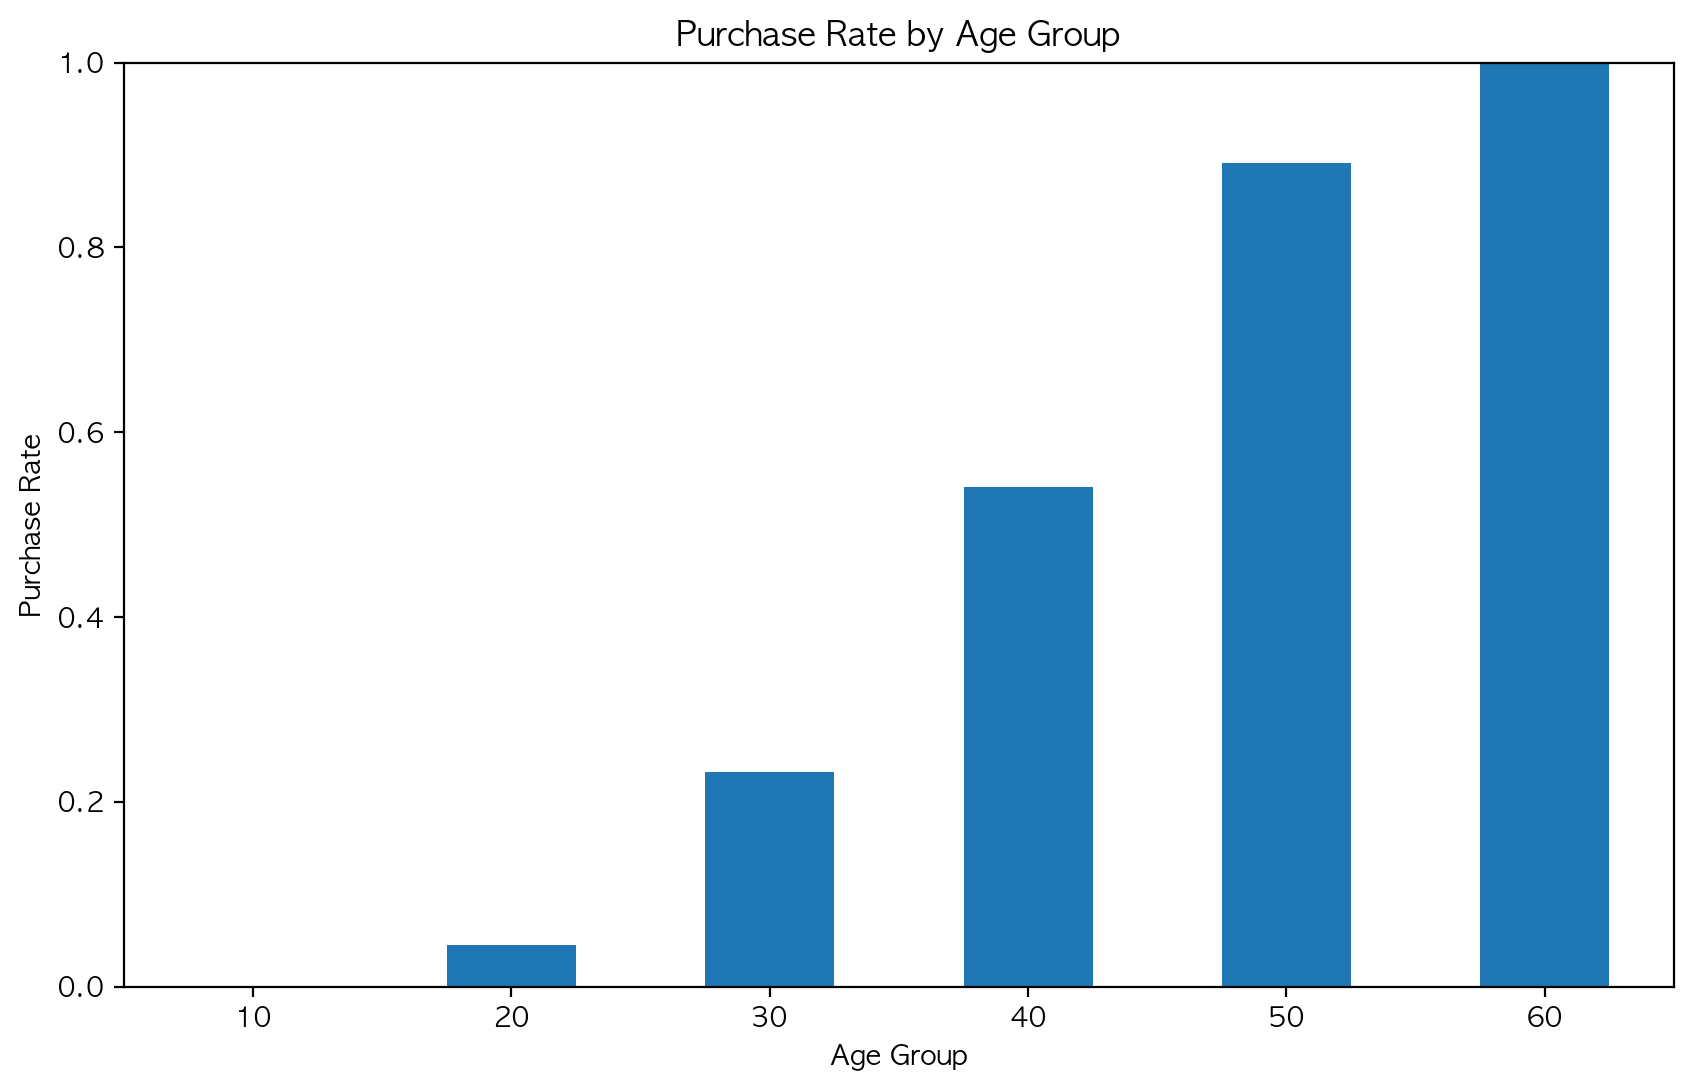

Age_Group
10    0.000000
20    0.045455
30    0.231884
40    0.541284
50    0.891304
60    1.000000
Name: Purchased, dtype: float64

In [187]:
# 연령대별 구매율 계산
purchase_rate_by_age_group = data.groupby('Age_Group')['Purchased'].mean()

# 구매율 시각화
plt.figure(figsize=(10, 6))
purchase_rate_by_age_group.plot(kind='bar')
plt.title('Purchase Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Rate')
plt.ylim(0, 1)  # 구매율은 0~1 사이의 값이므로 y축 범위를 설정
plt.xticks(rotation=0)
plt.show()

# 연령대별 구매율 데이터 출력
purchase_rate_by_age_group

### 연령대별 성별에 따른 구매율 계산

/var/folders/dn/kpsvhr056zz6gvcnmgrkklzr0000gn/T/ipykernel_70951/1950906491.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1200x800 with 0 Axes>

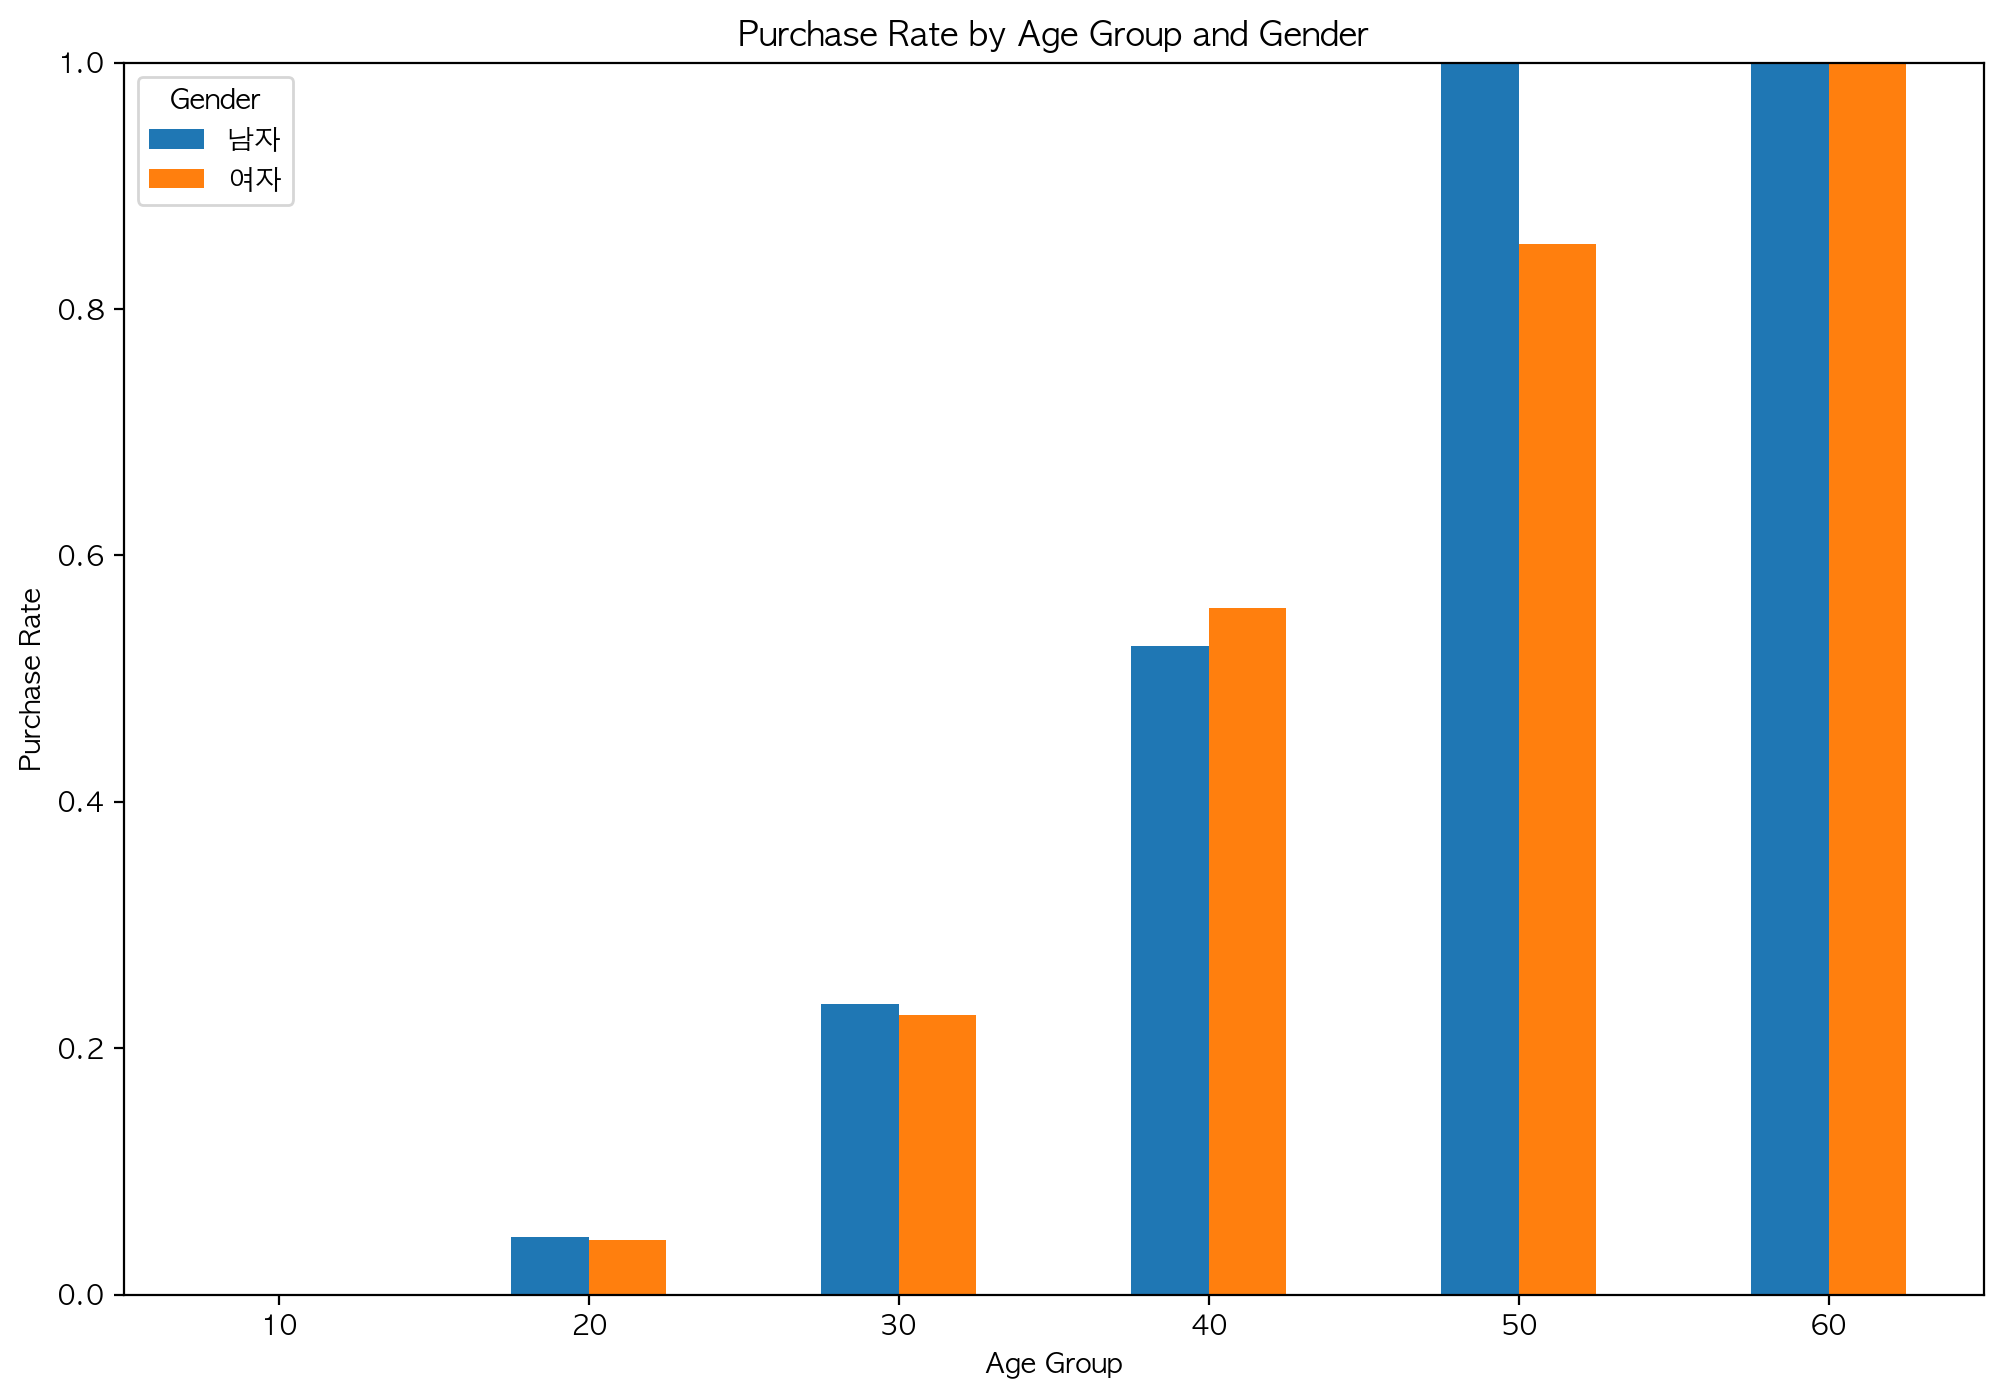

Gender            0         1
Age_Group                    
10         0.000000  0.000000
20         0.046512  0.044444
30         0.236111  0.227273
40         0.526316  0.557692
50         1.000000  0.852941
60         1.000000  1.000000

In [188]:
# 연령대별 성별에 따른 구매율 계산
purchase_rate_by_age_gender = data.groupby(['Age_Group', 'Gender'])['Purchased'].mean().unstack()

# 구매율 시각화
plt.figure(figsize=(12, 8))
purchase_rate_by_age_gender.plot(kind='bar', figsize=(12, 8))
plt.title('Purchase Rate by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Purchase Rate')
plt.ylim(0, 1)  # 구매율은 0~1 사이의 값이므로 y축 범위를 설정
plt.xticks(rotation=0)
plt.legend(title='Gender', labels=['남자', '여자'])
plt.show()

# 연령대별 성별에 따른 구매율 데이터 출력
purchase_rate_by_age_gender

### 연령대별 평균 소득 계산

/var/folders/dn/kpsvhr056zz6gvcnmgrkklzr0000gn/T/ipykernel_70951/2016560049.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



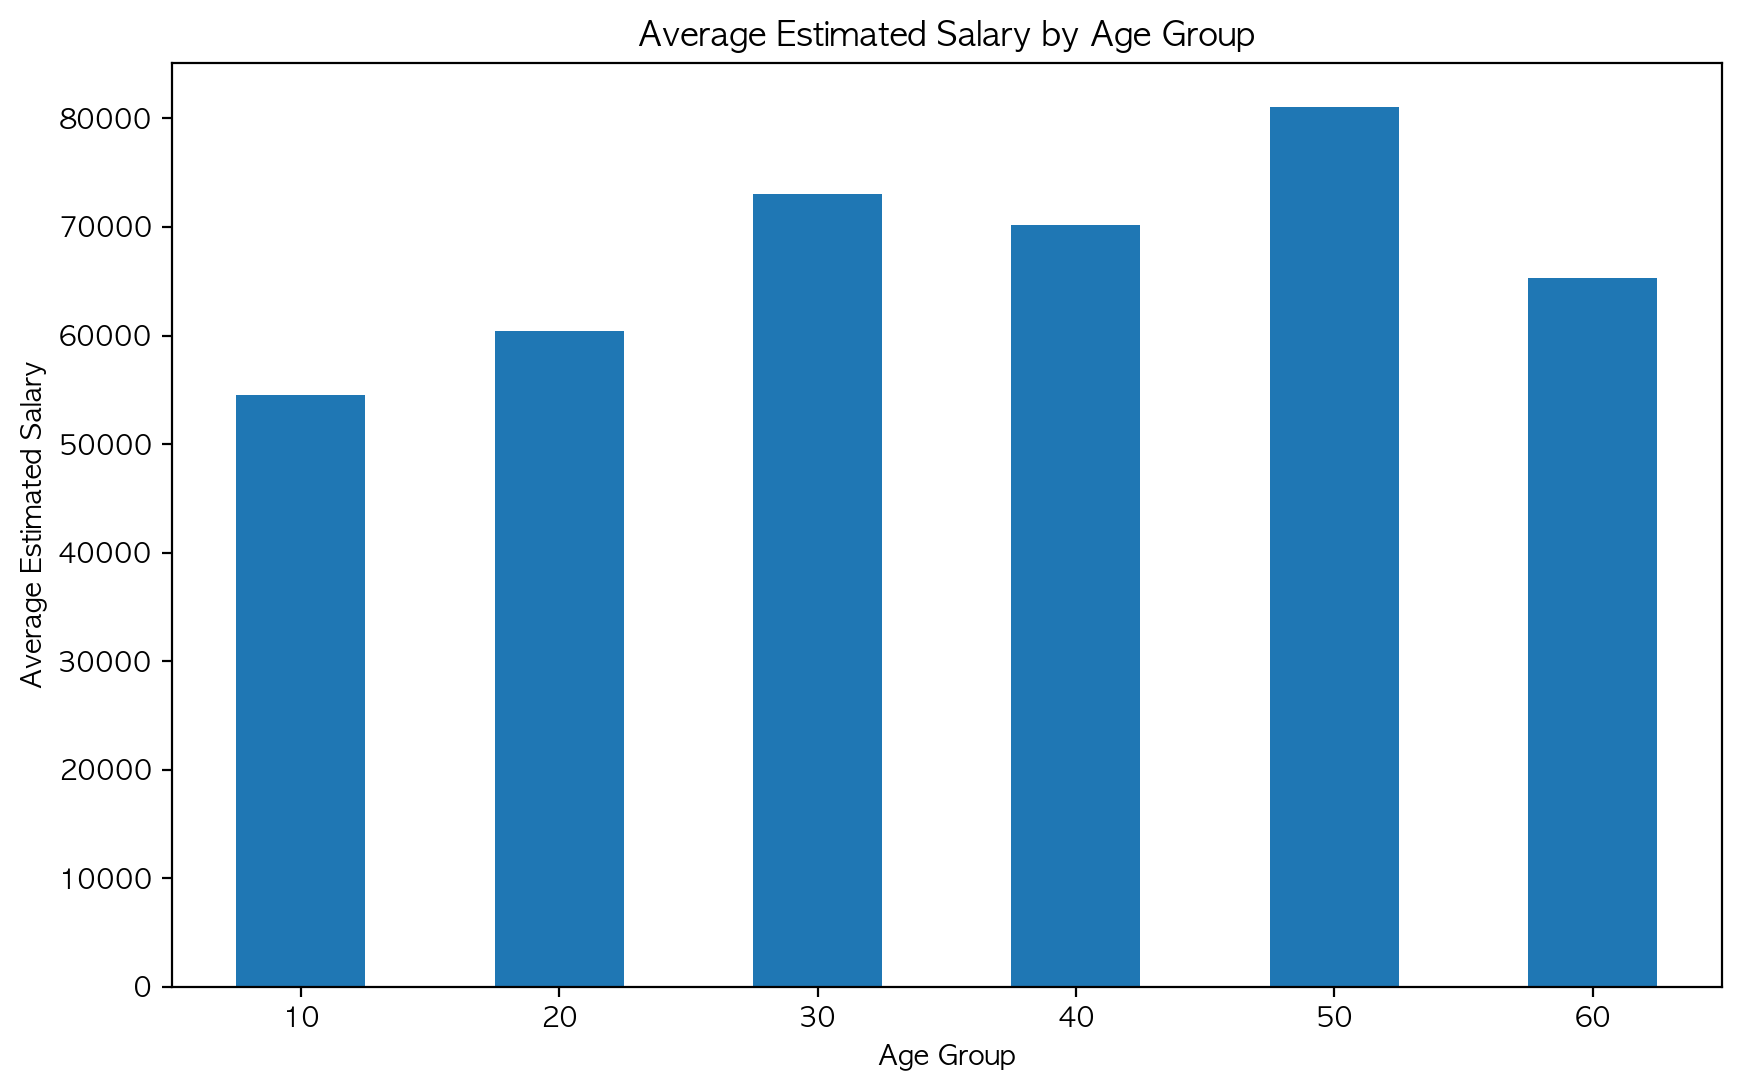

Age_Group
10    54500.000000
20    60443.181818
30    73079.710145
40    70201.834862
50    81086.956522
60    65285.714286
Name: EstimatedSalary, dtype: float64

In [189]:
# 연령대별 평균 소득 계산
average_salary_by_age_group = data.groupby('Age_Group')['EstimatedSalary'].mean()

# 평균 소득 시각화
plt.figure(figsize=(10, 6))
average_salary_by_age_group.plot(kind='bar')
plt.title('Average Estimated Salary by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Estimated Salary')
plt.xticks(rotation=0)
plt.show()

# 연령대별 평균 소득 데이터 출력
average_salary_by_age_group

In [190]:
data['Age_Group'] = pd.cut(data['Age'], bins=[10, 19, 29, 39, 49, 59, 69], 
                           labels=[10, 20, 30, 40, 50, 60], right=True)

data.drop(columns=['AgeGroup'],inplace=True)

### 스케일링

In [191]:
scaler = MinMaxScaler()

scaled_data = scaler.fit(data)

In [192]:
scaled_data_df = pd.DataFrame(scaled_data.transform(data),columns=data.columns)
scaled_data_df

Gender       Age  EstimatedSalary  Purchased  Age_Group
0       0.0  0.023810         0.029630        0.0        0.0
1       0.0  0.404762         0.037037        0.0        0.4
2       1.0  0.190476         0.207407        0.0        0.2
3       1.0  0.214286         0.311111        0.0        0.2
4       0.0  0.023810         0.451852        0.0        0.0
..      ...       ...              ...        ...        ...
395     1.0  0.666667         0.192593        1.0        0.6
396     0.0  0.785714         0.059259        1.0        0.8
397     1.0  0.761905         0.037037        1.0        0.8
398     0.0  0.428571         0.133333        0.0        0.4
399     1.0  0.738095         0.155556        1.0        0.6

[400 rows x 5 columns]

<Axes: >

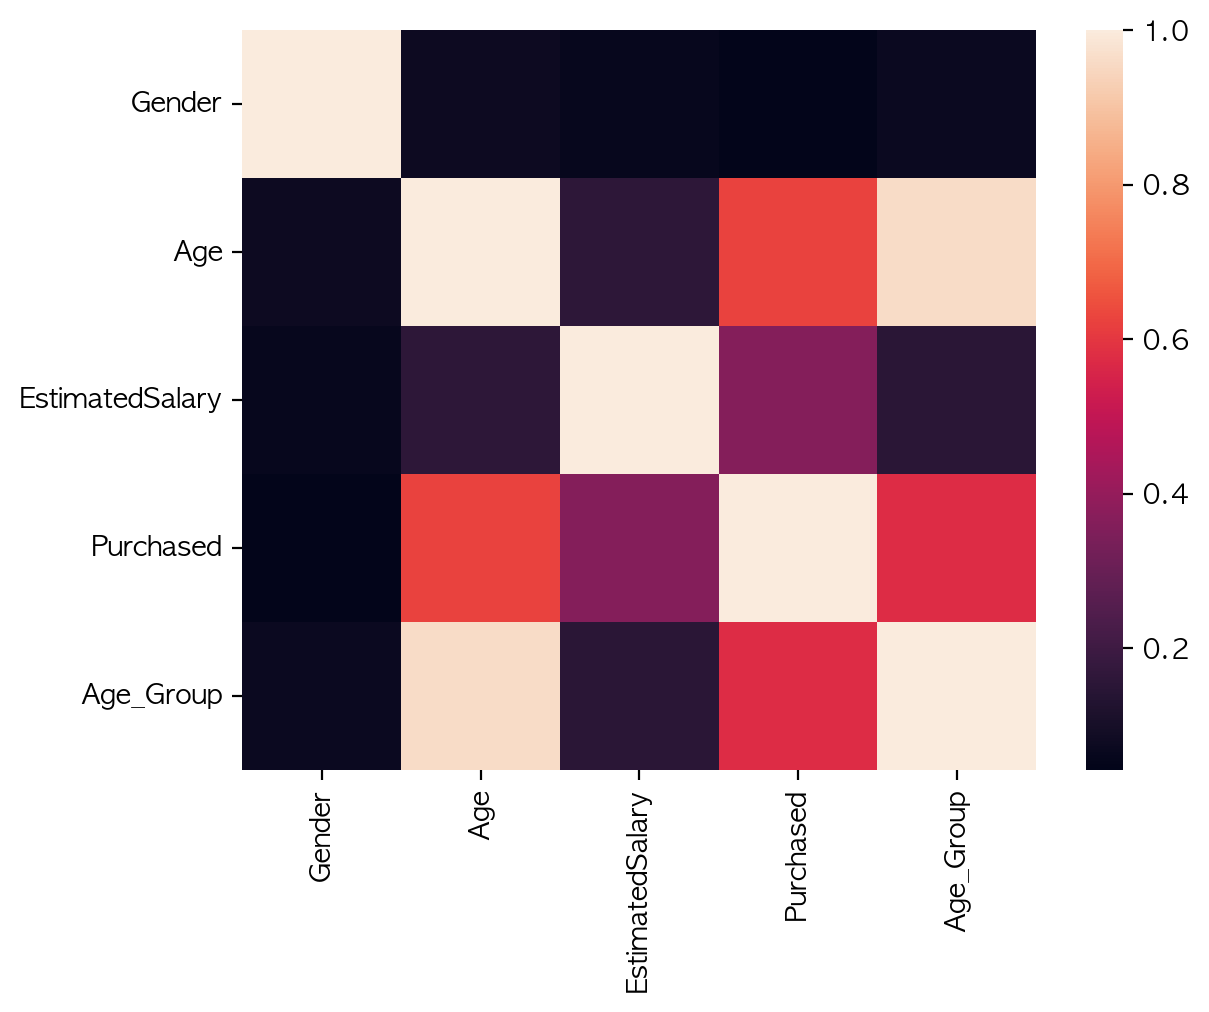

In [193]:
sns.heatmap(scaled_data_df.corr())

### 머신러닝 피처 선택

In [194]:
# X = scaled_data_df[['Gender','EstimatedSalary','Age_Group']]
X = scaled_data_df[['EstimatedSalary','Age_Group']]
y = scaled_data_df['Purchased']

# 머신러닝
- x : 성별, 연령대별 그룹, 급여
- y : 구매여부

In [195]:
X.shape

(400, 2)

In [196]:
y.shape

(400,)

### 함수

#### feature importance 시각화

In [197]:
def vis_feature_importance(feature_importances,model_name="Model"):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x=feature_importances,
        y=X.columns
    )
    
    # 타이틀 및 라벨 추가
    plt.title(f'{model_name} Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.xlim(0,1)
    
    # 각 막대 위에 수치 표시
    for i, v in enumerate(feature_importances):
        ax.text(v + 0.01, i, f'{v:.2f}', color='black', va='center')
    
    # 그래프 표시
    plt.show()

#### confusion matrix 시각화

In [198]:
def vis_confusion_matrix(y_test, y_pred, model_name="", ax=None):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', 
                xticklabels=['Not Purchased', 'Purchased'], 
                yticklabels=['Not Purchased', 'Purchased'],
                ax=ax, 
                annot_kws={"fontsize": 20})  # 텍스트 크기를 16으로 설정
    ax.set_xlabel('Predicted', fontsize=20)  # x축 레이블 크기
    ax.set_ylabel('Actual', fontsize=20)  # y축 레이블 크기
    ax.set_title('Confusion Matrix | ' + model_name, fontsize=16)  # 제목 크기 설정


### 훈련, 테스트 데이터 분할

In [199]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

## Decision Tree(구매할 것이냐 안할것이냐)


In [200]:
X_train.shape

(280, 2)

In [56]:
X_test.shape

(120, 2)

### 모델 생성

In [57]:
dt = DecisionTreeClassifier(random_state=12,max_depth=5,min_samples_split=7)

### fit

In [58]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=7, random_state=12)

### 예측

In [59]:
y_pred = dt.predict(X_test)

### 평가

#### accuracy

In [60]:
dt.score(X_train,y_train)

0.9571428571428572

In [61]:
dt.score(X_test,y_test)

0.8416666666666667

In [62]:
print('accuracy_score : ',accuracy_score(y_test,y_pred))

accuracy_score :  0.8416666666666667


#### confusion matrix

In [63]:
# vis_confusion_matrix(y_test,y_pred,"Decision Tree")

#### classification report

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87        73
         1.0       0.82      0.77      0.79        47

    accuracy                           0.84       120
   macro avg       0.84      0.83      0.83       120
weighted avg       0.84      0.84      0.84       120



#### feature importances

[0.54234169 0.45765831]


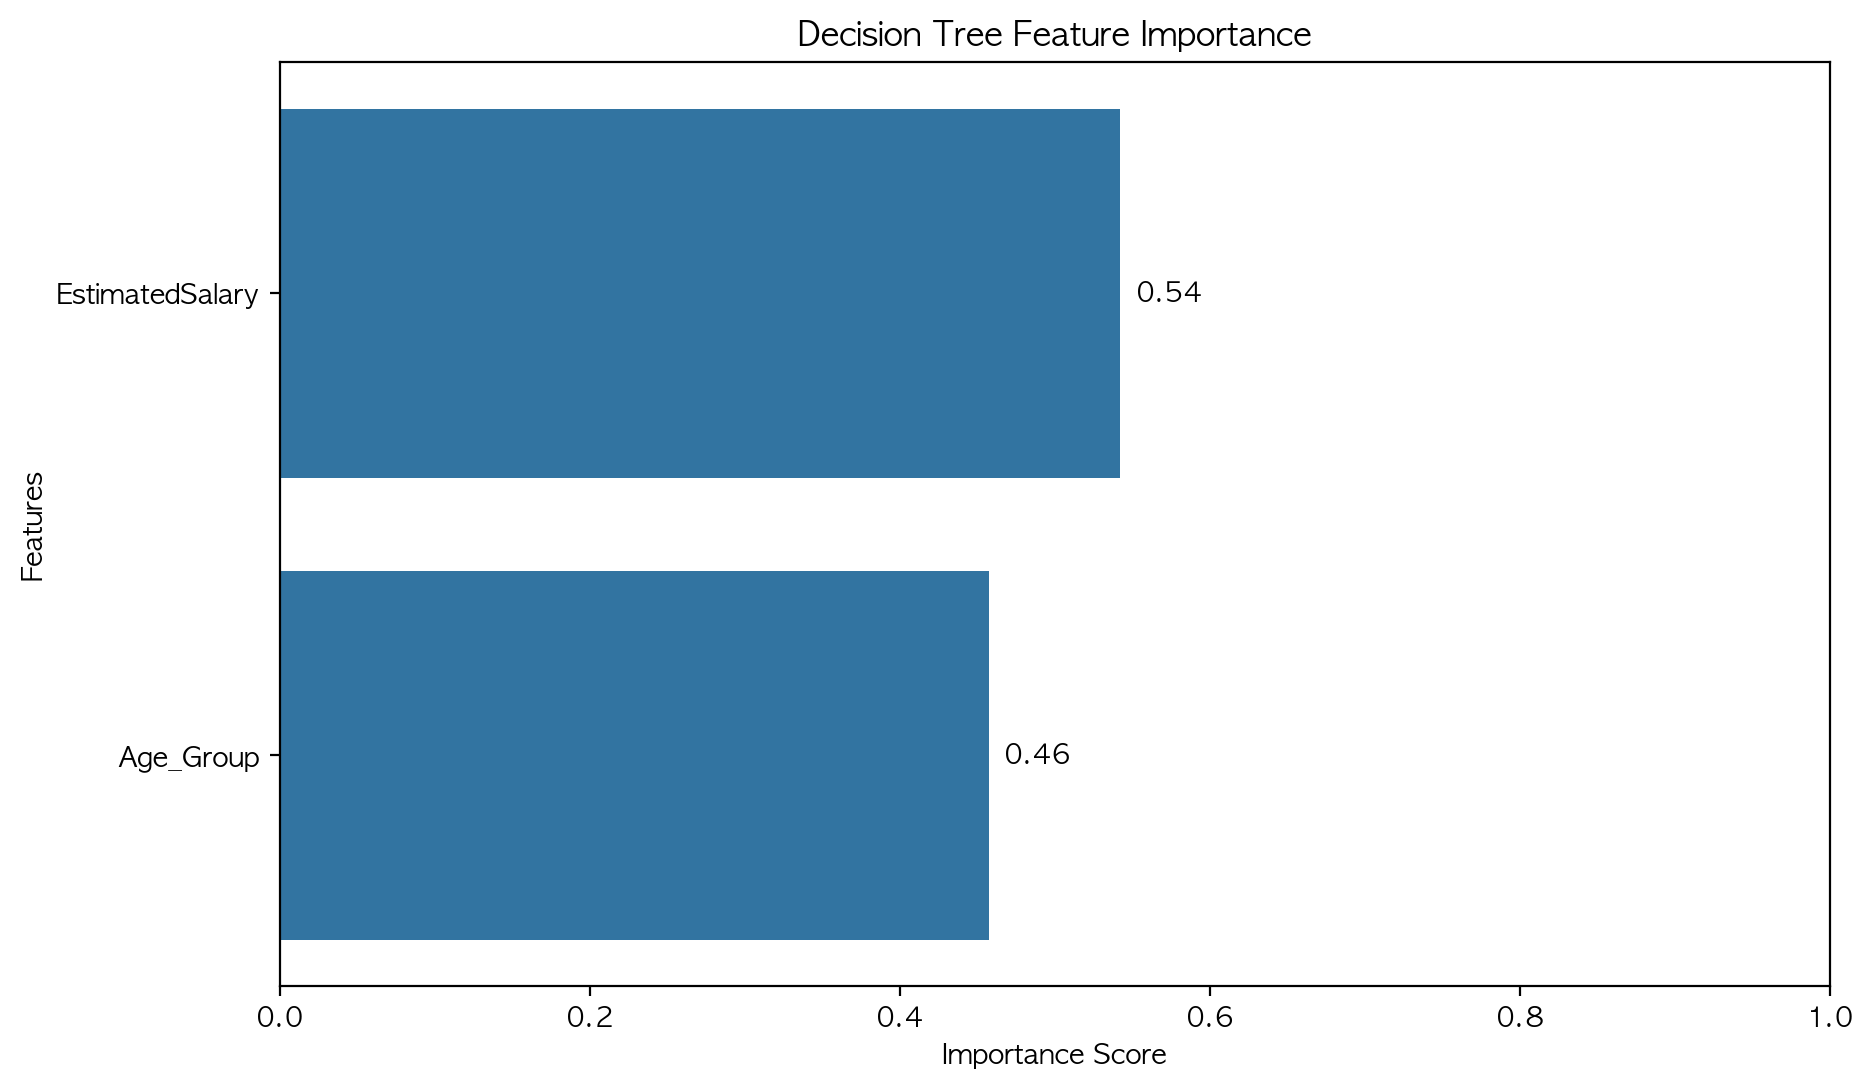

In [65]:
print(dt.feature_importances_)
vis_feature_importance(dt.feature_importances_, 'Decision Tree')

In [66]:
shap.initjs()

In [67]:
explainer = shap.KernelExplainer(dt.predict,X_train)

Using 280 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [68]:
shap_value = explainer.shap_values(X_test,nsamples=100)
shap_train = explainer.shap_values(X_train)

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/280 [00:00<?, ?it/s]

In [69]:
shap.force_plot(
    explainer.expected_value,
    shap_value,X_test
)

#### ROC / ACU

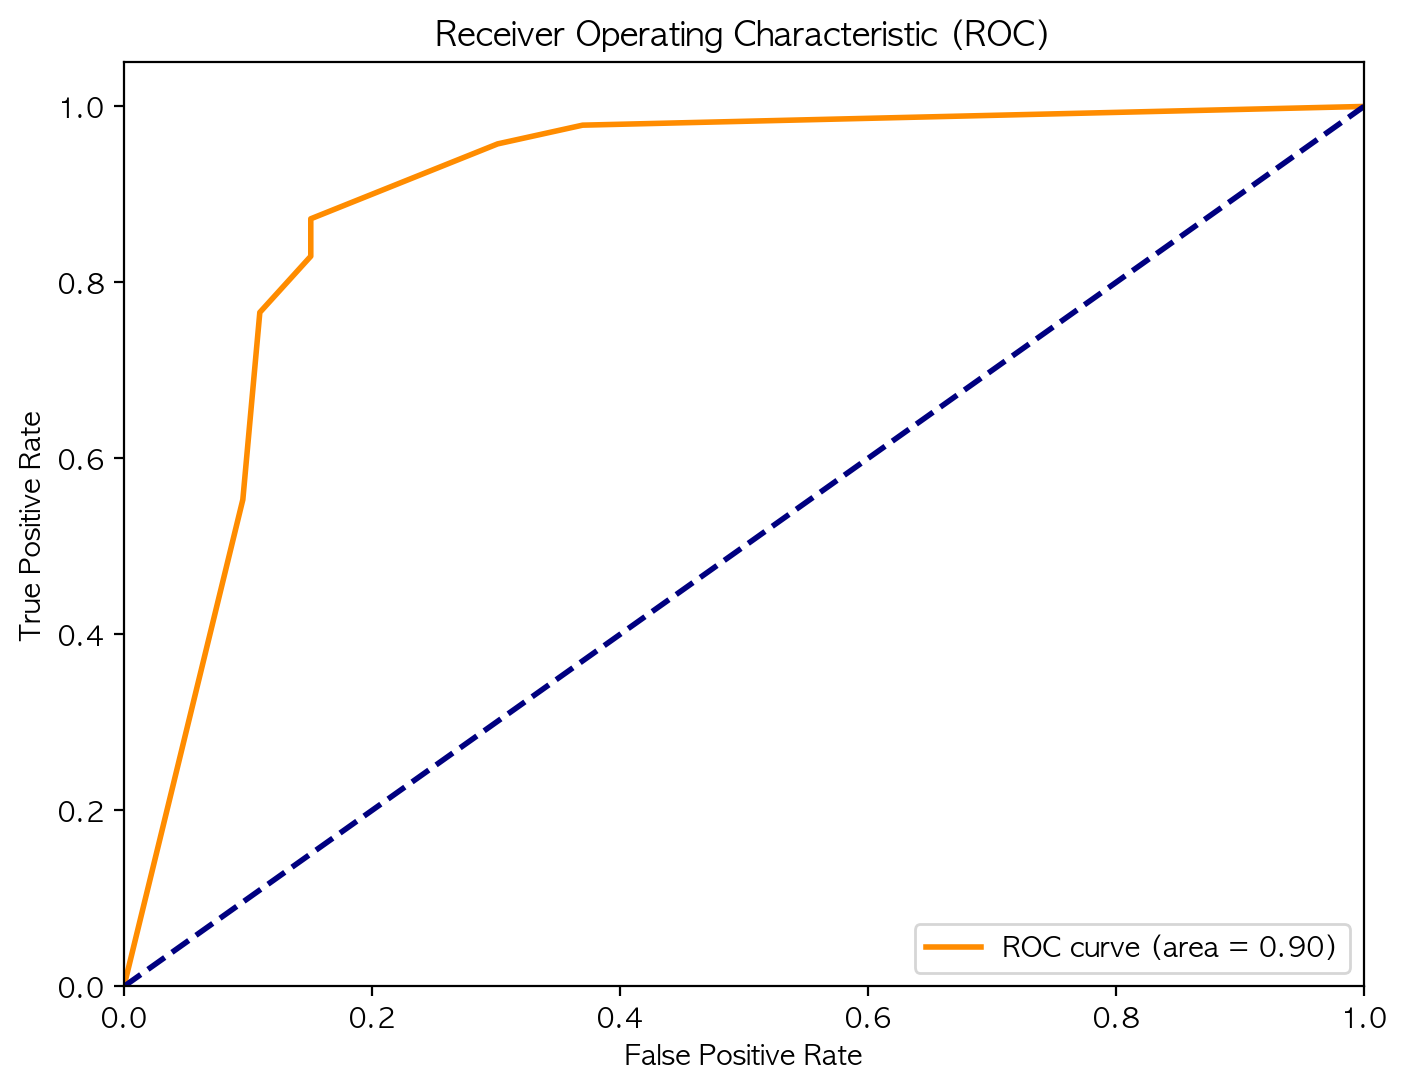

In [70]:
# 예측 확률 계산
y_prob = dt.predict_proba(X_test)[:, 1]

# ROC 곡선 및 AUC 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### Precision-Recall Curve

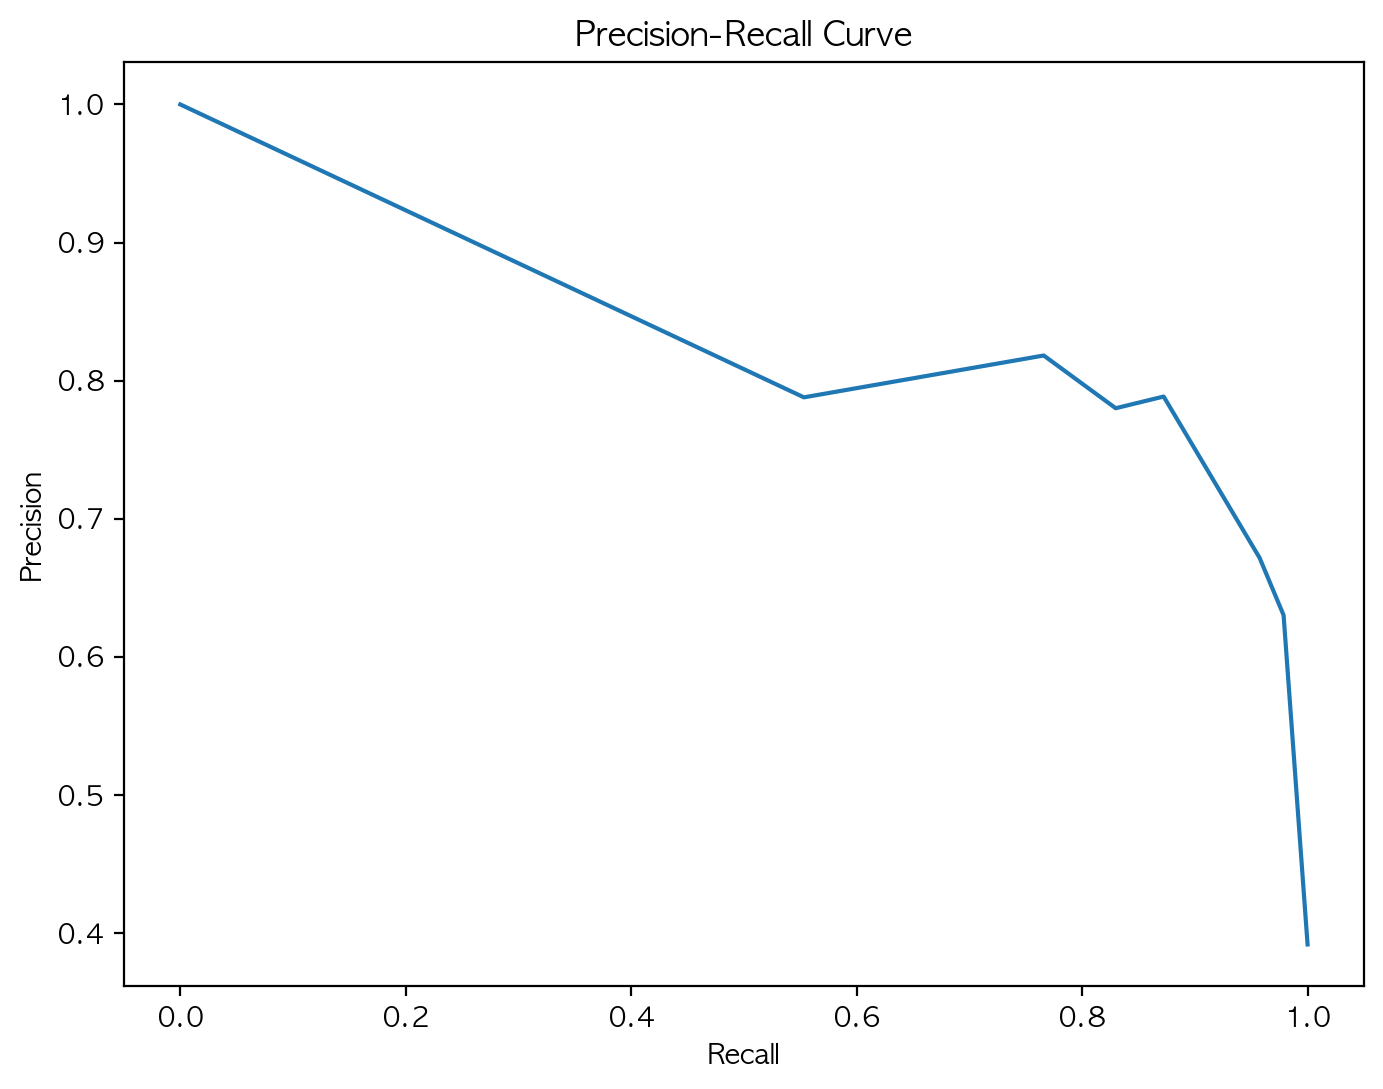

In [71]:
# 정밀도, 재현율, 임계값 계산
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Precision-Recall Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### GridSearch

In [72]:
parameters = {'max_depth': range(1,10), 'min_samples_split': range(2,10)}
grid_dt = GridSearchCV(dt, param_grid=parameters, cv=3, refit=True, return_train_score=True)
grid_dt.fit(X_train, y_train)

# GridSearchCV result
scores_df = pd.DataFrame(grid_dt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']]

params  mean_test_score  rank_test_score
0   {'max_depth': 1, 'min_samples_split': 2}         0.789179               65
1   {'max_depth': 1, 'min_samples_split': 3}         0.789179               65
2   {'max_depth': 1, 'min_samples_split': 4}         0.789179               65
3   {'max_depth': 1, 'min_samples_split': 5}         0.789179               65
4   {'max_depth': 1, 'min_samples_split': 6}         0.789179               65
..                                       ...              ...              ...
67  {'max_depth': 9, 'min_samples_split': 5}         0.881987               37
68  {'max_depth': 9, 'min_samples_split': 6}         0.881987               37
69  {'max_depth': 9, 'min_samples_split': 7}         0.892740               14
70  {'max_depth': 9, 'min_samples_split': 8}         0.892740               14
71  {'max_depth': 9, 'min_samples_split': 9}         0.896286                9

[72 rows x 3 columns]

In [73]:
# best params
print(f'best params:', grid_dt.best_params_)
print(f'best score {grid_dt.best_score_:.2%}')

best params: {'max_depth': 4, 'min_samples_split': 2}
best score 89.99%


## Random Forest Classifier

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

In [75]:
# rfc = RandomForestClassifier(random_state=12)
rfc = RandomForestClassifier(random_state=12,max_depth=5,min_samples_split=8)


In [76]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=8, random_state=12)

In [77]:
y_pred = rfc.predict(X_test)

### Confusion Matrix

In [78]:
# vis_confusion_matrix(y_test,y_pred,"Random Forest Classifier")

### Feature Importance

[0.58875926 0.41124074]


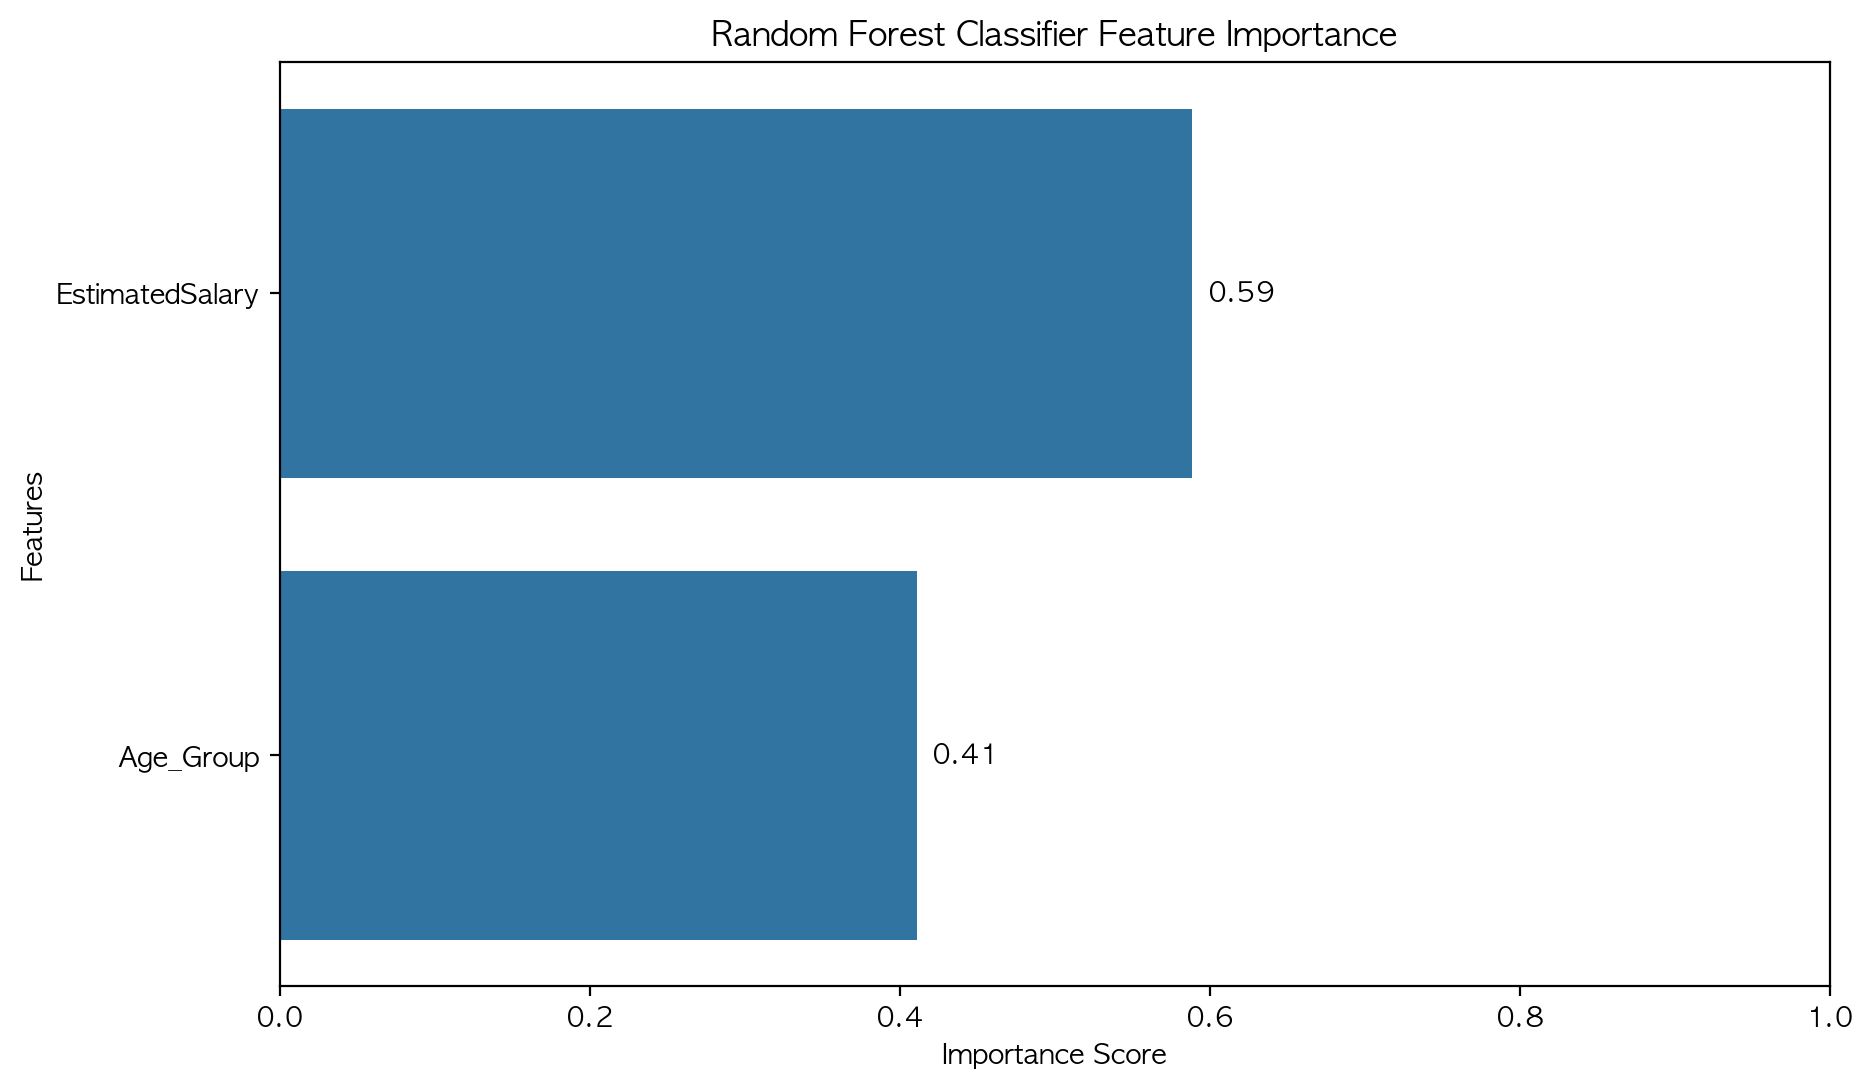

In [79]:
print(rfc.feature_importances_)
vis_feature_importance(rfc.feature_importances_, 'Random Forest Classifier')

### ROC / ACU

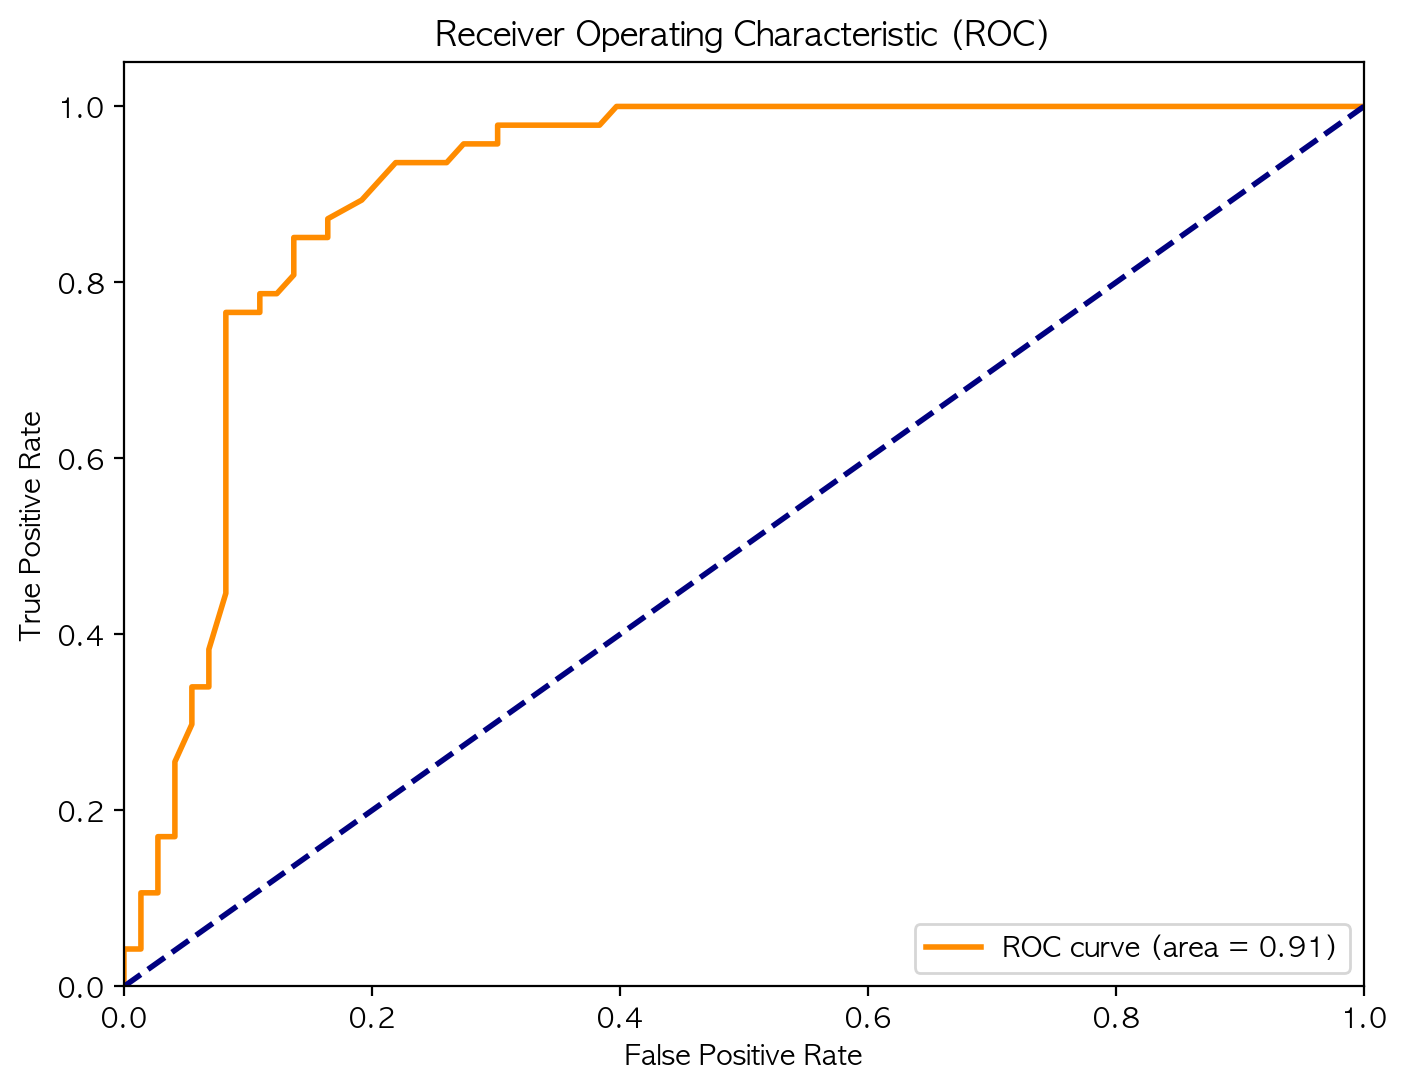

In [80]:
# 예측 확률 계산
y_prob = rfc.predict_proba(X_test)[:, 1]

# ROC 곡선 및 AUC 계산
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Precision-Recall Curve

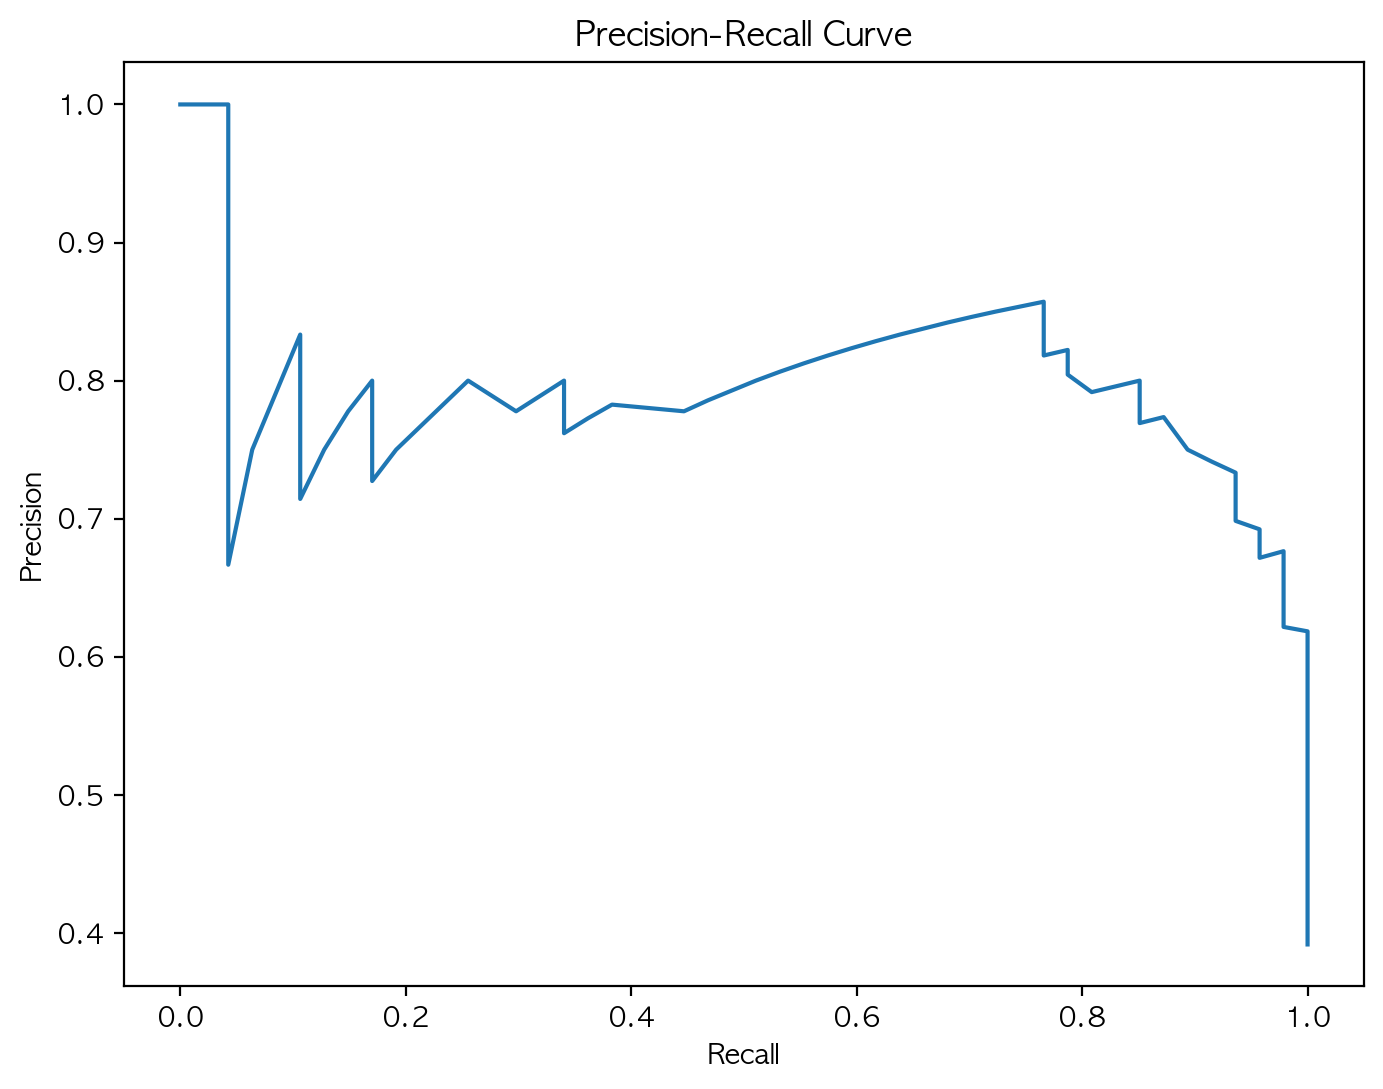

In [81]:
# 정밀도, 재현율, 임계값 계산
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Precision-Recall Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### GridSearch

In [82]:
# parameters = {'max_depth': range(1,10), 'min_samples_split': range(2,10)}
# grid_rfc = GridSearchCV(rfc, param_grid=parameters, cv=3, refit=True, return_train_score=True)
# grid_rfc.fit(X_train, y_train)

# # GridSearchCV result
# scores_df = pd.DataFrame(grid_rfc.cv_results_)
# scores_df[['params', 'mean_test_score', 'rank_test_score']]

In [83]:
# # best params
# print(f'best params:', grid_rfc.best_params_)
# print(f'best score {grid_rfc.best_score_:.2%}')

## KNN

In [84]:
knn = KNeighborsClassifier(n_neighbors=5)

In [85]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [86]:
y_pred = knn.predict(X_test)

### confusion matrix

In [87]:
# vis_confusion_matrix(y_test,y_pred,"KNN")

### ROC Curve

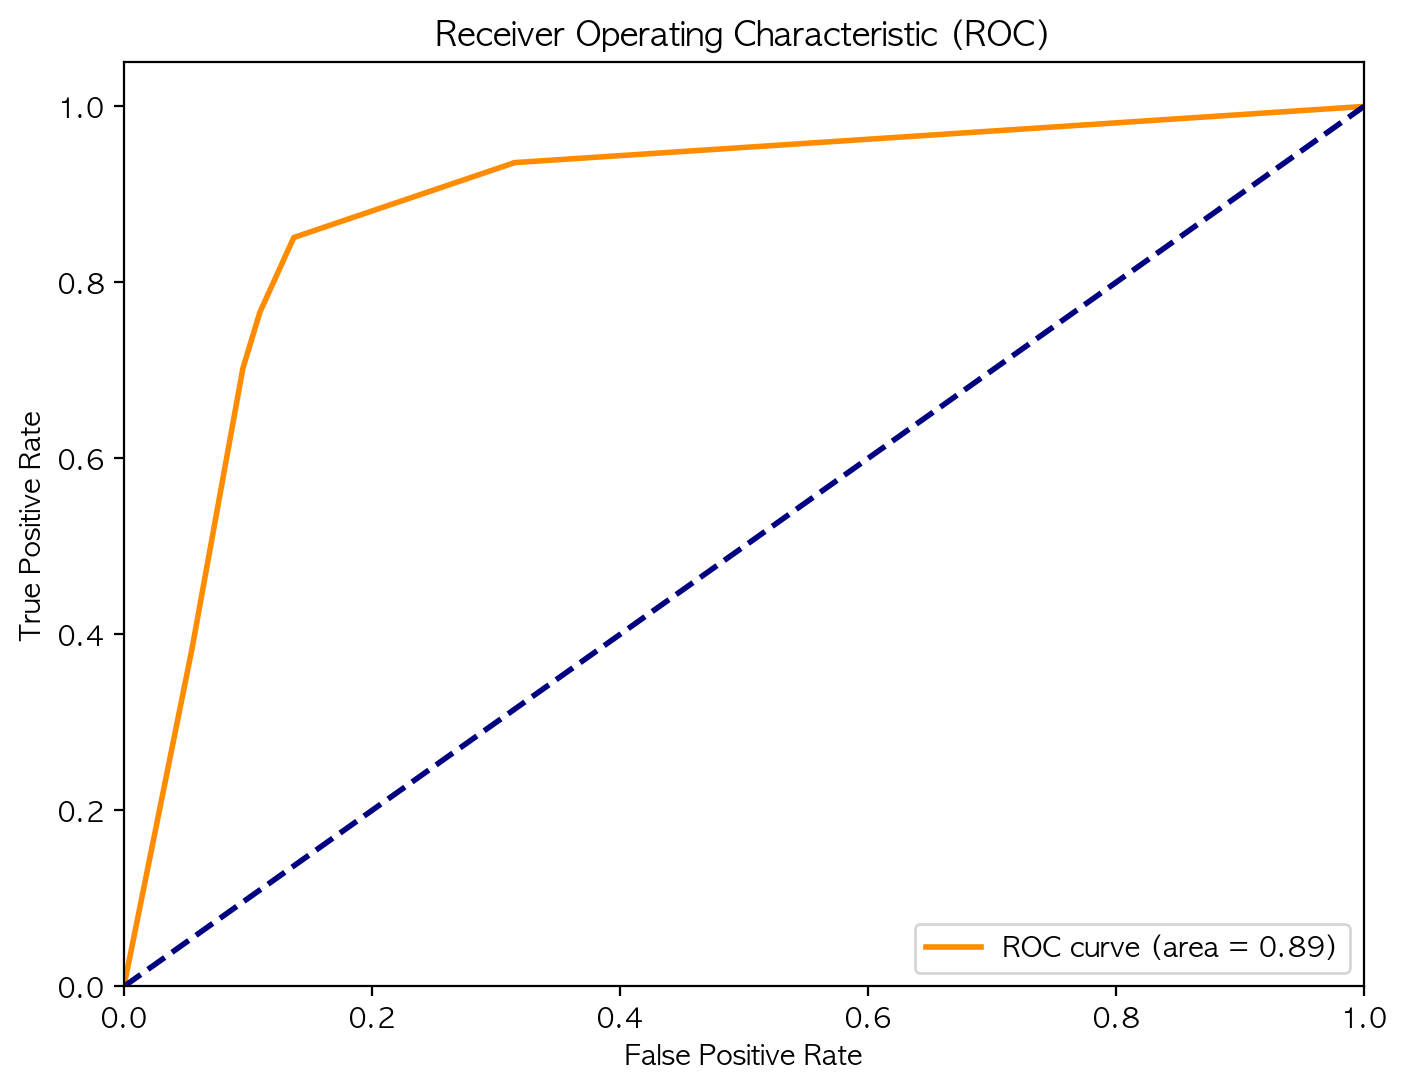

In [88]:
# 예측 확률 계산
y_prob = knn.predict_proba(X_test)[:, 1]

# ROC 곡선 및 AUC 계산
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Precision-Recall Curve

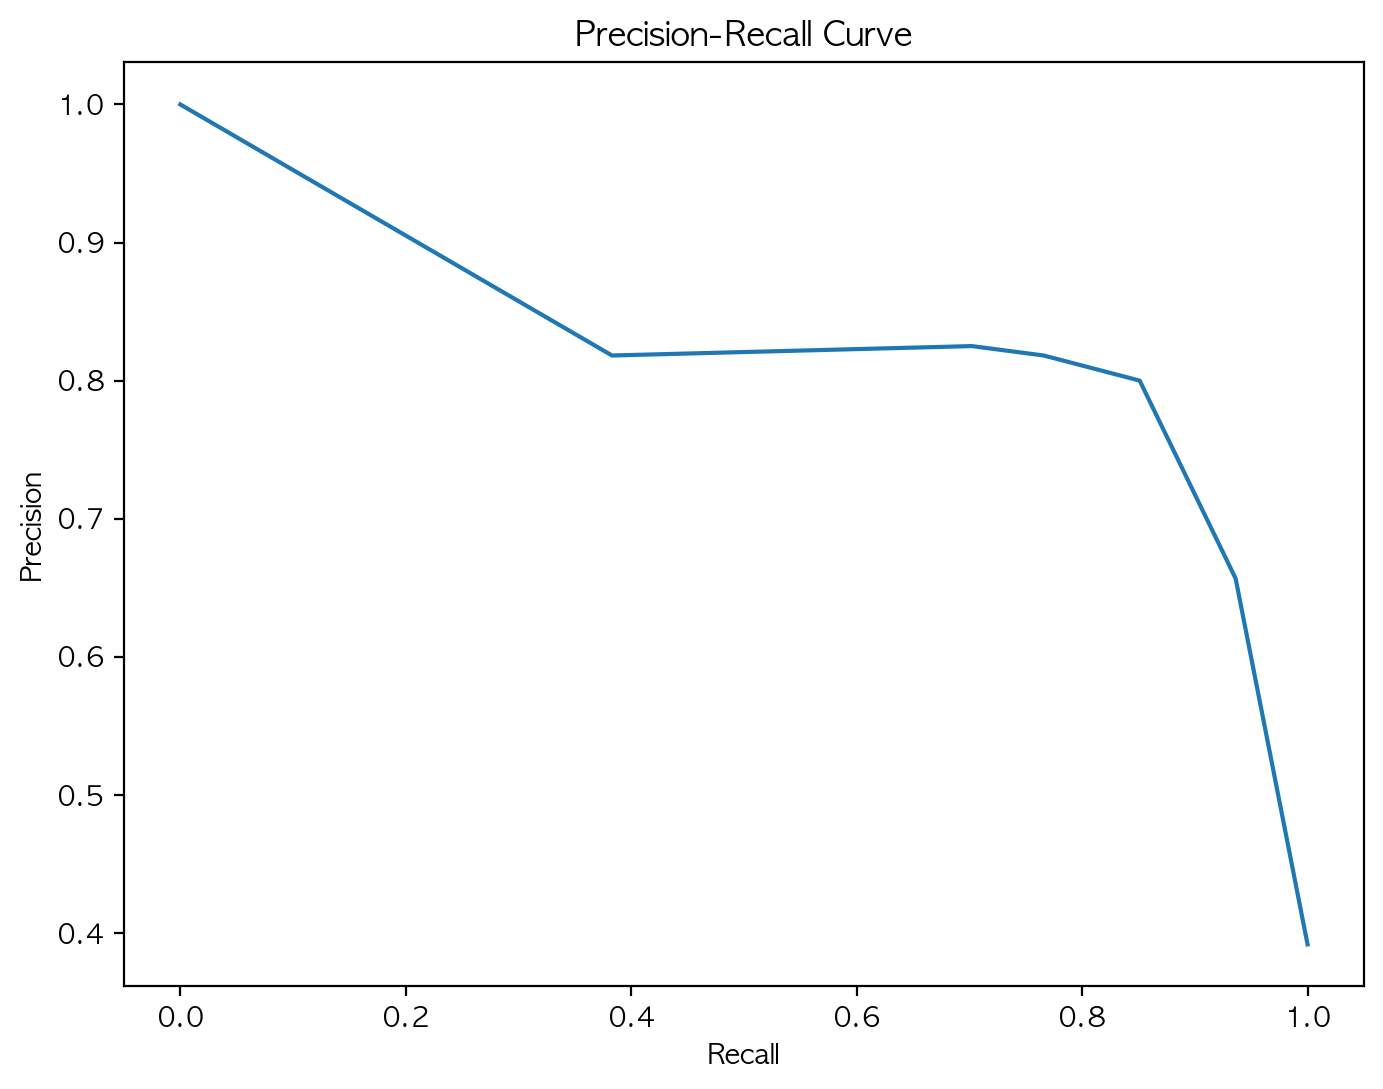

In [89]:
# 정밀도, 재현율, 임계값 계산
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Precision-Recall Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### k-fold cross-validation

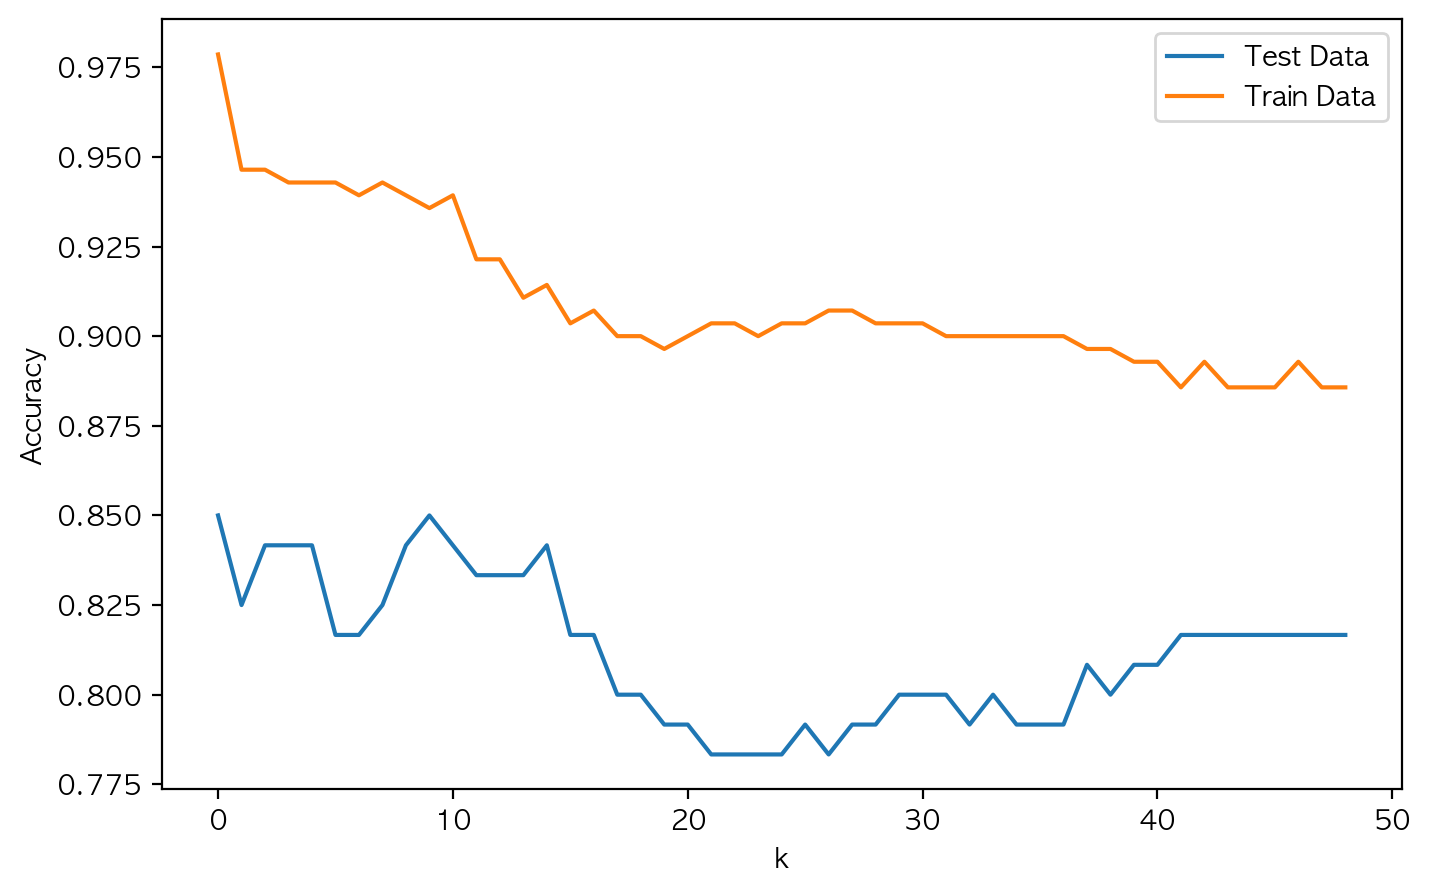

In [90]:
testAcc = []
trainAcc = []
cross_val_results = []
kf = KFold(n_splits=10, shuffle=True, random_state=12)
for k in range(1, 50): # k가 1부터 49까지
    # KNN 으로 Train 데이터 세트를 학습한다.
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    knn.fit(X_train, y_train)
    
    # Test 세트의 Feature에 대한 정확도
    predY = knn.predict(X_test)
    testAcc.append((y_test == predY).sum() / len(predY))
    
    # Train 세트의 Feature에 대한 정확도
    predY = knn.predict(X_train)
    trainAcc.append((y_train == predY).sum() / len(predY))
    
    scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
    cross_val_results.append(scores.mean())
    
plt.figure(figsize=(8, 5))
plt.plot(testAcc, label="Test Data")
plt.plot(trainAcc, label="Train Data")
plt.legend()
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

In [91]:
# 최적의 k값 찾기
optimal_k = range(1,50)[np.argmax(cross_val_results)]
optimal_k, max(cross_val_results)

(13, 0.9100000000000001)

## 머신 러닝 한번에 돌리기

In [92]:
# 학습용과 테스트용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 정의
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=12,max_depth=5,min_samples_split=7),
    'Random Forest': RandomForestClassifier(random_state=12,max_depth=5,min_samples_split=8),   
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

In [93]:
model_performance = {}

# 각 모델에 대해 학습 및 예측 수행
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # 성능 평가
    performance = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }
    model_performance[model_name] = performance

import pandas as pd
# 성능 결과를 데이터프레임으로 정리
performance_df = pd.DataFrame(model_performance).T
performance_df

Accuracy  Precision    Recall  F1 Score
Decision Tree  0.925000   0.895833  0.914894  0.905263
Random Forest  0.941667   0.900000  0.957447  0.927835
KNN            0.925000   0.913043  0.893617  0.903226

#### 혼동행렬

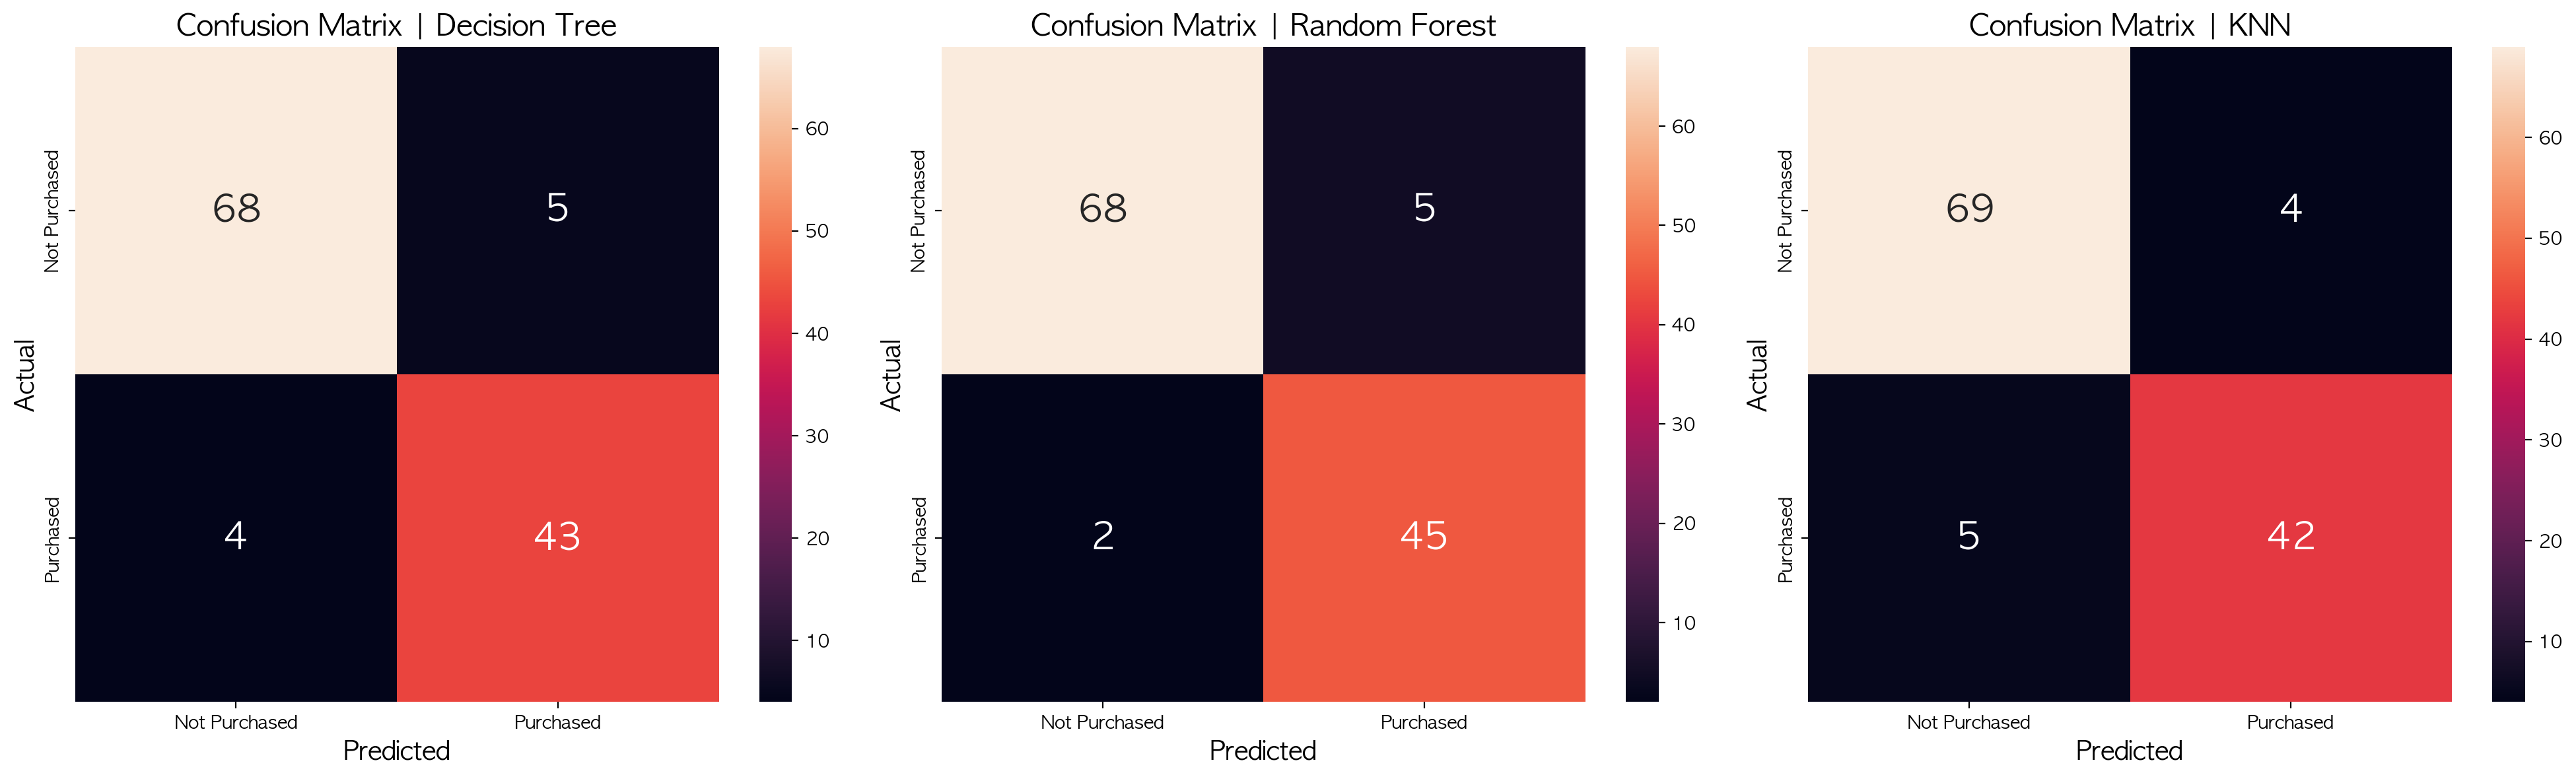

In [117]:
# 서브플롯 생성 (3개의 가로 축)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 각 모델에 대해 혼동 행렬 시각화
for ax, (model_name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    vis_confusion_matrix(y_test, y_pred, model_name=model_name, ax=ax)
    
    # 글씨 크기 조정
    ax.title.set_size(16)  # 제목 글씨 크기
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)  # x축 레이블 크기
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)  # y축 레이블 크기
    
    # 혼동 행렬 내의 텍스트 크기 (만약 텍스트가 포함되어 있다면)
    for text in ax.texts:
        text.set_fontsize(20)  # 혼동 행렬 안의 텍스트 크기

plt.tight_layout()
plt.show()

#### 성능 (Accuracy, Precision, Recall, f1-score)

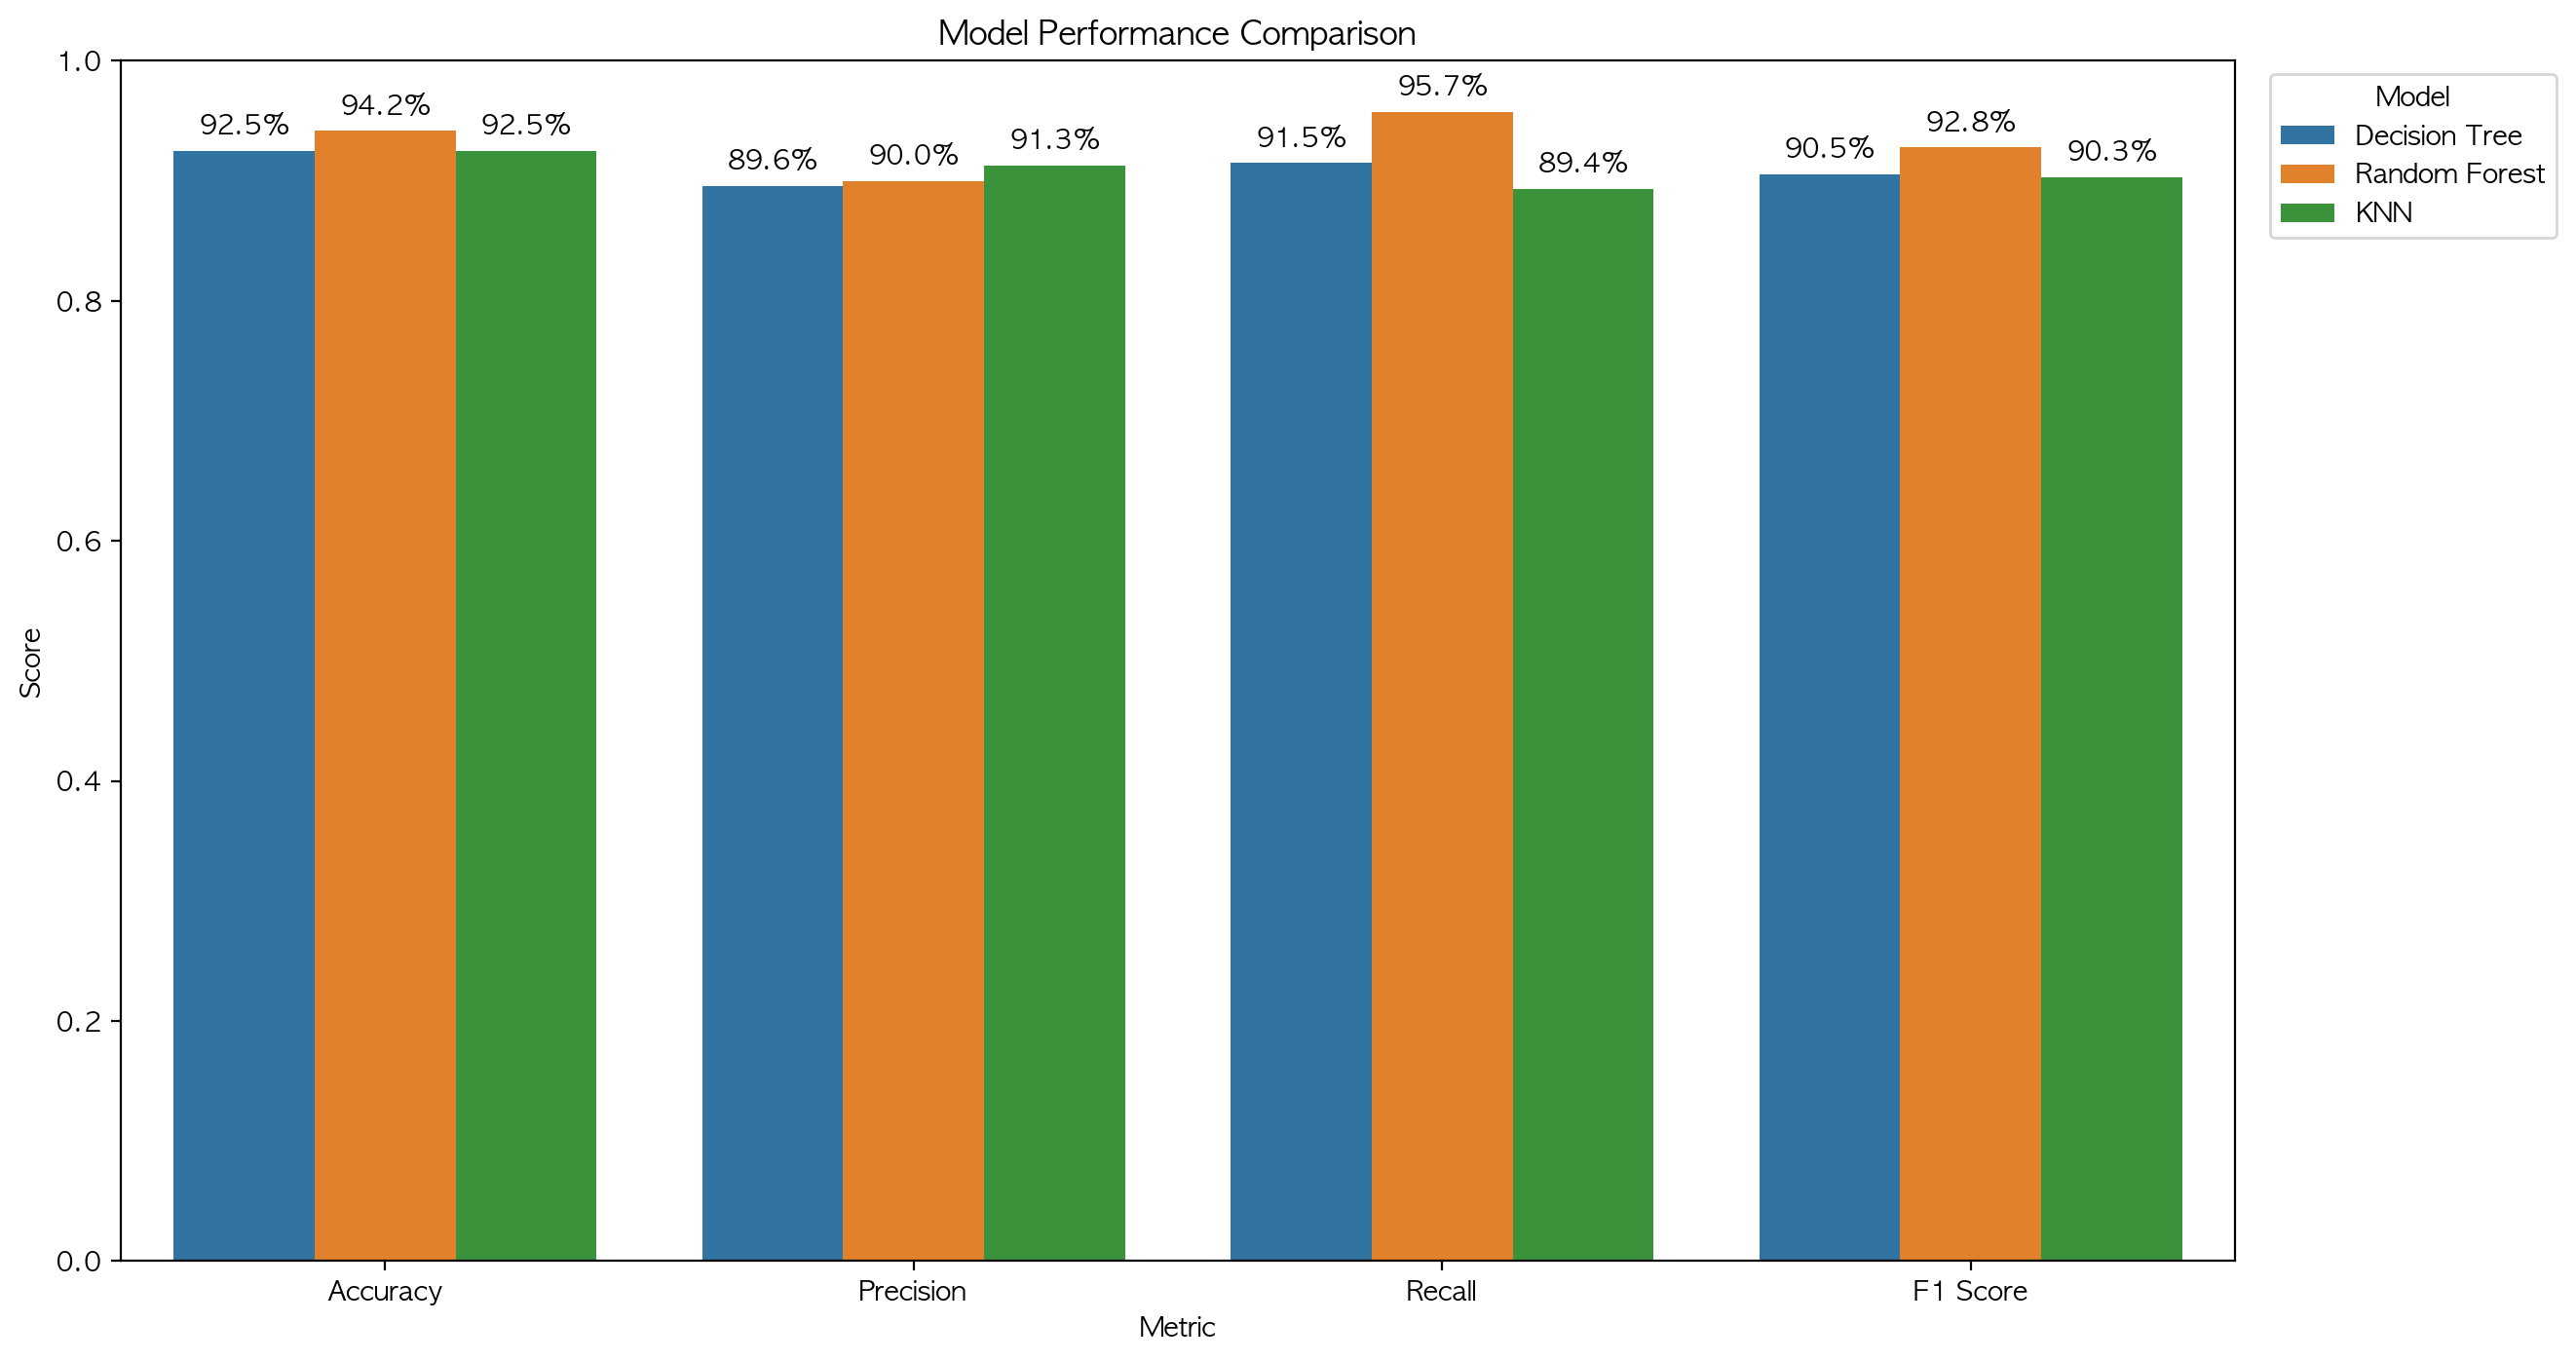

In [95]:

performance_df = performance_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 8))
sns.barplot(x='Metric', y='Score', hue='index', data=performance_df)

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{height*100:.1f}%', 
                           (p.get_x() + p.get_width() / 2., height), 
                           ha='center', va='center', 
                           xytext=(0, 9), textcoords='offset points')

plt.legend(title='Model', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.title('Model Performance Comparison')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

#### ROC Curve

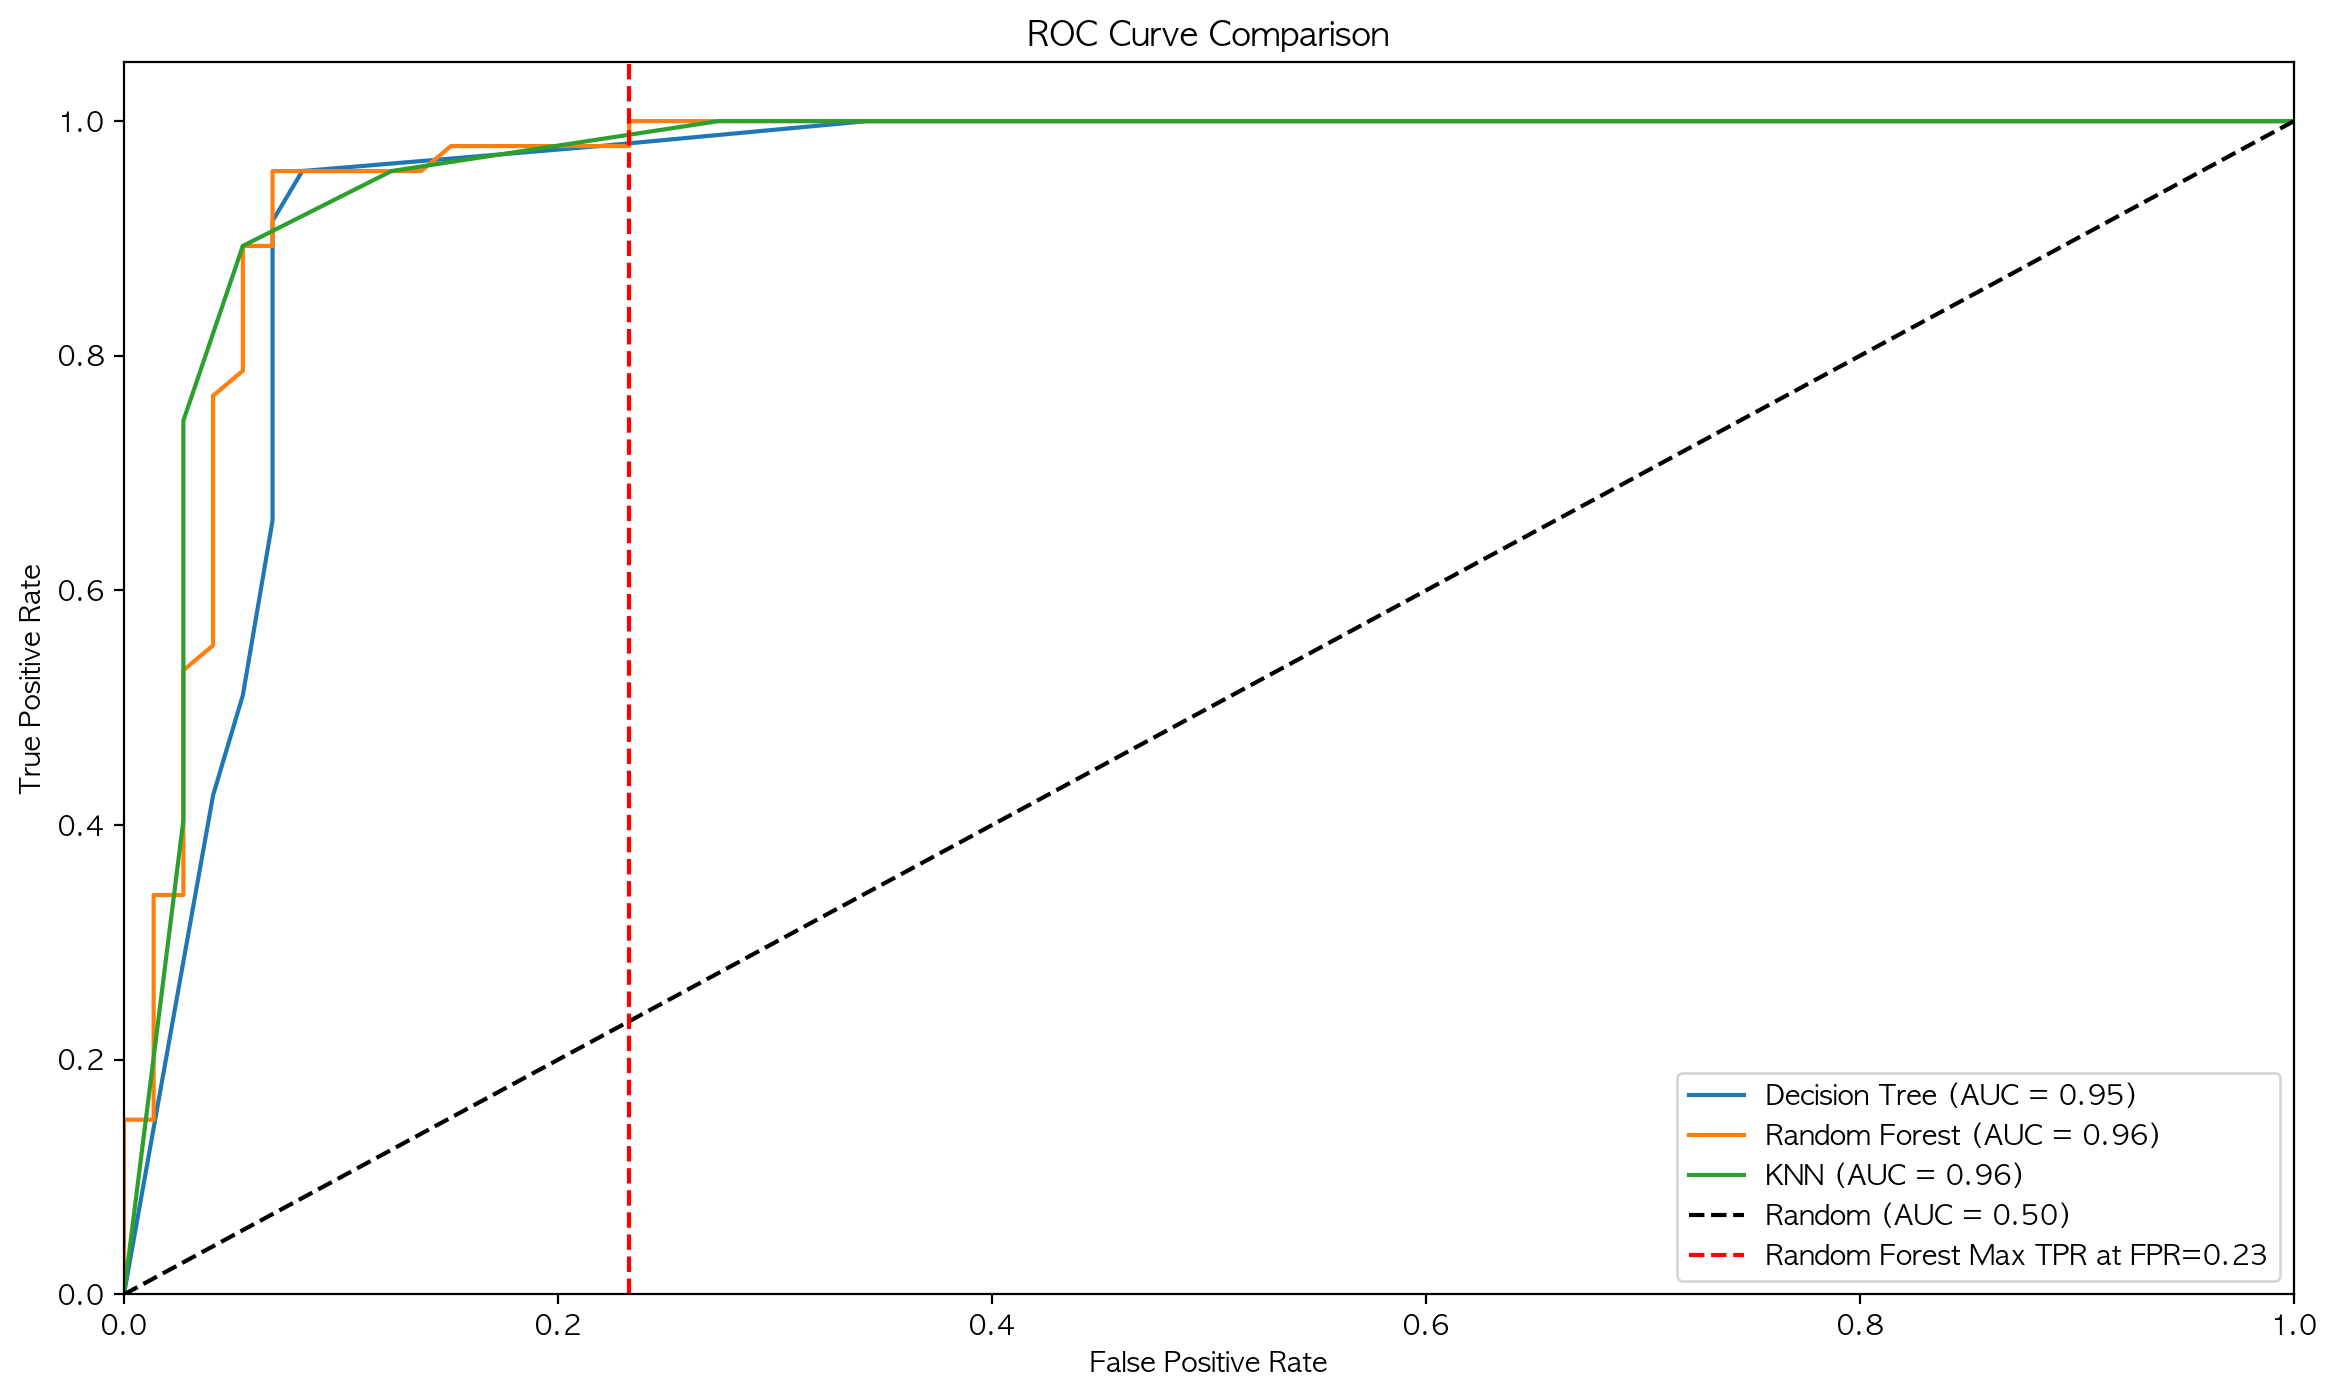

{'Decision Tree': 0.9481200816088603,
 'Random Forest': 0.9634217429320898,
 'KNN': 0.9648790440104926}

In [96]:
roc_auc = {}

plt.figure(figsize=(14, 8))

# 각 모델에 대해 ROC 곡선과 AUC 계산 및 시각화
for model_name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc[model_name] = auc(fpr, tpr)
    
    # Random Forest의 최고 TPR을 기준으로 수직선을 긋기 위한 조건
    if model_name == 'Random Forest':
        max_tpr_rf_idx = tpr.argmax()
        max_tpr_rf_fpr = fpr[max_tpr_rf_idx]
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc[model_name]:.2f})')

# 무작위 분류자 기준선 (AUC=0.5)
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')

# Random Forest 최고점에서의 수직선 그리기
plt.axvline(x=max_tpr_rf_fpr, color='red', linestyle='--', label=f'Random Forest Max TPR at FPR={max_tpr_rf_fpr:.2f}')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

roc_auc

#### 러닝커브

In [97]:
# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5), ax=None):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax.set_title(title)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid()

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

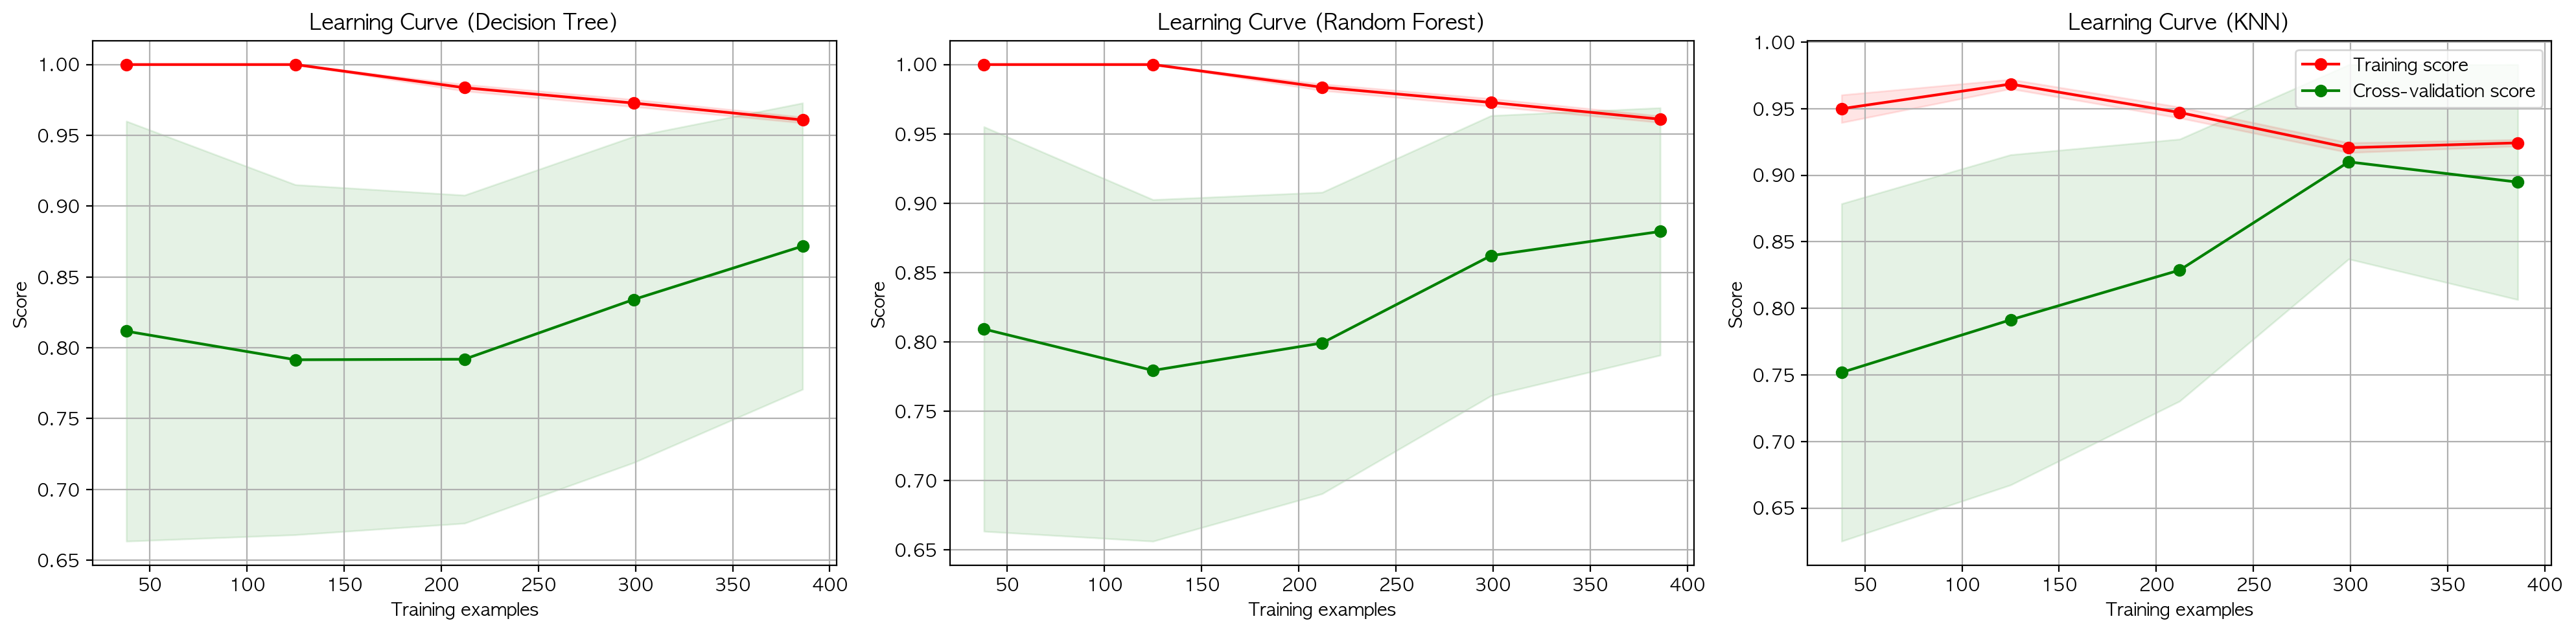

In [98]:
# Replace X and y with your features and target variables
cv = StratifiedKFold(n_splits=30)

# Prepare the figure and axes for the plots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plotting learning curves for each model
plot_learning_curve(DecisionTreeClassifier(), "Learning Curve (Decision Tree)", X, y, cv=cv, ax=axes[0])
plot_learning_curve(RandomForestClassifier(), "Learning Curve (Random Forest)", X, y, cv=cv, ax=axes[1])
plot_learning_curve(KNeighborsClassifier(), "Learning Curve (KNN)", X, y, cv=cv, ax=axes[2])

# Add legend only to the last subplot to avoid clutter
axes[2].legend(loc="best")

plt.tight_layout()
plt.show()

## 모델 선택 후(Random Forest Classifier)

### 교차검증

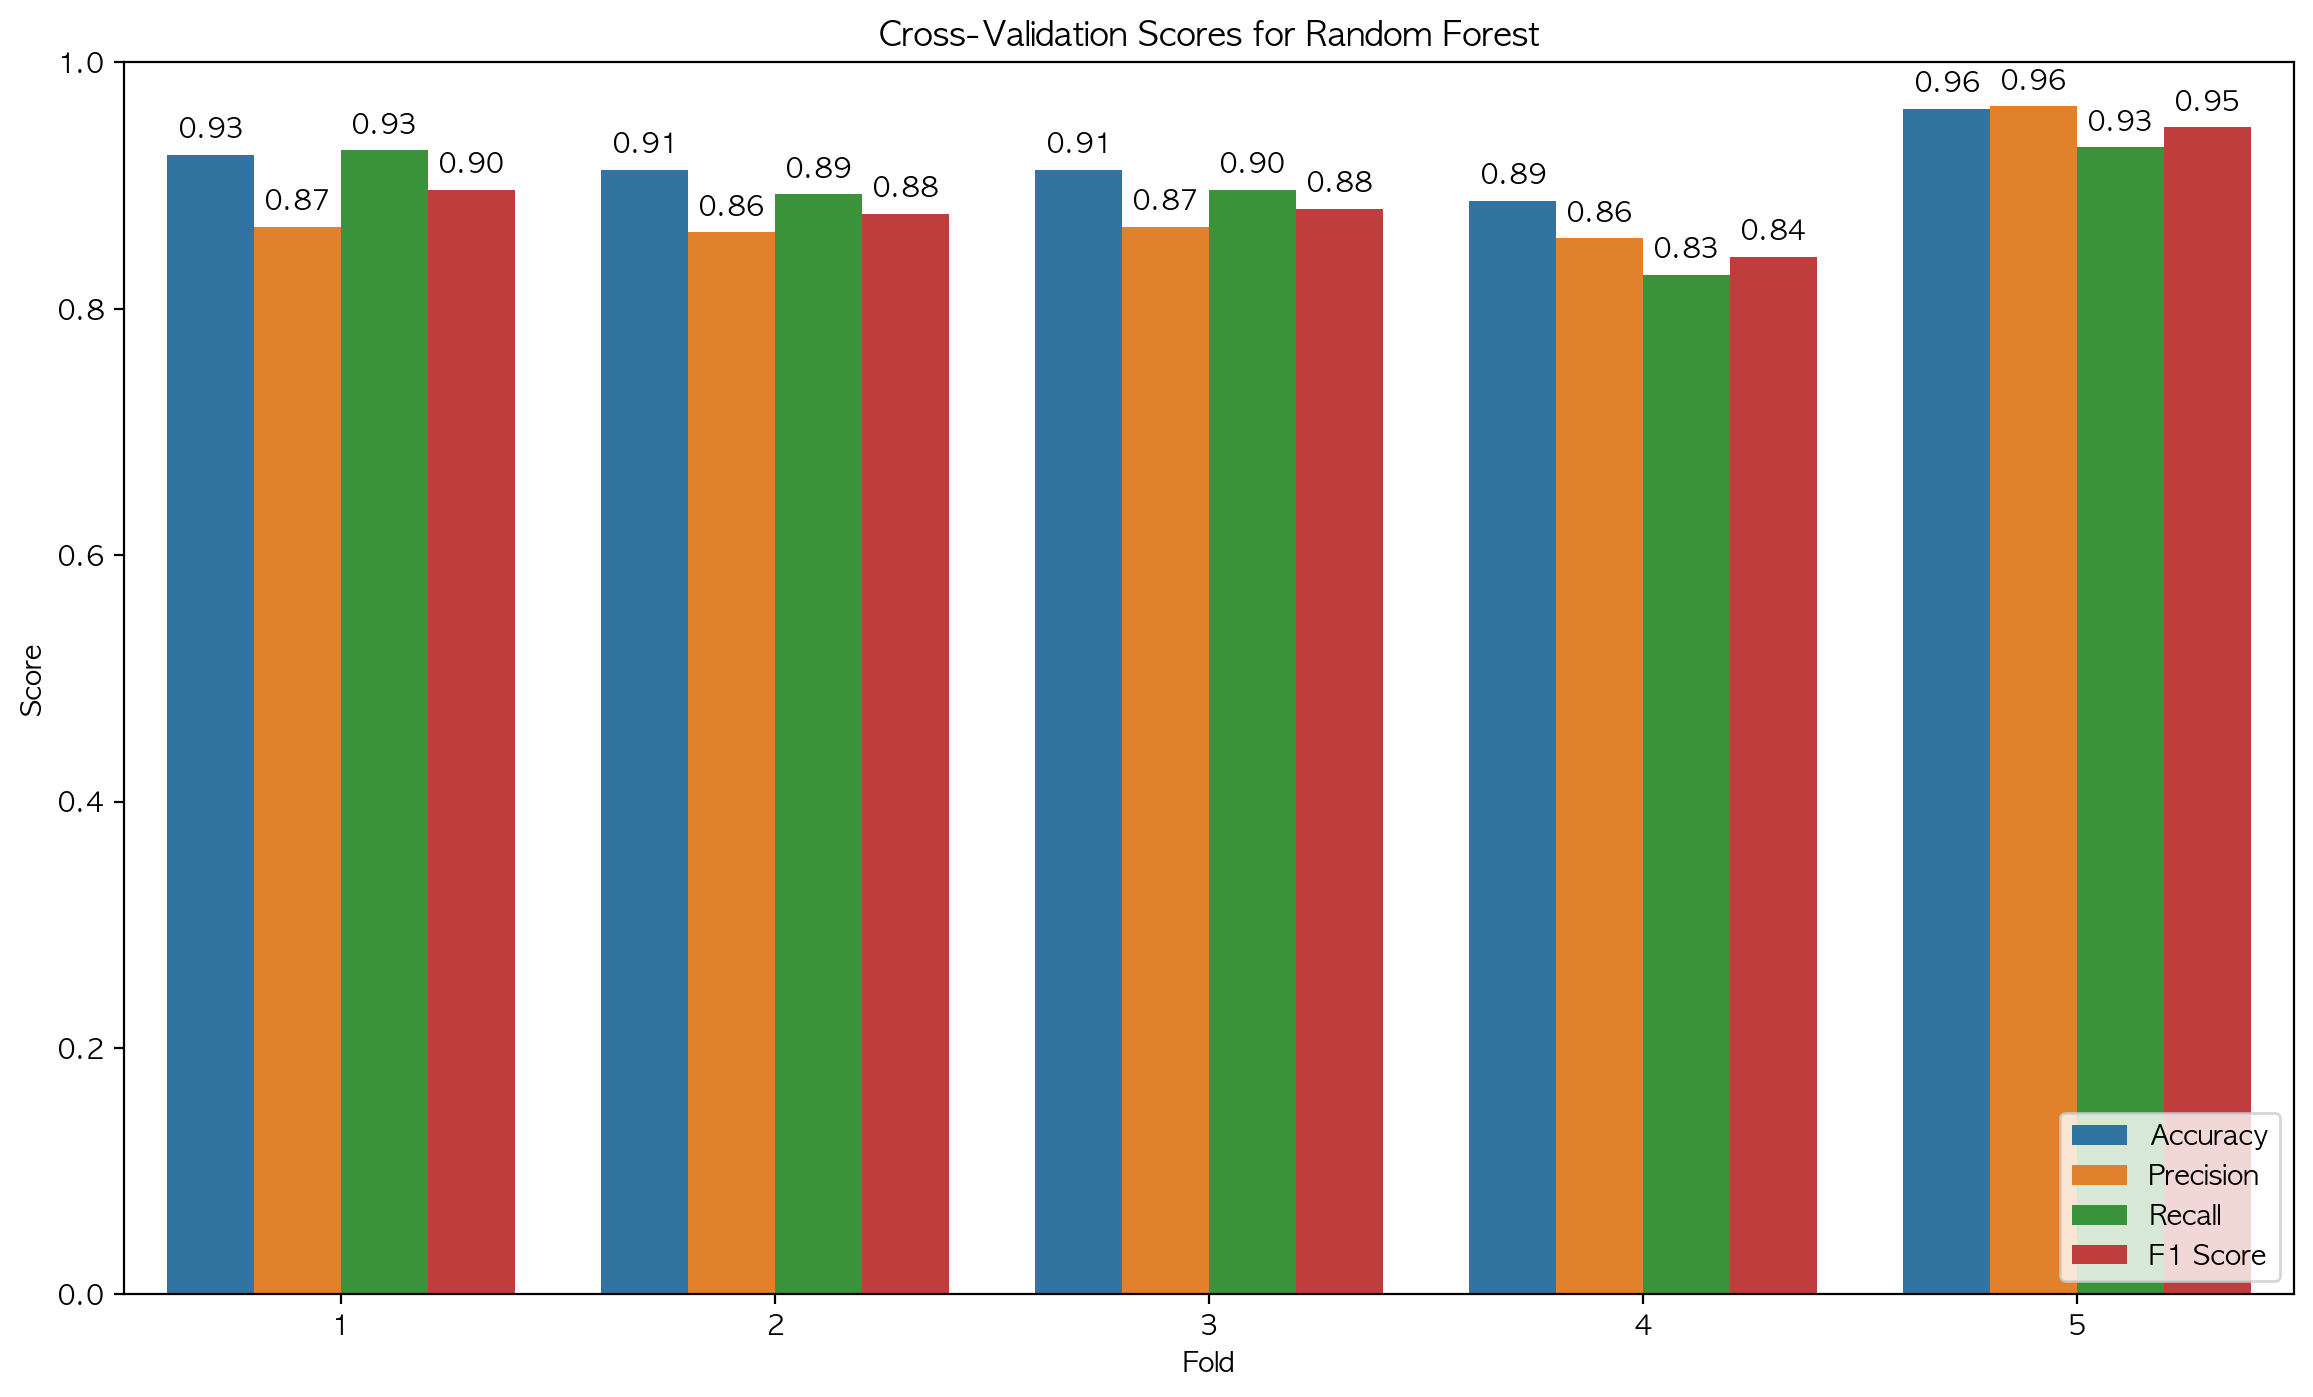

In [99]:
# Random Forest 모델
rf_model = models['Random Forest']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

# 교차 검증 수행
# 교차 검증 수행
accuracy_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='precision')
recall_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='recall')
f1_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='f1')

# 교차 검증 결과를 DataFrame으로 정리
cv_results = pd.DataFrame({
    'Fold': range(1, len(accuracy_scores) + 1),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# 교차 검증 결과 시각화
plt.figure(figsize=(14, 8))
cv_results_melted = cv_results.melt(id_vars='Fold', var_name='Metric', value_name='Score')
sns.barplot(x='Fold', y='Score', hue='Metric', data=cv_results_melted)

# 각 막대 위에 수치 표시
for p in plt.gca().patches:
    height = p.get_height()
    # Check if the height is greater than 0 to annotate
    if height > 0:
        plt.gca().annotate(f'{p.get_height():.2f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 9), textcoords='offset points')
        

plt.title('Cross-Validation Scores for Random Forest')
plt.ylabel('Score')
plt.xlabel('Fold')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

In [100]:
# 각 Metric의 평균값에 대한 가로선 추가
mean_scores = cv_results.mean()
mean_scores

Fold         3.000000
Accuracy     0.920000
Precision    0.883366
Recall       0.895320
F1 Score     0.888915
dtype: float64

### feature importance

[0.63785188 0.36214812]


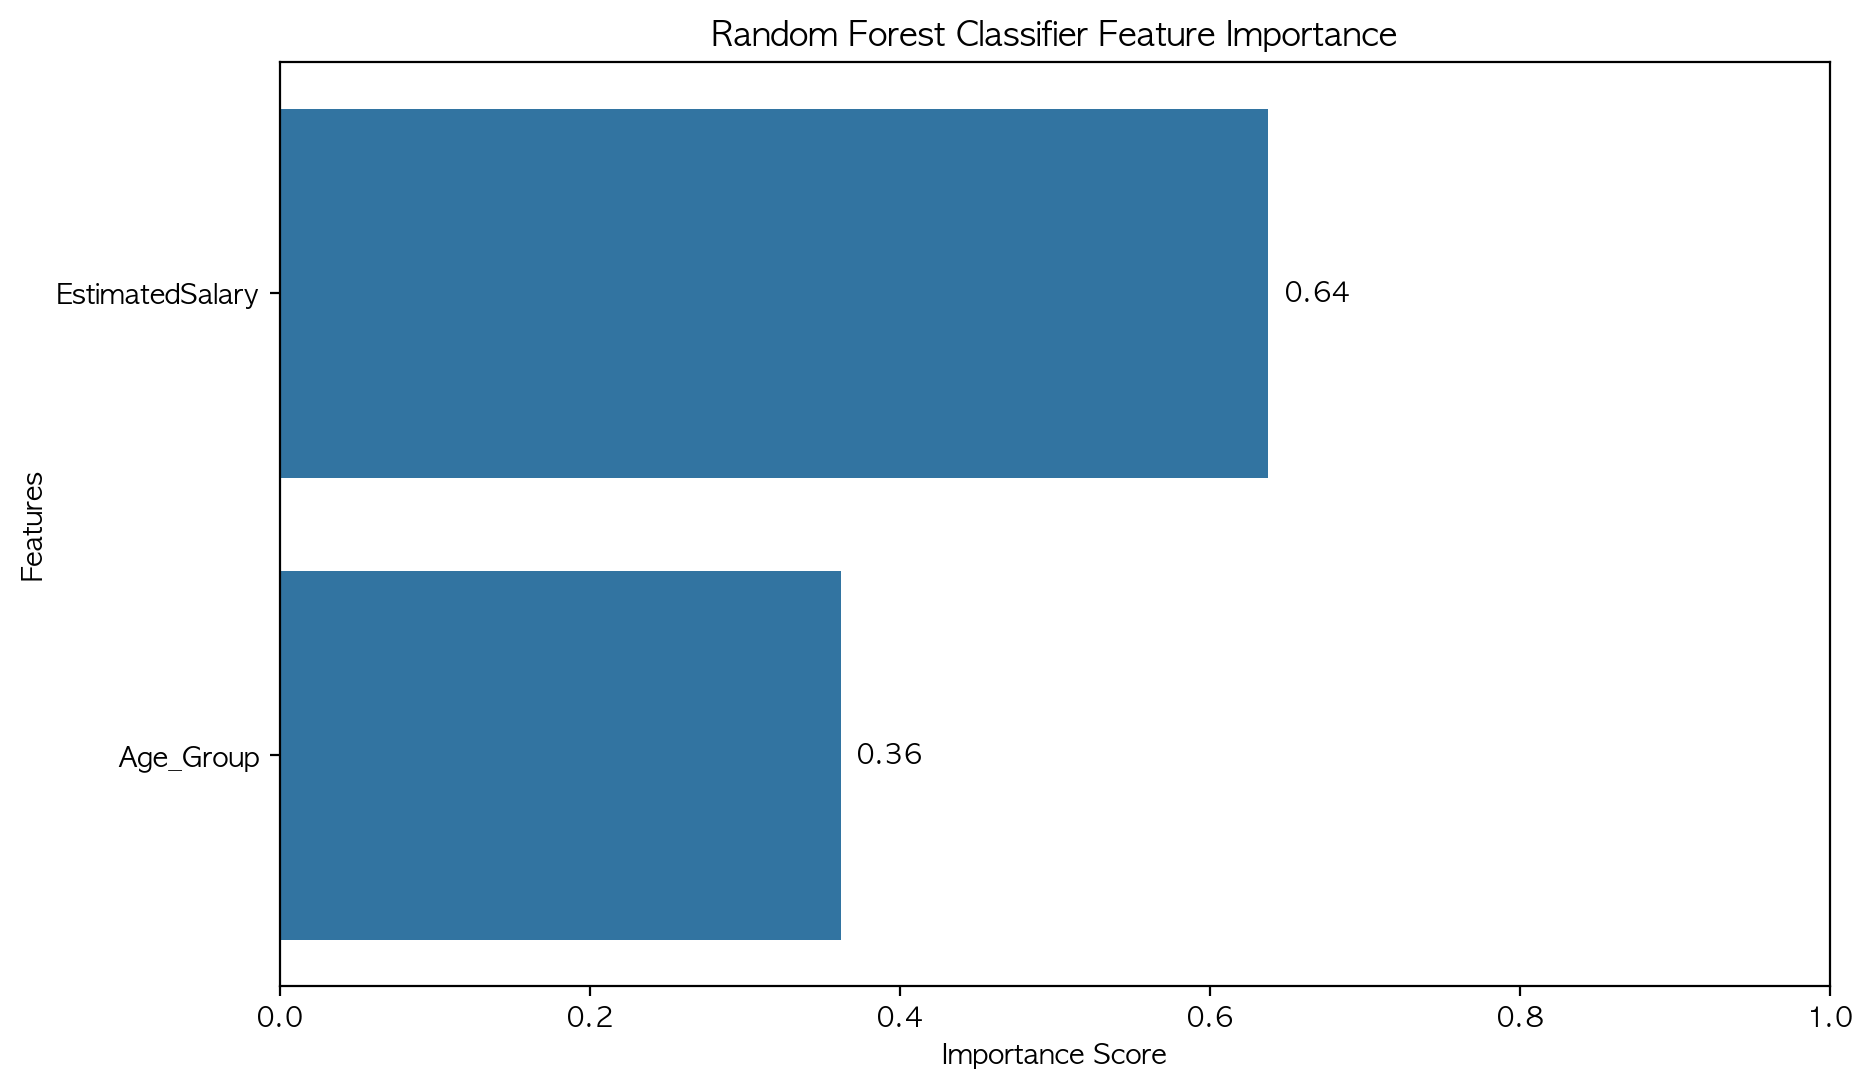

In [101]:
print(rf_model.feature_importances_)
vis_feature_importance(rf_model.feature_importances_, 'Random Forest Classifier')

## Result


### Discussion

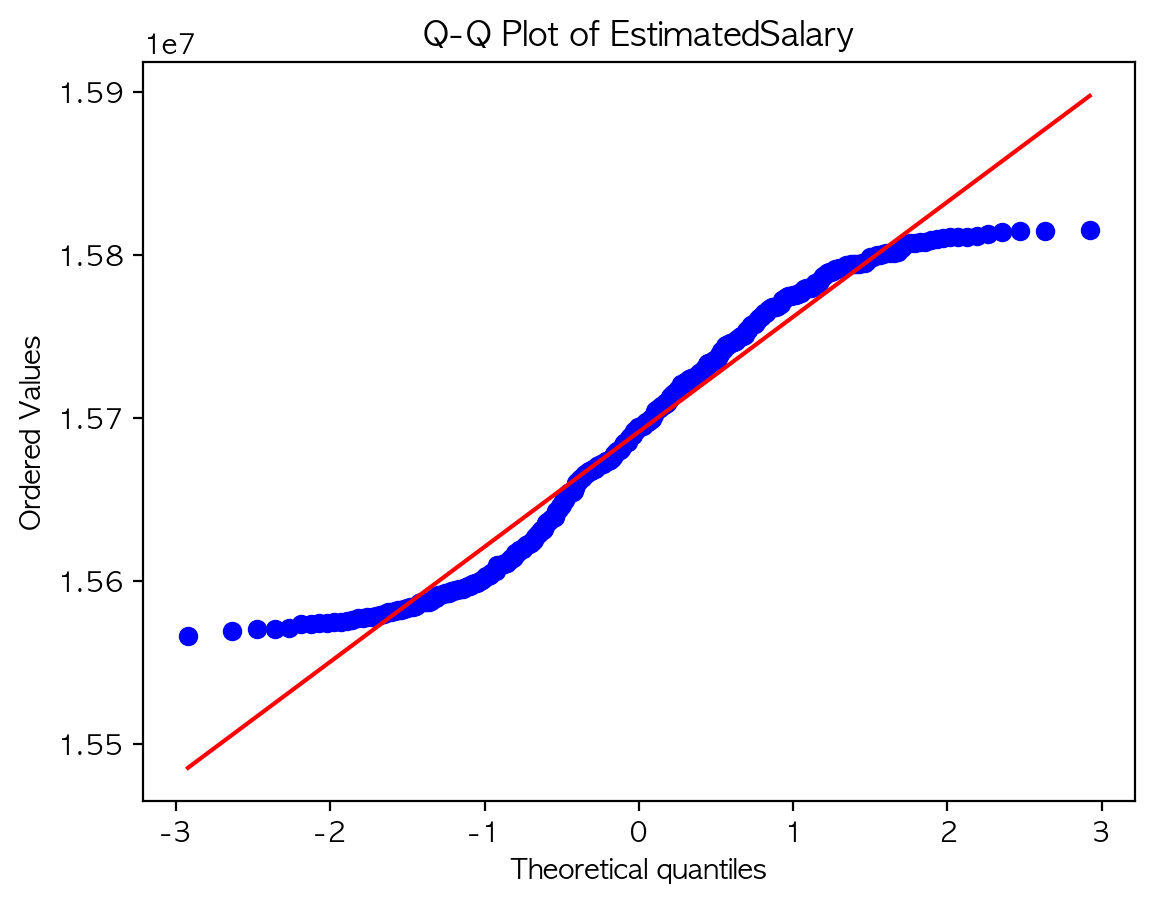

In [43]:

d = np.random.normal(loc=0,scale=1,size=100)

column_data = data['User ID']

stats.probplot(column_data, dist="norm", plot=plt)
# sns.histplot(data['EstimatedSalary'])
plt.title('Q-Q Plot of EstimatedSalary')
plt.show()


<Figure size 1000x1000 with 0 Axes>

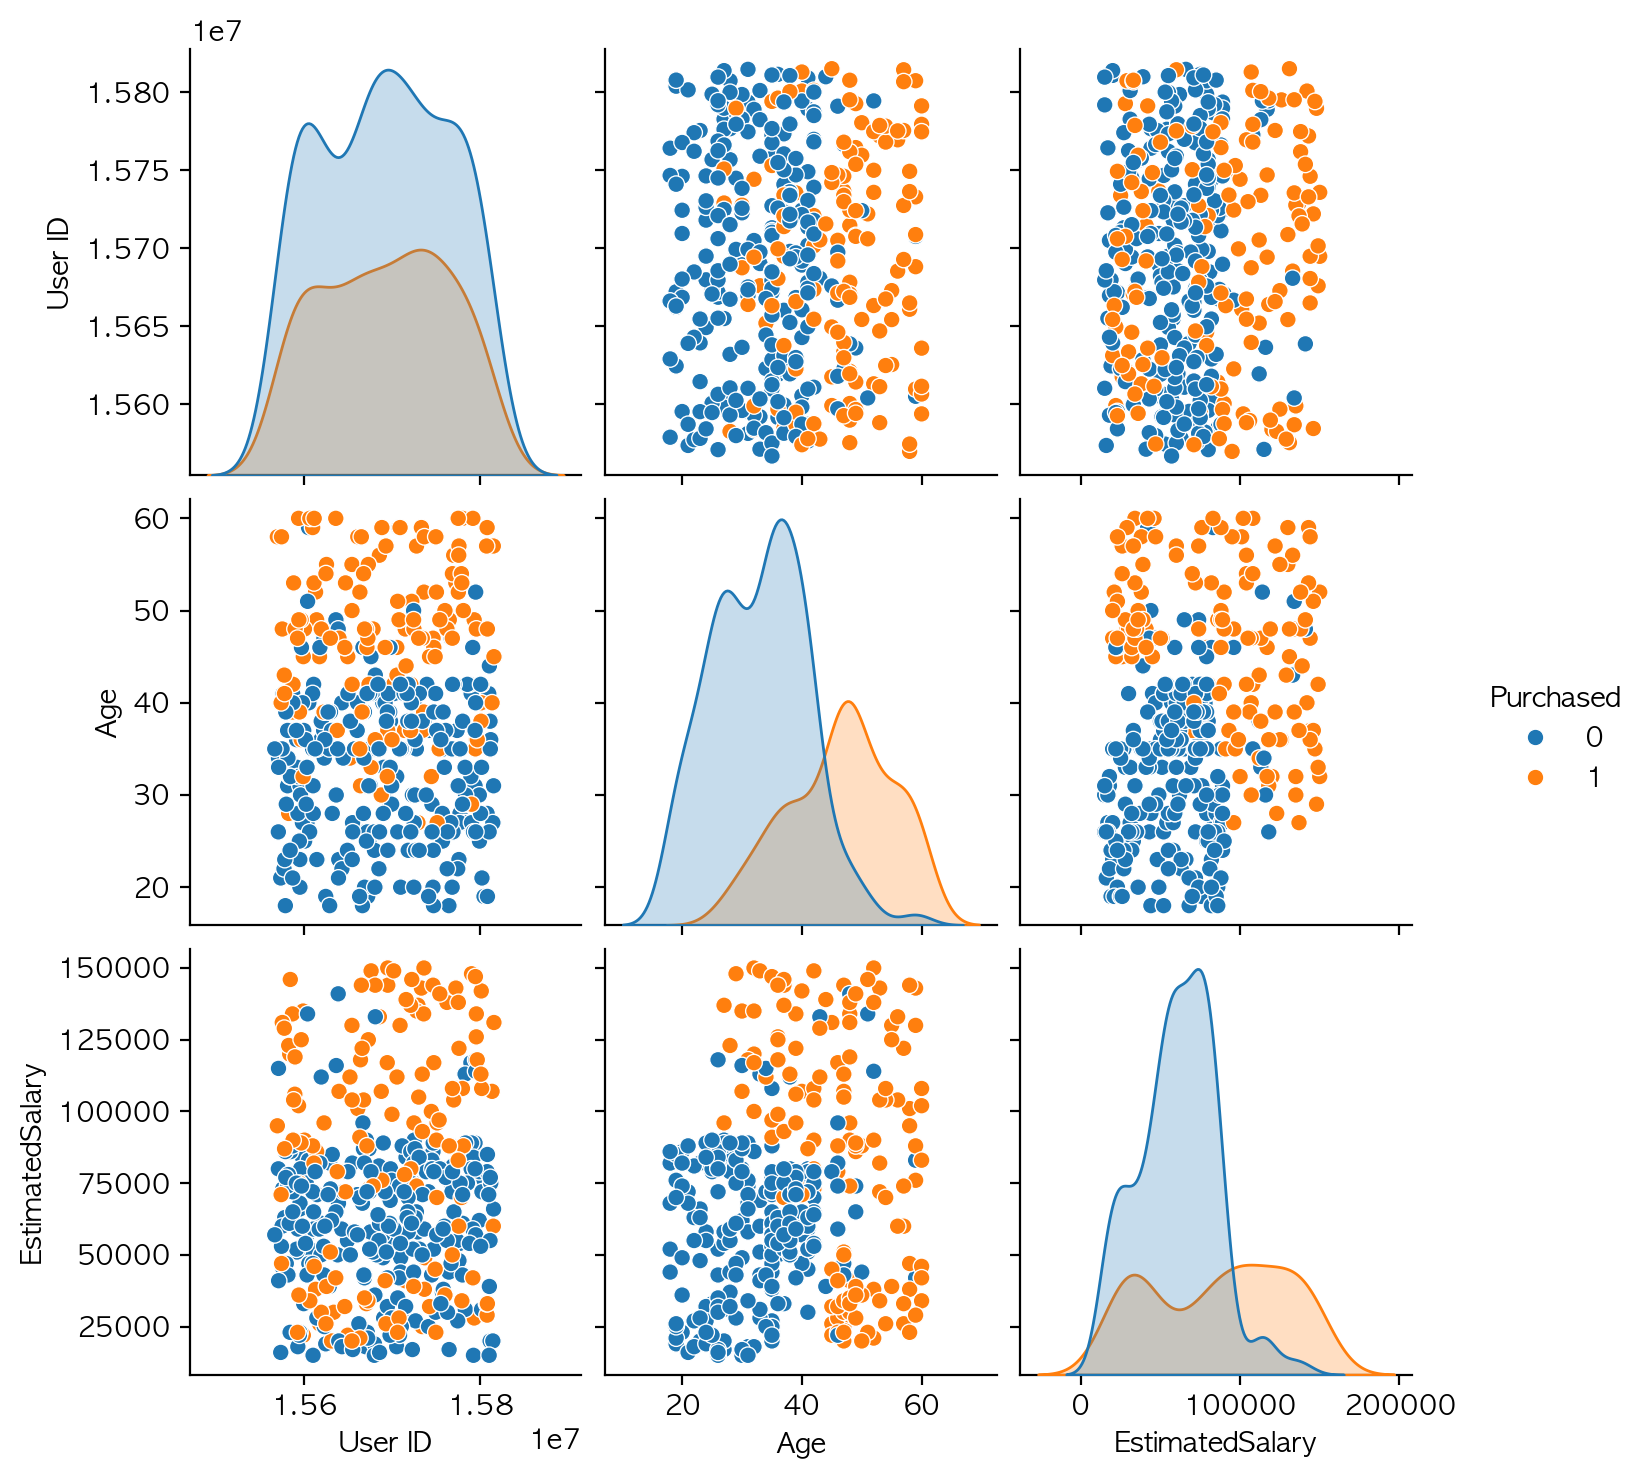

In [73]:
# sns.scatterplot(
#     data=data,
#     x=data['Age'],
#     y=data['EstimatedSalary'],
#     palette='viridis',
#     hue='Age',
#     size=data['EstimatedSalary'],
#     alpha=0.9
# )
plt.figure(figsize=(10,10))
sns.pairplot(data,kind='scatter',hue='Purchased')